# Modelo de fuga:
## Descripción del reto analítico:
La Caja Colombiana de Subsidio Familiar – Colsubsidio, es una compañía que pertenece al Sistema del Subsidio Familiar y al Sistema de Protección y Seguridad Social colombiano, que en sus más de 60 años se ha consolidado como la caja de compensación familiar de mayor cobertura del país. Su gestión, la desarrolla a través de la administración de recursos provenientes de las empresas aportantes y la prestación de servicios sociales para los trabajadores afiliados, sus familias y la población en general.

Colsubsidio ha dividido la prestación de sus servicios en once diferentes unidades especializadas de servicio (UES). Una de ellas, la UES de Crédito, es la encargada de atender las necesidades de la población, afiliados y no afiliados a la caja a través de productos crediticios (cupo, consumo e hipotecario) a nivel nacional.

En este caso, se requiere establecer la probabilidad que un cliente en una de sus líneas de negocio (Crédito) se vaya o no. Para esto se tiene un histórico de datos de los clientes que han solicitado un tipo de retiro y los que no lo han expresado.

Para tal fin en la carpeta data encontrará los siguientes archivos:

1. **diccionario_datos:** Contiene una breve descripción de los campos en las BD.
2. **train:** base de datos con todas las variables del negocio y la variable target.
3. **train:** base de datos para pobrar los resultados del modelo.
4. **train_train_demograficas:** base de datos con variables sociodemográficas.
5. **train_train_subsidios:** base de datos con variables de subsidios.

Colsubsidio desea segmentar y perfilar sus clientes de Crédito con el objetivo de ofrecerles, a través de campañas de marketing, tarjetas de crédito y seguros. Para este ejercicio, utilice las fuentes de datos provistas en el punto anterior y construya un modelo que permita segmentar los clientes. Mencione las métricas que tuvo en cuenta para evaluar la confiabilidad de su modelo.

## Entendimiento del Negocio

## Objetivos del Negocio

1. Modelar la probabilidad de retiro de un cliente en la UES de Crédito

     * Se busca predecir si un cliente se retirará o no de los productos crediticios de Colsubsidio.
          - Para esto, cuentas con datos históricos de clientes que han solicitado un retiro y de aquellos que no lo han hecho.
2. Segmentar y perfilar los clientes de Crédito

     * El objetivo es identificar grupos de clientes con características similares para diseñar estrategias de marketing personalizadas.
          - Esto permitirá a Colsubsidio ofrecer productos como tarjetas de crédito y seguros de manera más efectiva.

## Enfoque de trabajo

1. Para la predicción de retiro:

     * Construir un modelo de clasificación supervisado con las bases de datos provistas, donde la variable target indica si un cliente se retira o no.
     * Evaluar la confiabilidad del modelo con métricas como precisión, recall, F1-score, AUC-ROC, etc.

2. Para la segmentación de clientes:

     * Aplicar técnicas de clustering (como K-means o DBSCAN) para agrupar clientes con características similares.
     * Analizar patrones en los segmentos para definir estrategias de negocio.

## Objetivo de Negocio #1:  Modelar la probabilidad de retiro de un cliente en la UES de Crédito

Para abordar este problema, podemos seguir una metodología CRISP-DM con las siguientes etapas:

### 1️⃣ Entender los Datos 📊
Primeros pasos:

1. Cargar los datos en pandas y revisar su estructura con .head(), .info() y .describe().
2. Identificar valores nulos y tipos de datos para cada columna.
3. Explorar la distribución de la variable objetivo (target), ya que un desbalance podría influir en el modelo.

In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns

# Cargar el archivo train.csv con el delimitador correcto (;)
df_train = pd.read_csv("train.csv", encoding="ISO-8859-1", delimiter=";")
df_demograficas = pd.read_excel("train_test_demograficas.xlsx")
df_subsidios = pd.read_excel("train_test_subsidios.xlsx")

# Primero unir train con datos demográficos
df_train = pd.merge(df_train, df_demograficas, on='id', how='left')
df_train = pd.merge(df_train, df_subsidios, on='id', how='left')

# Revisar la estructura del DataFrame train
train_info = df_train.info()
demograficas_info = df_demograficas.info()
subsidios_info = df_subsidios.info()

train_head = df_train.head()
demograficas_head = df_demograficas.head()
subsidios_head = df_subsidios.head()

train_info, train_head, demograficas_info, demograficas_head, subsidios_info, subsidios_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  int64  
 1   Fecha.Expedicion    50001 non-null  object 
 2   Cancelacion         1412 non-null   object 
 3   Gestionable         1412 non-null   object 
 4   Retencion           1412 non-null   object 
 5   TIPO                1412 non-null   object 
 6   ANO_MES             1412 non-null   float64
 7   Target              50001 non-null  int64  
 8   Fecha.Proceso       50001 non-null  object 
 9   Disponible.Avances  50001 non-null  object 
 10  Limite.Avances      50001 non-null  object 
 11  Total.Intereses     50001 non-null  object 
 12  Saldos.Mes.Ant      50001 non-null  object 
 13  Pagos.Mes.Ant       50001 non-null  object 
 14  Vtas.Mes.Ant        50001 non-null  object 
 15  Edad.Mora           50001 non-null  int64  
 16  Limi

(None,
    id Fecha.Expedicion Cancelacion Gestionable Retencion TIPO  ANO_MES  \
 0   1        4/11/2006         NaN         NaN       NaN  NaN      NaN   
 1   2       17/08/2007         NaN         NaN       NaN  NaN      NaN   
 2   3        8/05/2008         NaN         NaN       NaN  NaN      NaN   
 3   4       21/12/2006         NaN         NaN       NaN  NaN      NaN   
 4   5       13/09/2007         NaN         NaN       NaN  NaN      NaN   
 
    Target Fecha.Proceso Disponible.Avances  ... edad      nivel_educativo  \
 0       0     1/04/2018       1 050 000.00  ...   31  tecnico_tecnologico   
 1       0     1/04/2018       1 180 000.00  ...   38  tecnico_tecnologico   
 2       0     1/04/2018         150 000.00  ...   42             primaria   
 3       0     1/04/2018         680 000.00  ...   60  tecnico_tecnologico   
 4       0     1/04/2018       3 307 500.00  ...   27  tecnico_tecnologico   
 
   estado_civil Genero PAC  contrato estrato cuota_monetaria sub_vivend

### Observaciones sobre la exploración de los datos 

1. Archivo **train.csv**:

Novedades en los tipos de datos:

* Varias columnas numéricas (como **Disponible.Avances**, **Limite.Avances**,**Total.Intereses**, **Saldos.Mes.Ant**, **Pagos.Mes.Ant**, **Vtas.Mes.Ant**,**Limite.Cupo**, **Pago.del.Mes**, **Pago.Minimo**, **Vr.Mora**,**Vr.Cuota.Manejo** y **Saldo**) están en formato object y contienen puntos y espacios que deben limpiarse antes de convertirlas a tipo numérico.

In [3]:
print("Muestra de las primeras 5 filas del df train.csv que tienen la noveda de ser columnas de tipo object pero deben ser tratadas como numéricas")
df_train[['id','Disponible.Avances', 'Limite.Avances','Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant','Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora','Vr.Cuota.Manejo', 'Saldo']].head()

Muestra de las primeras 5 filas del df train.csv que tienen la noveda de ser columnas de tipo object pero deben ser tratadas como numéricas


,id,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo
0,1,1 050 000.00,1 050 000.00,0,0,0,0,2 625 000.00,0,0,0,0,0
1,2,1 180 000.00,1 180 000.00,0,0,0,0,2 950 000.00,0,0,0,0,0
2,3,150 000.00,150 000.00,0,0,0,0,500 000.00,0,0,0,0,0
3,4,680 000.00,680 000.00,0,0,0,0,1 700 000.00,0,0,0,0,0
4,5,3 307 500.00,3 307 500.00,0,0,0,0,6 615 000.00,0,0,0,0,0


In [4]:
df_train[['Disponible.Avances', 'Limite.Avances','Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant','Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora','Vr.Cuota.Manejo', 'Saldo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Disponible.Avances  50001 non-null  object
 1   Limite.Avances      50001 non-null  object
 2   Total.Intereses     50001 non-null  object
 3   Saldos.Mes.Ant      50001 non-null  object
 4   Pagos.Mes.Ant       50001 non-null  object
 5   Vtas.Mes.Ant        50001 non-null  object
 6   Limite.Cupo         50001 non-null  object
 7   Pago.del.Mes        50001 non-null  object
 8   Pago.Minimo         50001 non-null  object
 9   Vr.Mora             50001 non-null  object
 10  Vr.Cuota.Manejo     50001 non-null  object
 11  Saldo               50001 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


In [ ]:
def clean_monetary(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').replace(' ', ''))
    return x

# Variables monetarias
monetary_cols = [
'Disponible.Avances', 'Limite.Avances','Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant','Limite.Cupo', 
'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora','Vr.Cuota.Manejo', 'Saldo'
]

# Convertir variables monetarias
for col in monetary_cols:
    df_train[col] = df_train[col].apply(clean_monetary)

df_train

,id,Fecha.Expedicion,Cancelacion,Gestionable,Retencion,TIPO,ANO_MES,Target,Fecha.Proceso,Disponible.Avances,...,edad,nivel_educativo,estado_civil,Genero,PAC,contrato,estrato,cuota_monetaria,sub_vivenda,bono_lonchera
0,1,4/11/2006,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,1050000.0,...,31,tecnico_tecnologico,soltero,F,1,4,NaN,0,0,0
1,2,17/08/2007,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,1180000.0,...,38,tecnico_tecnologico,soltero,M,1,1,NaN,0,0,0
2,3,8/05/2008,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,150000.0,...,42,primaria,soltero,M,3,3,NaN,1,0,1
3,4,21/12/2006,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,680000.0,...,60,tecnico_tecnologico,soltero,M,1,4,NaN,0,0,0
4,5,13/09/2007,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,3307500.0,...,27,tecnico_tecnologico,separado,M,1,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49997,14/06/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,55000.0,...,29,primaria,soltero,F,3,3,NaN,1,0,1
49997,49998,14/06/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,80000.0,...,48,secundaria,soltero,M,2,2,NaN,1,0,1
49998,49999,14/06/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,80000.0,...,55,secundaria,viudo,M,2,2,NaN,1,0,1
49999,50000,4/07/2013,NaN,NaN,NaN,NaN,NaN,0,1/04/2018,140000.0,...,24,tecnico_tecnologico,separado,F,1,3,NaN,0,0,0


In [6]:
df_train[['Disponible.Avances', 'Limite.Avances','Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant','Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora','Vr.Cuota.Manejo', 'Saldo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Disponible.Avances  50001 non-null  float64
 1   Limite.Avances      50001 non-null  float64
 2   Total.Intereses     50001 non-null  float64
 3   Saldos.Mes.Ant      50001 non-null  float64
 4   Pagos.Mes.Ant       50001 non-null  float64
 5   Vtas.Mes.Ant        50001 non-null  float64
 6   Limite.Cupo         50001 non-null  float64
 7   Pago.del.Mes        50001 non-null  float64
 8   Pago.Minimo         50001 non-null  float64
 9   Vr.Mora             50001 non-null  float64
 10  Vr.Cuota.Manejo     50001 non-null  float64
 11  Saldo               50001 non-null  float64
dtypes: float64(12)
memory usage: 4.6 MB


* Las fechas (**Fecha.Expedicion**, **Fecha.Proceso**) están en formato object y deben convertirse a datetime.


In [7]:
df_train[['id','ANO_MES','Fecha.Expedicion','Fecha.Proceso']].head()

,id,ANO_MES,Fecha.Expedicion,Fecha.Proceso
0,1,NaN,4/11/2006,1/04/2018
1,2,NaN,17/08/2007,1/04/2018
2,3,NaN,8/05/2008,1/04/2018
3,4,NaN,21/12/2006,1/04/2018
4,5,NaN,13/09/2007,1/04/2018


In [8]:
print("Muestra de las primeras 5 filas del df train.csv que tienen la noveda de ser columnas de tipo object pero deben ser tratadas como numéricas")
df_train[['cuota_monetaria', 'sub_vivenda', 'bono_lonchera','contrato']] = df_train[['cuota_monetaria', 'sub_vivenda', 'bono_lonchera','contrato']].astype(str)

# Verificar la conversión
print(df_train[['cuota_monetaria', 'sub_vivenda', 'bono_lonchera']].head())


Muestra de las primeras 5 filas del df train.csv que tienen la noveda de ser columnas de tipo object pero deben ser tratadas como numéricas
  cuota_monetaria sub_vivenda bono_lonchera
0               0           0             0
1               0           0             0
2               1           0             1
3               0           0             0
4               0           0             0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  int64  
 1   Fecha.Expedicion    50001 non-null  object 
 2   Cancelacion         1412 non-null   object 
 3   Gestionable         1412 non-null   object 
 4   Retencion           1412 non-null   object 
 5   TIPO                1412 non-null   object 
 6   ANO_MES             1412 non-null   float64
 7   Target              50001 non-null  int64  
 8   Fecha.Proceso       50001 non-null  object 
 9   Disponible.Avances  50001 non-null  float64
 10  Limite.Avances      50001 non-null  float64
 11  Total.Intereses     50001 non-null  float64
 12  Saldos.Mes.Ant      50001 non-null  float64
 13  Pagos.Mes.Ant       50001 non-null  float64
 14  Vtas.Mes.Ant        50001 non-null  float64
 15  Edad.Mora           50001 non-null  int64  
 16  Limi

In [10]:
df_train[['ANO_MES','Fecha.Expedicion','Fecha.Proceso']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ANO_MES           1412 non-null   float64
 1   Fecha.Expedicion  50001 non-null  object 
 2   Fecha.Proceso     50001 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [11]:
df_train['Fecha.Expedicion'] = pd.to_datetime(df_train['Fecha.Expedicion'], 
                                                  format='%d/%m/%Y', 
                                                  dayfirst=True)
df_train['Fecha.Proceso'] = pd.to_datetime(df_train['Fecha.Proceso'], 
                                               format='%d/%m/%Y', 
                                               dayfirst=True)

In [12]:
df_train[['ANO_MES','Fecha.Expedicion','Fecha.Proceso']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ANO_MES           1412 non-null   float64       
 1   Fecha.Expedicion  50001 non-null  datetime64[ns]
 2   Fecha.Proceso     50001 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 1.1 MB


* Valores nulos: Algunas columnas, como **Cancelacion**, **Gestionable**, **TIPO** y **ANO_MES**, tienen muchos valores nulos

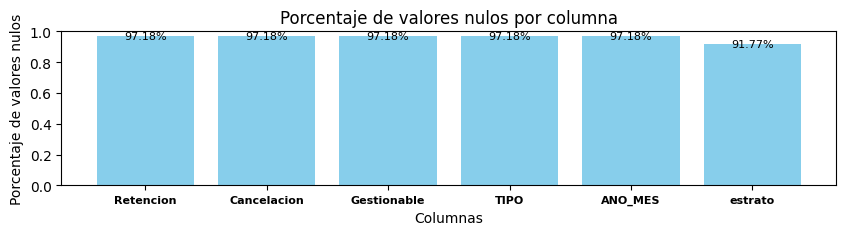

97.18% de los registros de la columna Retencion son nulos
97.18% de los registros de la columna Cancelacion son nulos
97.18% de los registros de la columna Gestionable son nulos
97.18% de los registros de la columna TIPO son nulos
97.18% de los registros de la columna ANO_MES son nulos
91.77% de los registros de la columna estrato son nulos
El DataFrame tiene 50001 filas y 34 columnas


In [13]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos = {
    'Retencion': df_train['Retencion'].isnull().sum() / df_train.shape[0],
    'Cancelacion': df_train['Cancelacion'].isnull().sum() / df_train.shape[0],
    'Gestionable': df_train['Gestionable'].isnull().sum() / df_train.shape[0],
    'TIPO': df_train['TIPO'].isnull().sum() / df_train.shape[0],
    'ANO_MES': df_train['ANO_MES'].isnull().sum() / df_train.shape[0],
    'estrato': df_train['estrato'].isnull().sum() / df_train.shape[0],
}

# Crear un DataFrame a partir del diccionario de porcentajes
df_porcentaje_nulos = pd.DataFrame(list(porcentaje_nulos.items()), columns=['Columna', 'Porcentaje'])

# Graficar el porcentaje de valores nulos
plt.figure(figsize=(10, 2))
bars = plt.bar(df_porcentaje_nulos['Columna'], df_porcentaje_nulos['Porcentaje'], color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Porcentaje de valores nulos por columna')
plt.ylim(0, 1)
plt.xticks(rotation=0, ha='center', rotation_mode='anchor', fontsize=8, fontweight='bold')

# Agregar los valores del porcentaje encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2%}', ha='center', va='center', fontsize=8)

# Mostrar el gráfico
plt.show()

# Imprimir los valores del porcentaje y del shape
for columna in porcentaje_nulos:
    print(f"{porcentaje_nulos[columna]:.2%} de los registros de la columna {columna} son nulos")
print(f"El DataFrame tiene {df_train.shape[0]} filas y {df_train.shape[1]} columnas")

In [14]:
df_train.columns

Index(['id', 'Fecha.Expedicion', 'Cancelacion', 'Gestionable', 'Retencion',
       'TIPO', 'ANO_MES', 'Target', 'Fecha.Proceso', 'Disponible.Avances',
       'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant',
       'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes',
       'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'categoria',
       'segmento', 'edad', 'nivel_educativo', 'estado_civil', 'Genero', 'PAC',
       'contrato', 'estrato', 'cuota_monetaria', 'sub_vivenda',
       'bono_lonchera'],
      dtype='object')

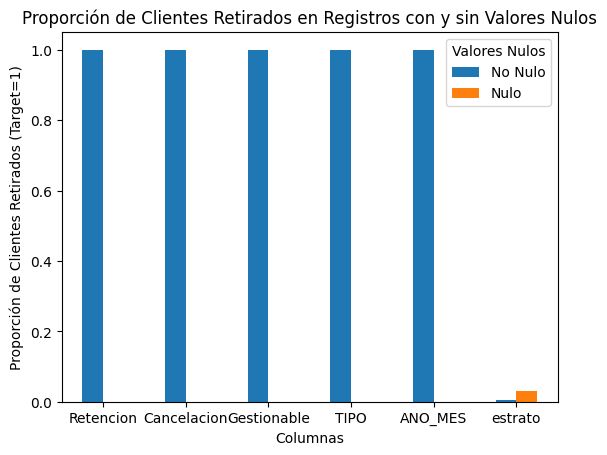

In [15]:
# Crear una copia del DataFrame para trabajar
df_train_copy = df_train.copy()

# Convertir la columna 'Target' a numérica (en caso de que no lo sea)
df_train_copy["Target"] = pd.to_numeric(df_train_copy["Target"], errors="coerce")

# Crear nuevas columnas indicando si cada columna clave tiene valores nulos
cols_nulas = ["Retencion","Cancelacion", "Gestionable", "TIPO", "ANO_MES","estrato"]
for col in cols_nulas:
    df_train_copy[f"{col}_isnull"] = df_train_copy[col].isnull().astype(int)

# Calcular la proporción de clientes retirados (Target=1) en registros con y sin valores nulos
null_analysis = {}
for col in cols_nulas:
    null_analysis[col] = df_train_copy.groupby(f"{col}_isnull")["Target"].mean()

# Convertir el diccionario a un DataFrame para facilitar la visualización
null_analysis_df = pd.DataFrame(null_analysis).T
null_analysis_df.columns = ['No Nulo', 'Nulo']

# Graficar los resultados con un tamaño más pequeño
#plt.figure(figsize=(8, 30))
null_analysis_df.plot(kind='bar')
plt.title('Proporción de Clientes Retirados en Registros con y sin Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Proporción de Clientes Retirados (Target=1)')
plt.xticks(rotation=0)
plt.legend(title='Valores Nulos')
plt.show()


## **Este resultado indica que:🎇**

1. Para los registros donde NO hay valores nulos (isnull = 0) en cualquiera de las columnas (Cancelacion, Gestionable, TIPO, ANO_MES), el Target es 1, es decir, todos esos clientes se han retirado.
2. Para los registros donde SÍ hay valores nulos (isnull = 1) en estas columnas, el Target es 0, es decir, ninguno de esos clientes se ha retirado.

     **🔍 ¿Qué significa esto?**
     Los valores nulos en estas columnas parecen estar altamente correlacionados con clientes que NO se han retirado. Esto podría deberse a:

     *Lógica de negocio:* Es posible que las cancelaciones, gestiones o tipos de productos solo se registren cuando un cliente se retira.
     Errores en la data: Puede que haya problemas en la captura de datos para clientes que siguen activos.

     **✅ ¿Qué hacer?**
     No eliminar estas columnas todavía, porque contienen información valiosa.
     Transformar las columnas en variables binarias, indicando si el dato está o no disponible (1 si hay valor, 0 si es nulo).
     Incluirlas en el modelo, ya que parecen ser predictoras fuertes del retiro.

In [16]:
# Crear una copia del DataFrame
df_train_preprocessed = df_train.copy()

# Convertir las columnas en variables binarias indicando si tienen datos o no
cols_nulas = ["Retencion","Cancelacion", "Gestionable", "TIPO", "ANO_MES","estrato"]
for col in cols_nulas:
    df_train_preprocessed[f"{col}_has_value"] = df_train_preprocessed[col].notnull().astype(int)

# Eliminar las columnas originales
df_train_preprocessed.drop(columns=cols_nulas, inplace=True)

# Mostrar las primeras filas para validar
df_train_preprocessed.head()


,id,Fecha.Expedicion,Target,Fecha.Proceso,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,...,contrato,cuota_monetaria,sub_vivenda,bono_lonchera,Retencion_has_value,Cancelacion_has_value,Gestionable_has_value,TIPO_has_value,ANO_MES_has_value,estrato_has_value
0,1,2006-11-04,0,2018-04-01,1050000.0,1050000.0,0.0,0.0,0.0,0.0,...,4,0,0,0,0,0,0,0,0,0
1,2,2007-08-17,0,2018-04-01,1180000.0,1180000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,3,2008-05-08,0,2018-04-01,150000.0,150000.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,0,0,0
3,4,2006-12-21,0,2018-04-01,680000.0,680000.0,0.0,0.0,0.0,0.0,...,4,0,0,0,0,0,0,0,0,0
4,5,2007-09-13,0,2018-04-01,3307500.0,3307500.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_train_preprocessed.columns

Index(['id', 'Fecha.Expedicion', 'Target', 'Fecha.Proceso',
       'Disponible.Avances', 'Limite.Avances', 'Total.Intereses',
       'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora',
       'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora',
       'Vr.Cuota.Manejo', 'Saldo', 'categoria', 'segmento', 'edad',
       'nivel_educativo', 'estado_civil', 'Genero', 'PAC', 'contrato',
       'cuota_monetaria', 'sub_vivenda', 'bono_lonchera',
       'Retencion_has_value', 'Cancelacion_has_value', 'Gestionable_has_value',
       'TIPO_has_value', 'ANO_MES_has_value', 'estrato_has_value'],
      dtype='object')

* Revisar la correlación de estas nuevas variables (Cancelacion_has_value, Gestionable_has_value, etc.) con el Target para confirmar su impacto.
* Entrenar un modelo base (como una regresión logística o un árbol de decisión) para medir su importancia en la predicción del retiro.
* Probar diferentes combinaciones de variables y métricas de evaluación (precisión, recall, AUC-ROC).

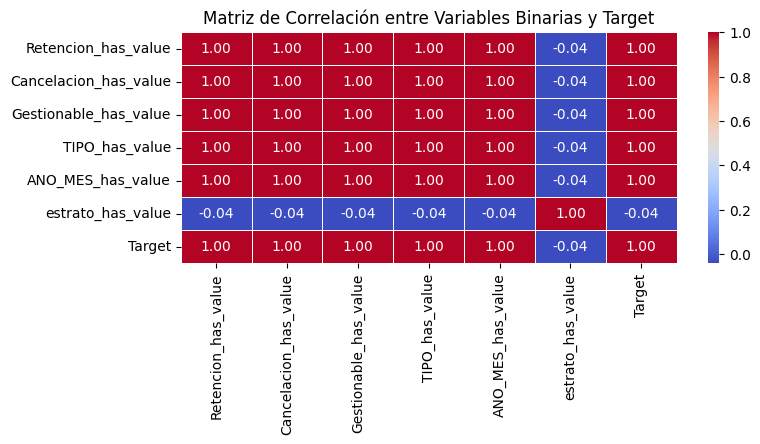

In [18]:

# Seleccionar solo las variables binarias y el target
cols_corr = ["Retencion_has_value","Cancelacion_has_value", "Gestionable_has_value", "TIPO_has_value", "ANO_MES_has_value","estrato_has_value", "Target"]

# Calcular la matriz de correlación
corr_matrix = df_train_preprocessed[cols_corr].corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Binarias y Target")
plt.show()


In [19]:
corr_matrix

,Retencion_has_value,Cancelacion_has_value,Gestionable_has_value,TIPO_has_value,ANO_MES_has_value,estrato_has_value,Target
Retencion_has_value,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000
Cancelacion_has_value,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000
Gestionable_has_value,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000
TIPO_has_value,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000
ANO_MES_has_value,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000
estrato_has_value,-0.041832,-0.041832,-0.041832,-0.041832,-0.041832,1.000000,-0.041832
Target,1.000000,1.000000,1.000000,1.000000,1.000000,-0.041832,1.000000


## Análisis de la Matriz de Correlación
* Las variables **Retencion_has_value, Cancelacion_has_value, Gestionable_has_value, TIPO_has_value y ANO_MES_has_value** tienen correlación perfecta (1.0) con Target. Esto confirma que no aportan información nueva y deben eliminarse.
La variable estrato_has_value tiene una correlación baja con Target (-0.0418), lo que indica que la presencia de valores nulos en estrato no está relacionada con la probabilidad de retiro.

In [20]:
# Filtrar el DataFrame excluyendo las columnas especificadas
df_train = df_train.drop(columns=["Retencion","Cancelacion", "Gestionable", "TIPO", "ANO_MES","estrato"])

# Mostrar el DataFrame filtrado
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50001 non-null  int64         
 1   Fecha.Expedicion    50001 non-null  datetime64[ns]
 2   Target              50001 non-null  int64         
 3   Fecha.Proceso       50001 non-null  datetime64[ns]
 4   Disponible.Avances  50001 non-null  float64       
 5   Limite.Avances      50001 non-null  float64       
 6   Total.Intereses     50001 non-null  float64       
 7   Saldos.Mes.Ant      50001 non-null  float64       
 8   Pagos.Mes.Ant       50001 non-null  float64       
 9   Vtas.Mes.Ant        50001 non-null  float64       
 10  Edad.Mora           50001 non-null  int64         
 11  Limite.Cupo         50001 non-null  float64       
 12  Pago.del.Mes        50001 non-null  float64       
 13  Pago.Minimo         50001 non-null  float64   

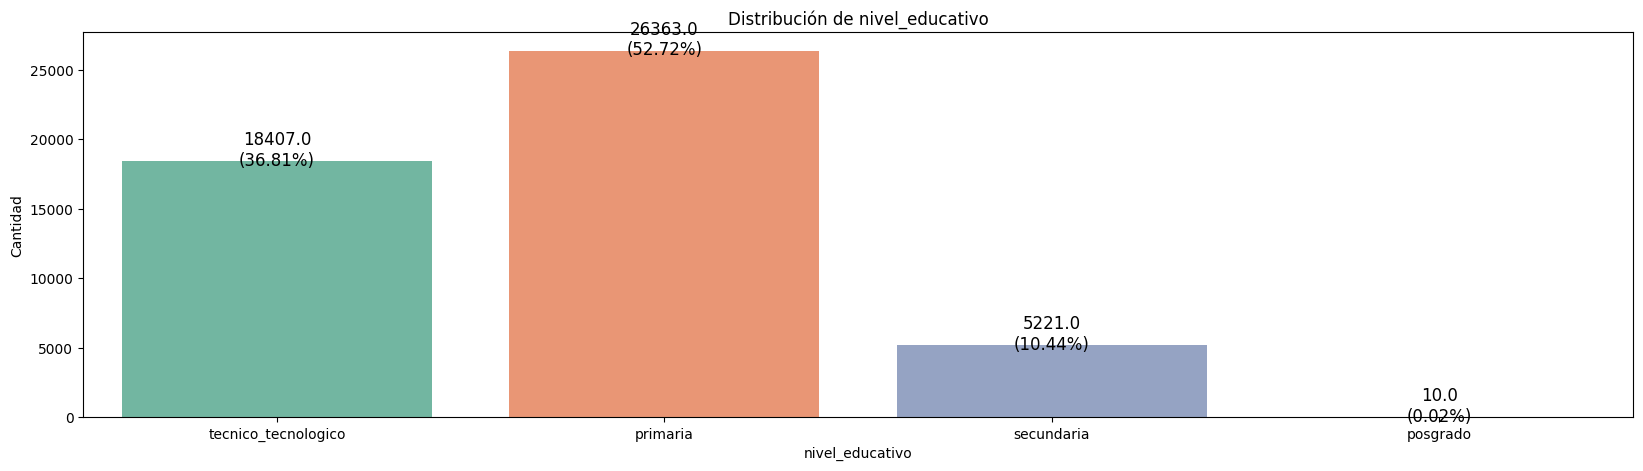

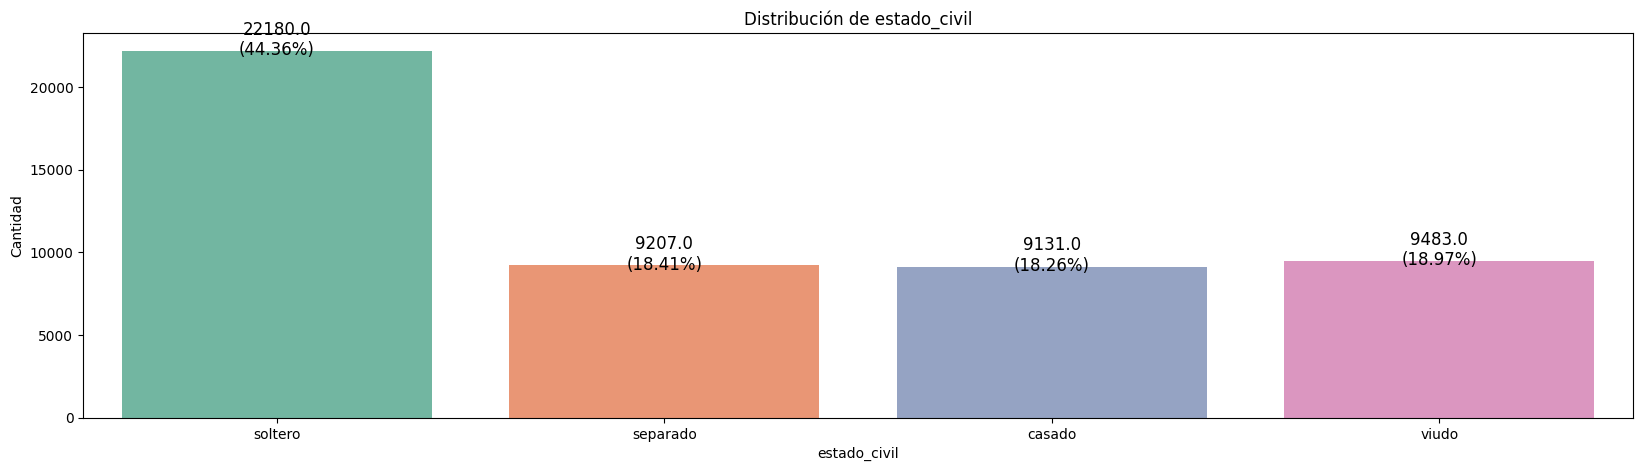

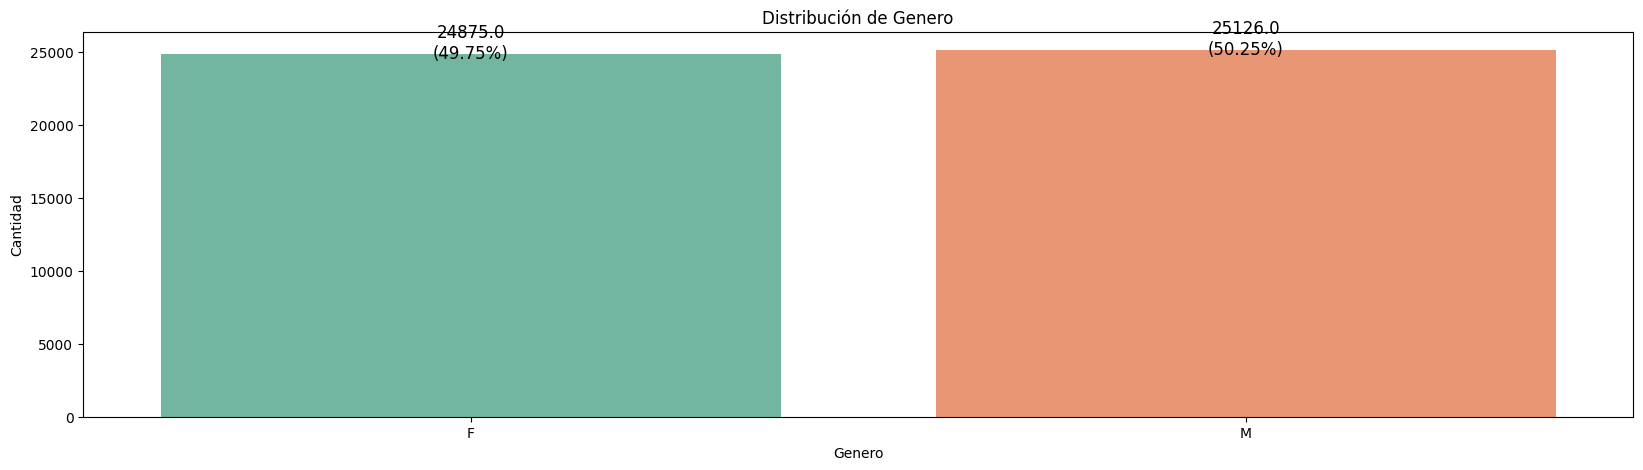

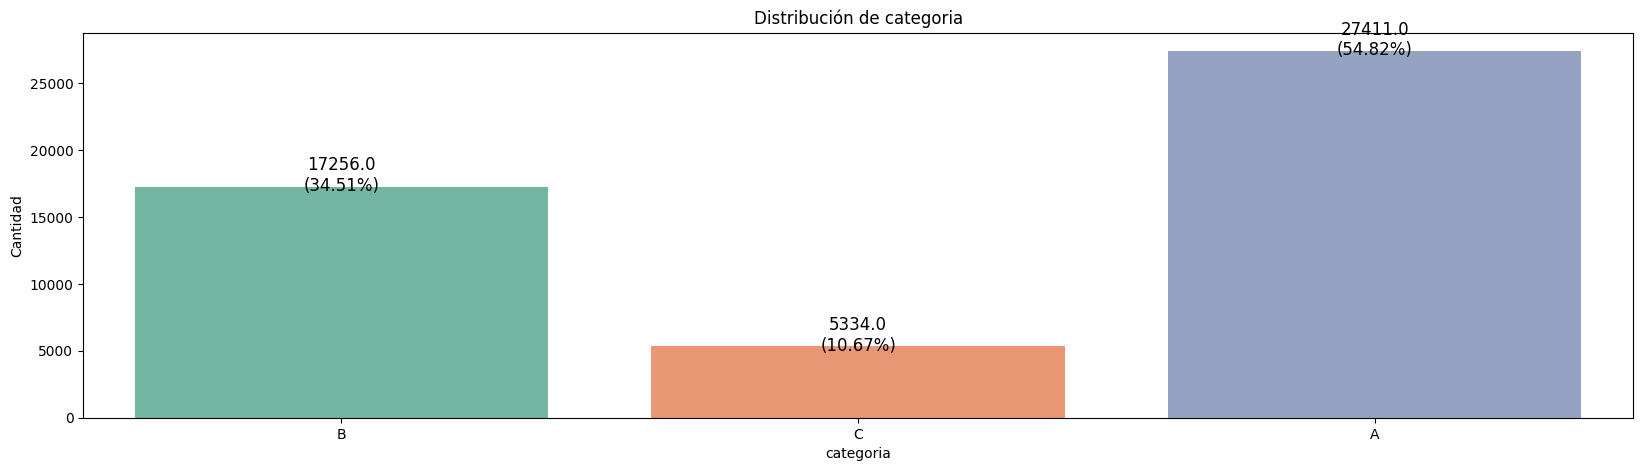

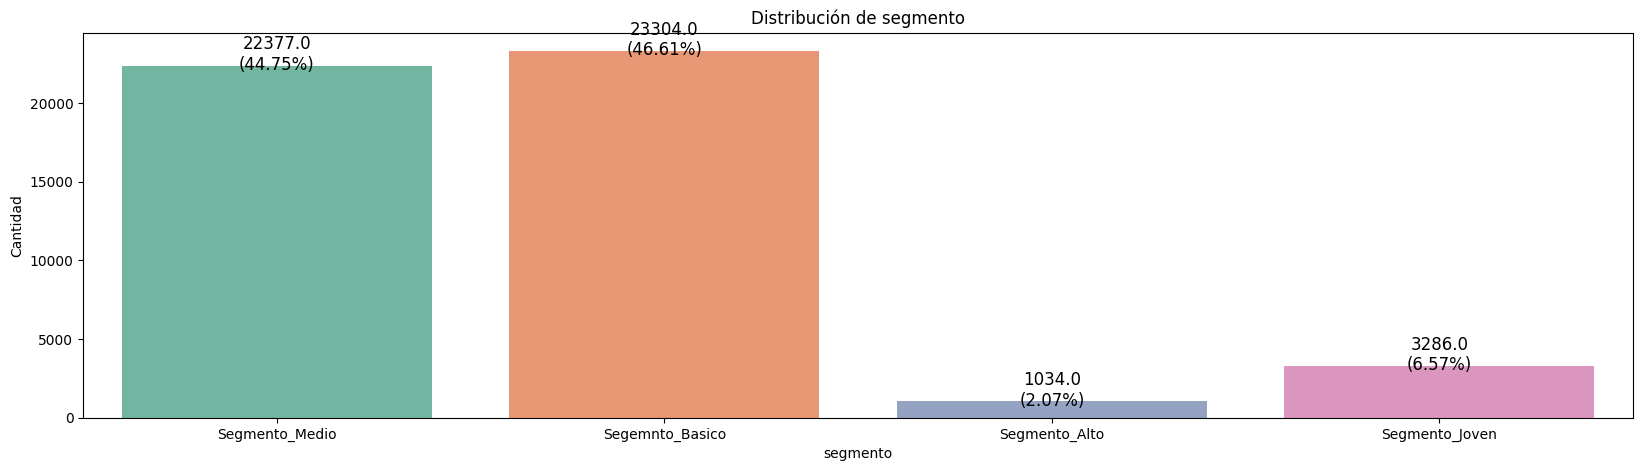

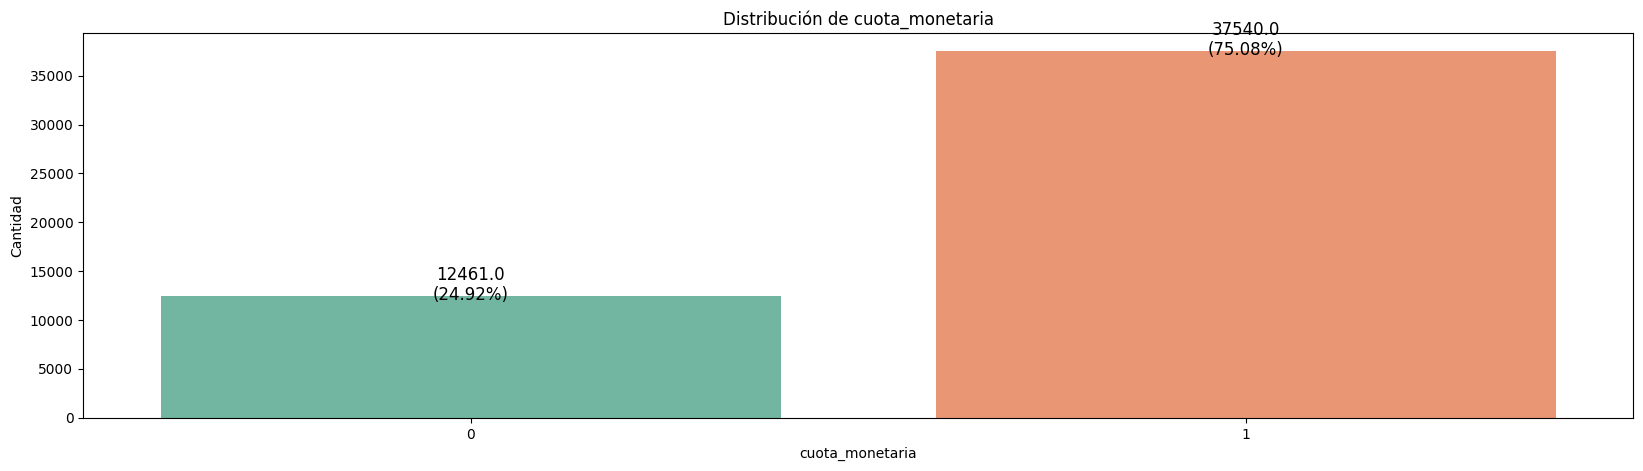

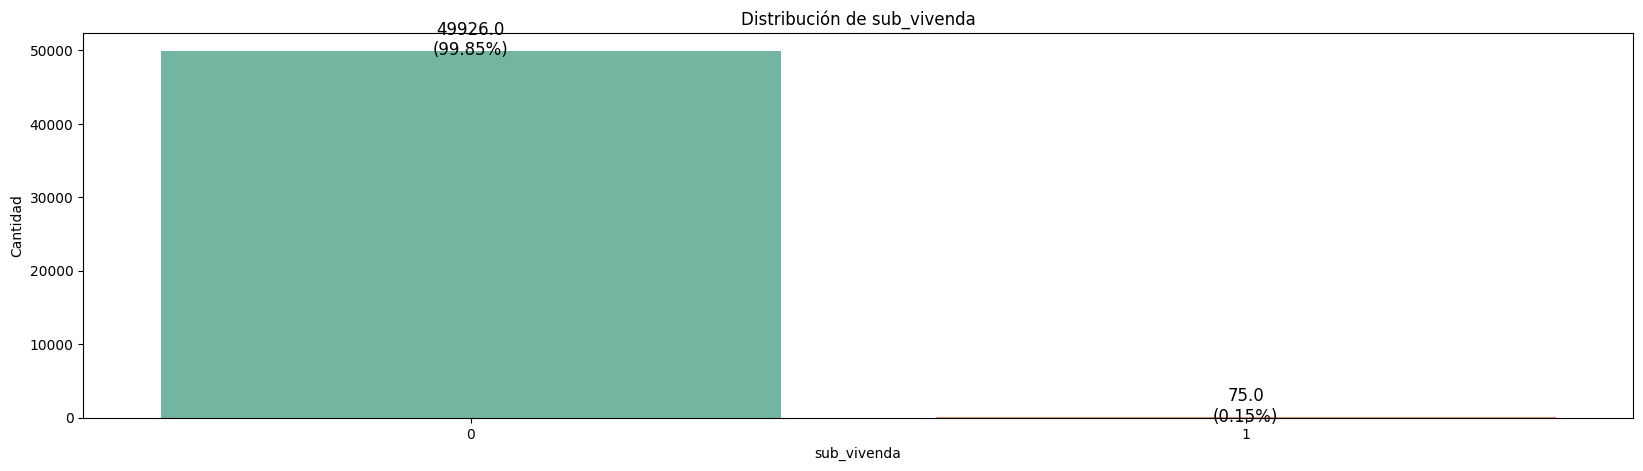

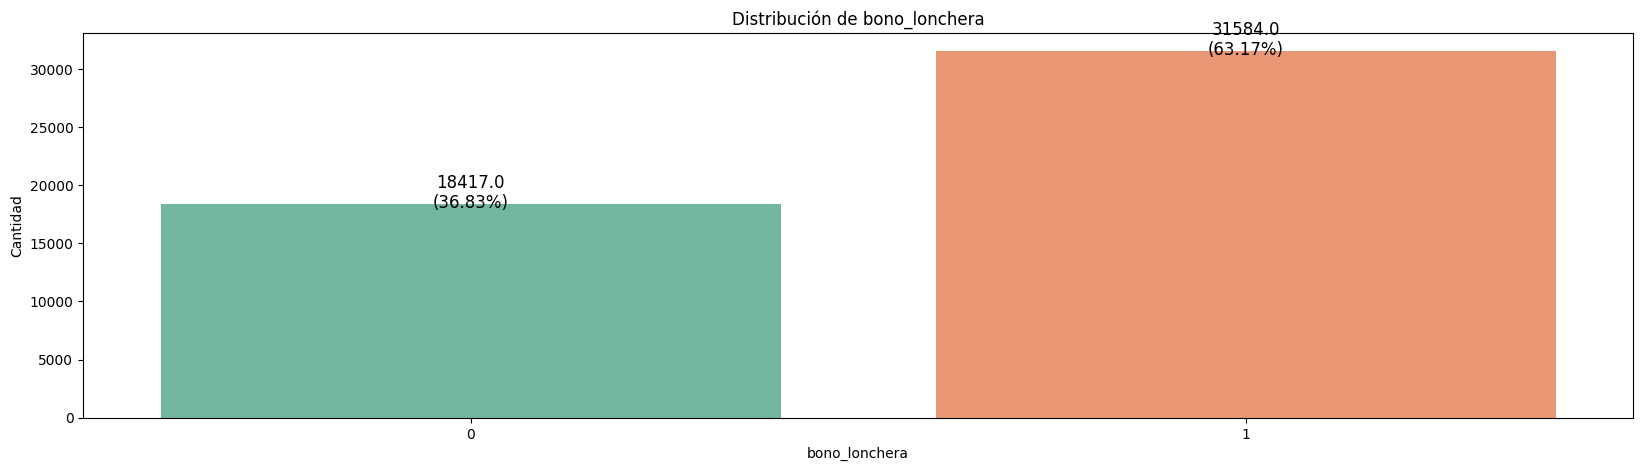

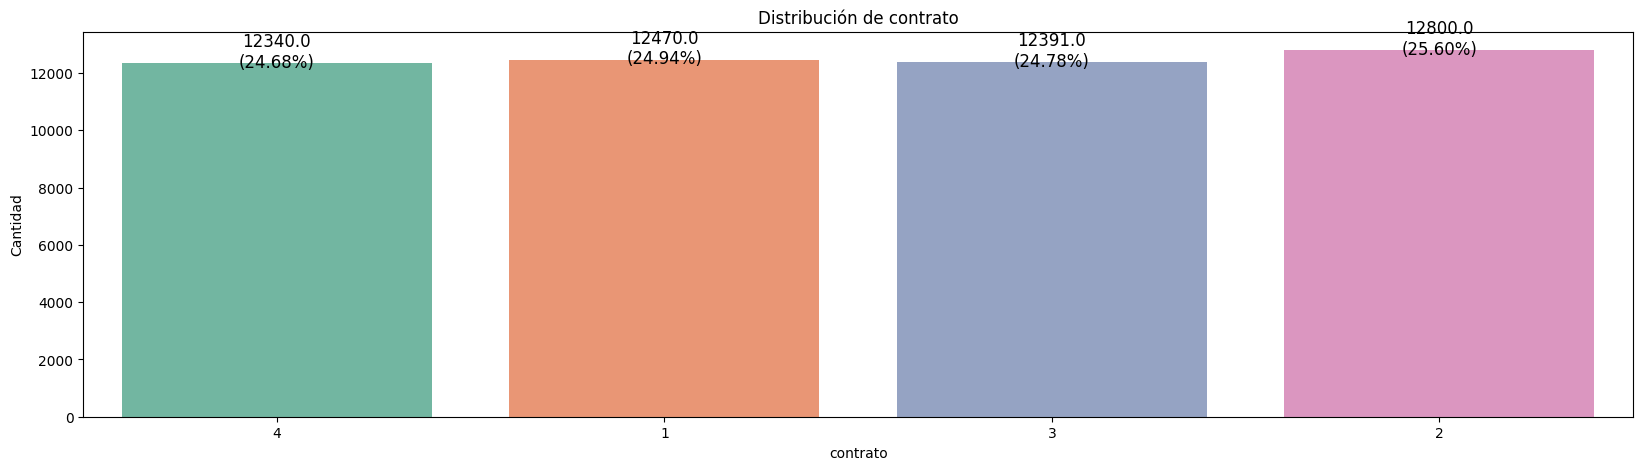

In [21]:
# Gráfico de barras para las variables categóricas con los valores y su participación
categorical_cols = ['nivel_educativo', 'estado_civil', 'Genero', 'categoria', 'segmento','cuota_monetaria','sub_vivenda',
'bono_lonchera','contrato']  # Asegúrate de que esta lista esté bien definida

# Crear los gráficos
for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    ax = sns.countplot(data=df_train, x=col, hue=col, palette='Set2', legend=False)
    
    # Calcular la participación (porcentaje)
    total = len(df_train)
    
    # Añadir los valores y su participación sobre las barras
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{height}\n({percentage:.2f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.show()

In [22]:
df_train = df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50001 non-null  int64         
 1   Fecha.Expedicion    50001 non-null  datetime64[ns]
 2   Target              50001 non-null  int64         
 3   Fecha.Proceso       50001 non-null  datetime64[ns]
 4   Disponible.Avances  50001 non-null  float64       
 5   Limite.Avances      50001 non-null  float64       
 6   Total.Intereses     50001 non-null  float64       
 7   Saldos.Mes.Ant      50001 non-null  float64       
 8   Pagos.Mes.Ant       50001 non-null  float64       
 9   Vtas.Mes.Ant        50001 non-null  float64       
 10  Edad.Mora           50001 non-null  int64         
 11  Limite.Cupo         50001 non-null  float64       
 12  Pago.del.Mes        50001 non-null  float64       
 13  Pago.Minimo         50001 non-null  float64   

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd


if not isinstance(df_train, pd.DataFrame):
    df_train = pd.DataFrame(df_train)

# Obtener nombres de columnas originales (solo columnas numéricas)
original_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Aplicar VarianceThreshold solo a las columnas numéricas
selector = VarianceThreshold(threshold=0.01)
df_train_selected = selector.fit_transform(df_train[original_columns])

# Obtener nombres de columnas restantes
selected_columns = original_columns[selector.get_support()]

# Crear DataFrame con las columnas seleccionadas
df_train_selected = pd.DataFrame(df_train_selected, columns=selected_columns)

df_train_selected.head()

,id,Target,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,Saldo,edad,PAC
0,1.0,0.0,1050000.0,1050000.0,0.0,0.0,0.0,0.0,0.0,2625000.0,0.0,0.0,0.0,0.0,0.0,31.0,1.0
1,2.0,0.0,1180000.0,1180000.0,0.0,0.0,0.0,0.0,0.0,2950000.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0
2,3.0,0.0,150000.0,150000.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,0.0,0.0,0.0,0.0,42.0,3.0
3,4.0,0.0,680000.0,680000.0,0.0,0.0,0.0,0.0,0.0,1700000.0,0.0,0.0,0.0,0.0,0.0,60.0,1.0
4,5.0,0.0,3307500.0,3307500.0,0.0,0.0,0.0,0.0,0.0,6615000.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0


In [24]:
df_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  float64
 1   Target              50001 non-null  float64
 2   Disponible.Avances  50001 non-null  float64
 3   Limite.Avances      50001 non-null  float64
 4   Total.Intereses     50001 non-null  float64
 5   Saldos.Mes.Ant      50001 non-null  float64
 6   Pagos.Mes.Ant       50001 non-null  float64
 7   Vtas.Mes.Ant        50001 non-null  float64
 8   Edad.Mora           50001 non-null  float64
 9   Limite.Cupo         50001 non-null  float64
 10  Pago.del.Mes        50001 non-null  float64
 11  Pago.Minimo         50001 non-null  float64
 12  Vr.Mora             50001 non-null  float64
 13  Vr.Cuota.Manejo     50001 non-null  float64
 14  Saldo               50001 non-null  float64
 15  edad                50001 non-null  float64
 16  PAC 

In [25]:
# Calcular la matriz de correlación
corr_matrix = df_train_selected.corr().abs()

# Seleccionar la triangular superior de la matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar columnas con correlación mayor a un umbral (por ejemplo, 0.95)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Verificar que las columnas a eliminar no estén correlacionadas con Target
to_drop = [col for col in to_drop if col != 'Target' and abs(corr_matrix.loc[col, 'Target']) < 0.1]

# Eliminar columnas redundantes
df_train_selected = df_train_selected.drop(columns=to_drop)
df_train_selected

,id,Target,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,edad,PAC
0,1.0,0.0,1050000.0,1050000.0,0.0,0.0,0.0,0.0,0.0,2625000.0,0.0,0.0,0.0,0.0,31.0,1.0
1,2.0,0.0,1180000.0,1180000.0,0.0,0.0,0.0,0.0,0.0,2950000.0,0.0,0.0,0.0,0.0,38.0,1.0
2,3.0,0.0,150000.0,150000.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,0.0,0.0,0.0,42.0,3.0
3,4.0,0.0,680000.0,680000.0,0.0,0.0,0.0,0.0,0.0,1700000.0,0.0,0.0,0.0,0.0,60.0,1.0
4,5.0,0.0,3307500.0,3307500.0,0.0,0.0,0.0,0.0,0.0,6615000.0,0.0,0.0,0.0,0.0,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49997.0,0.0,55000.0,55000.0,0.0,0.0,0.0,0.0,0.0,550000.0,0.0,0.0,0.0,0.0,29.0,3.0
49997,49998.0,0.0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,0.0,0.0,48.0,2.0
49998,49999.0,0.0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,0.0,0.0,55.0,2.0
49999,50000.0,0.0,140000.0,140000.0,0.0,0.0,0.0,0.0,0.0,1400000.0,0.0,0.0,0.0,0.0,24.0,1.0


In [26]:
df_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  float64
 1   Target              50001 non-null  float64
 2   Disponible.Avances  50001 non-null  float64
 3   Limite.Avances      50001 non-null  float64
 4   Total.Intereses     50001 non-null  float64
 5   Saldos.Mes.Ant      50001 non-null  float64
 6   Pagos.Mes.Ant       50001 non-null  float64
 7   Vtas.Mes.Ant        50001 non-null  float64
 8   Edad.Mora           50001 non-null  float64
 9   Limite.Cupo         50001 non-null  float64
 10  Pago.del.Mes        50001 non-null  float64
 11  Pago.Minimo         50001 non-null  float64
 12  Vr.Mora             50001 non-null  float64
 13  Vr.Cuota.Manejo     50001 non-null  float64
 14  edad                50001 non-null  float64
 15  PAC                 50001 non-null  float64
dtypes: f

In [27]:
for col in df_train_selected.select_dtypes(include=['object']).columns:
    if df_train_selected[col].nunique() == 1:
        df_train_selected = df_train_selected.drop(columns=[col])

df_train_selected

,id,Target,Disponible.Avances,Limite.Avances,Total.Intereses,Saldos.Mes.Ant,Pagos.Mes.Ant,Vtas.Mes.Ant,Edad.Mora,Limite.Cupo,Pago.del.Mes,Pago.Minimo,Vr.Mora,Vr.Cuota.Manejo,edad,PAC
0,1.0,0.0,1050000.0,1050000.0,0.0,0.0,0.0,0.0,0.0,2625000.0,0.0,0.0,0.0,0.0,31.0,1.0
1,2.0,0.0,1180000.0,1180000.0,0.0,0.0,0.0,0.0,0.0,2950000.0,0.0,0.0,0.0,0.0,38.0,1.0
2,3.0,0.0,150000.0,150000.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,0.0,0.0,0.0,42.0,3.0
3,4.0,0.0,680000.0,680000.0,0.0,0.0,0.0,0.0,0.0,1700000.0,0.0,0.0,0.0,0.0,60.0,1.0
4,5.0,0.0,3307500.0,3307500.0,0.0,0.0,0.0,0.0,0.0,6615000.0,0.0,0.0,0.0,0.0,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49997.0,0.0,55000.0,55000.0,0.0,0.0,0.0,0.0,0.0,550000.0,0.0,0.0,0.0,0.0,29.0,3.0
49997,49998.0,0.0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,0.0,0.0,48.0,2.0
49998,49999.0,0.0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,800000.0,0.0,0.0,0.0,0.0,55.0,2.0
49999,50000.0,0.0,140000.0,140000.0,0.0,0.0,0.0,0.0,0.0,1400000.0,0.0,0.0,0.0,0.0,24.0,1.0


In [28]:
df_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50001 non-null  float64
 1   Target              50001 non-null  float64
 2   Disponible.Avances  50001 non-null  float64
 3   Limite.Avances      50001 non-null  float64
 4   Total.Intereses     50001 non-null  float64
 5   Saldos.Mes.Ant      50001 non-null  float64
 6   Pagos.Mes.Ant       50001 non-null  float64
 7   Vtas.Mes.Ant        50001 non-null  float64
 8   Edad.Mora           50001 non-null  float64
 9   Limite.Cupo         50001 non-null  float64
 10  Pago.del.Mes        50001 non-null  float64
 11  Pago.Minimo         50001 non-null  float64
 12  Vr.Mora             50001 non-null  float64
 13  Vr.Cuota.Manejo     50001 non-null  float64
 14  edad                50001 non-null  float64
 15  PAC                 50001 non-null  float64
dtypes: f

In [29]:
# Calcular la correlación de cada columna con Target
corr_with_target = df_train_selected.corr()['Target'].abs().sort_values(ascending=False)

# Mostrar las columnas más correlacionadas con Target
print(corr_with_target)

Target                1.000000
id                    0.111481
Saldos.Mes.Ant        0.049653
Pago.Minimo           0.043923
Vr.Cuota.Manejo       0.038509
Total.Intereses       0.036651
Edad.Mora             0.036610
Vr.Mora               0.030309
Pagos.Mes.Ant         0.026508
Pago.del.Mes          0.024676
Disponible.Avances    0.015080
Vtas.Mes.Ant          0.003104
PAC                   0.002601
Limite.Cupo           0.001372
Limite.Avances        0.001068
edad                  0.000400
Name: Target, dtype: float64


In [30]:
# Lista de columnas a conservar (excluyendo 'id')
columns_to_keep = ['id',
    'Target', 'Saldos.Mes.Ant', 'Pago.Minimo',
    'Vr.Cuota.Manejo', 'Total.Intereses', 'Edad.Mora', 'Vr.Mora',
    'Pagos.Mes.Ant', 'Pago.del.Mes', 'Disponible.Avances'
]

# Filtrar el DataFrame
df_train_selected = df_train_selected[columns_to_keep]

df_train_selected

,id,Target,Saldos.Mes.Ant,Pago.Minimo,Vr.Cuota.Manejo,Total.Intereses,Edad.Mora,Vr.Mora,Pagos.Mes.Ant,Pago.del.Mes,Disponible.Avances
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1050000.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1180000.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,680000.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3307500.0
...,...,...,...,...,...,...,...,...,...,...,...
49996,49997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55000.0
49997,49998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0
49998,49999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0
49999,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del scaler
scaler = MinMaxScaler()

# Seleccionar solo las columnas numéricas
numerical_columns = [ 'Saldos.Mes.Ant', 'Pago.Minimo', 
                     'Vr.Cuota.Manejo', 'Total.Intereses', 'Edad.Mora', 'Vr.Mora', 
                     'Pagos.Mes.Ant', 'Pago.del.Mes', 'Disponible.Avances']

# Aplicar el scaler a las columnas numéricas
df_train_selected[numerical_columns] = scaler.fit_transform(df_train_selected[numerical_columns])

# Mostrar las primeras filas del DataFrame normalizado
df_train_selected.head()


C:\Users\wvanegas\AppData\Local\Temp\ipykernel_22672\380440633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected[numerical_columns] = scaler.fit_transform(df_train_selected[numerical_columns])


,id,Target,Saldos.Mes.Ant,Pago.Minimo,Vr.Cuota.Manejo,Total.Intereses,Edad.Mora,Vr.Mora,Pagos.Mes.Ant,Pago.del.Mes,Disponible.Avances
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063636
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071515
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009091
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041212
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200455


In [32]:
df_train_categoric = df_train[['id','Target','categoria', 'segmento', 'nivel_educativo', 'estado_civil', 'Genero']]

In [33]:
categorical_columns = df_train_categoric.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['categoria', 'segmento', 'nivel_educativo', 'estado_civil', 'Genero'], dtype='object')


In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Define el orden de las categorías para cada columna
categoria_order = ['A', 'B', 'C']
segmento_order = ['Segmento_Joven', 'Segemnto_Basico', 'Segmento_Medio', 'Segmento_Alto']
nivel_educativo_order = ['primaria', 'secundaria', 'tecnico_tecnologico', 'posgrado']

# Crea un diccionario con los ordenes de las variables
orders = {
    'categoria': categoria_order,
    'segmento': segmento_order,
    'nivel_educativo': nivel_educativo_order
}

# Aplica OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[categoria_order, segmento_order, nivel_educativo_order])

# Usa .loc para evitar el SettingWithCopyWarning
df_train_categoric.loc[:, ['categoria', 'segmento', 'nivel_educativo']] = ordinal_encoder.fit_transform(df_train_categoric[['categoria', 'segmento', 'nivel_educativo']])

# Para las variables sin orden
df_train_categoric = pd.get_dummies(df_train_categoric, columns=['estado_civil', 'Genero'])


In [35]:
df_train_categoric

,id,Target,categoria,segmento,nivel_educativo,estado_civil_casado,estado_civil_separado,estado_civil_soltero,estado_civil_viudo,Genero_F,Genero_M
0,1,0,1.0,2.0,2.0,False,False,True,False,True,False
1,2,0,2.0,2.0,2.0,False,False,True,False,False,True
2,3,0,0.0,1.0,0.0,False,False,True,False,False,True
3,4,0,1.0,2.0,2.0,False,False,True,False,False,True
4,5,0,2.0,3.0,2.0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
49996,49997,0,0.0,1.0,0.0,False,False,True,False,True,False
49997,49998,0,0.0,1.0,1.0,False,False,True,False,False,True
49998,49999,0,0.0,1.0,1.0,False,False,False,True,False,True
49999,50000,0,1.0,2.0,2.0,False,True,False,False,True,False


In [36]:
columns_to_convert = ['estado_civil_casado','estado_civil_separado','estado_civil_soltero','estado_civil_viudo','Genero_F','Genero_M']  # Especifica las columnas booleanas
df_train_categoric[columns_to_convert] = df_train_categoric[columns_to_convert].astype(int)
df_train_categoric

,id,Target,categoria,segmento,nivel_educativo,estado_civil_casado,estado_civil_separado,estado_civil_soltero,estado_civil_viudo,Genero_F,Genero_M
0,1,0,1.0,2.0,2.0,0,0,1,0,1,0
1,2,0,2.0,2.0,2.0,0,0,1,0,0,1
2,3,0,0.0,1.0,0.0,0,0,1,0,0,1
3,4,0,1.0,2.0,2.0,0,0,1,0,0,1
4,5,0,2.0,3.0,2.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49996,49997,0,0.0,1.0,0.0,0,0,1,0,1,0
49997,49998,0,0.0,1.0,1.0,0,0,1,0,0,1
49998,49999,0,0.0,1.0,1.0,0,0,0,1,0,1
49999,50000,0,1.0,2.0,2.0,0,1,0,0,1,0


In [37]:
df_train_numeric_categoric = pd.merge(df_train_selected,df_train_categoric,how='left',on=['id','Target'])
df_train_numeric_categoric_Clasificacion = pd.merge(df_train_selected,df_train_categoric,how='left',on=['id','Target'])
df_train_numeric_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50001 non-null  float64
 1   Target                 50001 non-null  float64
 2   Saldos.Mes.Ant         50001 non-null  float64
 3   Pago.Minimo            50001 non-null  float64
 4   Vr.Cuota.Manejo        50001 non-null  float64
 5   Total.Intereses        50001 non-null  float64
 6   Edad.Mora              50001 non-null  float64
 7   Vr.Mora                50001 non-null  float64
 8   Pagos.Mes.Ant          50001 non-null  float64
 9   Pago.del.Mes           50001 non-null  float64
 10  Disponible.Avances     50001 non-null  float64
 11  categoria              50001 non-null  object 
 12  segmento               50001 non-null  object 
 13  nivel_educativo        50001 non-null  object 
 14  estado_civil_casado    50001 non-null  int64  
 15  es

In [38]:
df_train_numeric_categoric_Clasificación = df_train_numeric_categoric
df_train_numeric_categoric.drop(columns=['id'], inplace=True)
df_train_numeric_categoric

,Target,Saldos.Mes.Ant,Pago.Minimo,Vr.Cuota.Manejo,Total.Intereses,Edad.Mora,Vr.Mora,Pagos.Mes.Ant,Pago.del.Mes,Disponible.Avances,categoria,segmento,nivel_educativo,estado_civil_casado,estado_civil_separado,estado_civil_soltero,estado_civil_viudo,Genero_F,Genero_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063636,1.0,2.0,2.0,0,0,1,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071515,2.0,2.0,2.0,0,0,1,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009091,0.0,1.0,0.0,0,0,1,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041212,1.0,2.0,2.0,0,0,1,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200455,2.0,3.0,2.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.0,1.0,0.0,0,0,1,0,1,0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004848,0.0,1.0,1.0,0,0,1,0,0,1
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004848,0.0,1.0,1.0,0,0,0,1,0,1
49999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008485,1.0,2.0,2.0,0,1,0,0,1,0


Distribución de Target:
Target
0    0.971761
1    0.028239
Name: proportion, dtype: float64


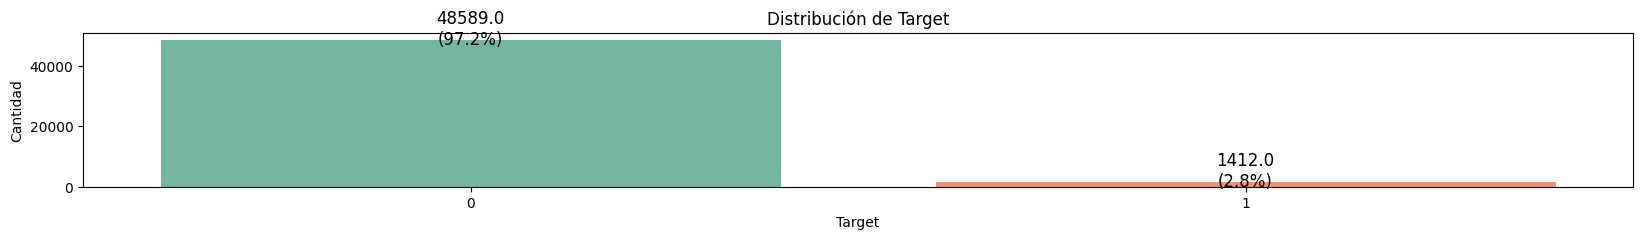

In [39]:
# 1. Analizar la distribución del Target
print("Distribución de Target:")
print(df_train['Target'].value_counts(normalize=True))

# Gráfico de barras para las variables categóricas con los valores y su participación
categorical_cols = ['Target']  # Asegúrate de que esta lista esté bien definida

# Crear los gráficos
for col in categorical_cols:
    plt.figure(figsize=(20, 2))
    ax = sns.countplot(data=df_train, x=col, hue=col, palette='Set2', legend=False)
    
    # Calcular la participación (porcentaje)
    total = len(df_train)
    
    # Añadir los valores y su participación sobre las barras
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.show()


La distribución de la variable objetivo (Target) muestra un desbalance de clases significativo:

97.18% de los datos corresponden a la clase 0 (clientes que NO se retiran).
2.82% de los datos corresponden a la clase 1 (clientes que SÍ se retiran).
¿Por qué es importante?
Este desbalance puede afectar el rendimiento del modelo de clasificación, ya que los algoritmos tienden a favorecer la clase mayoritaria (0)

1️⃣ Sobremuestreo de la Clase Minoritaria (oversampling)
Esta técnica aumenta la cantidad de datos de la clase minoritaria (1), replicando muestras existentes o generando nuevas con algoritmos como SMOTE (Synthetic Minority Over-sampling Technique).

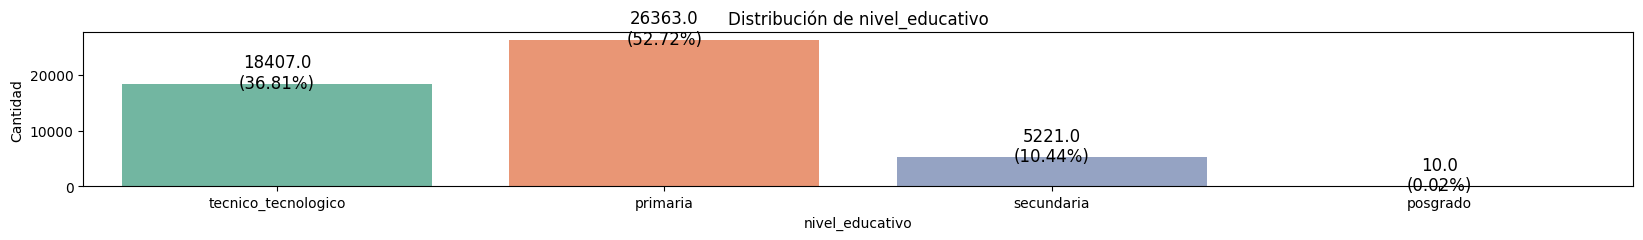

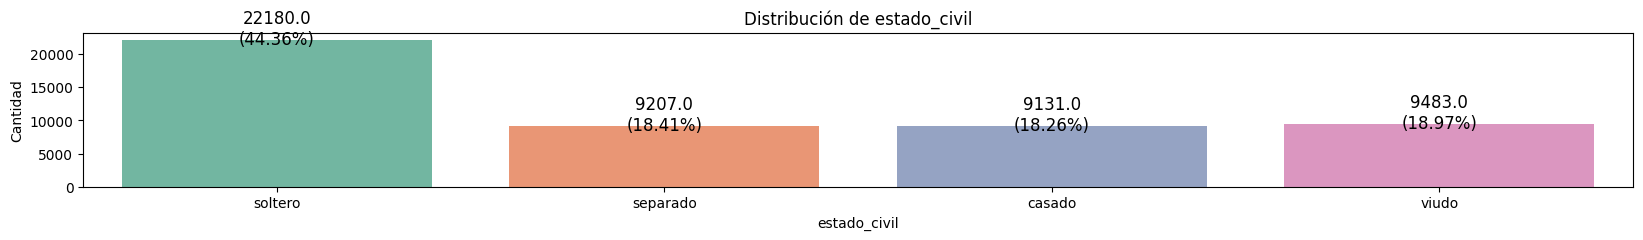

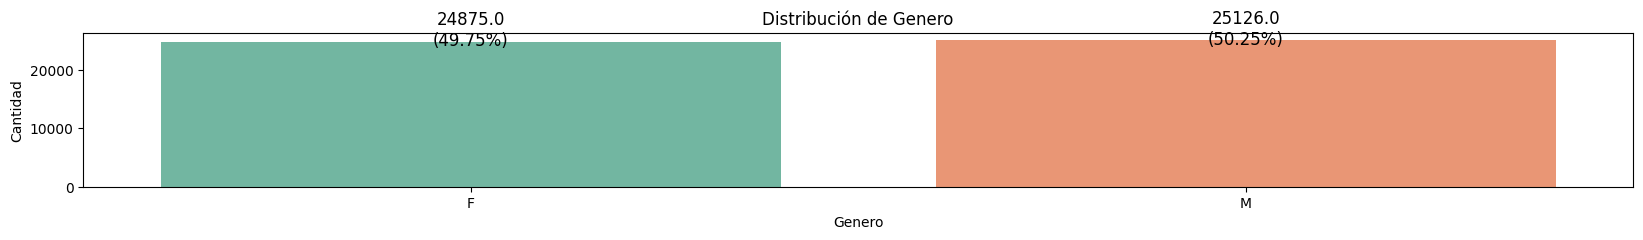

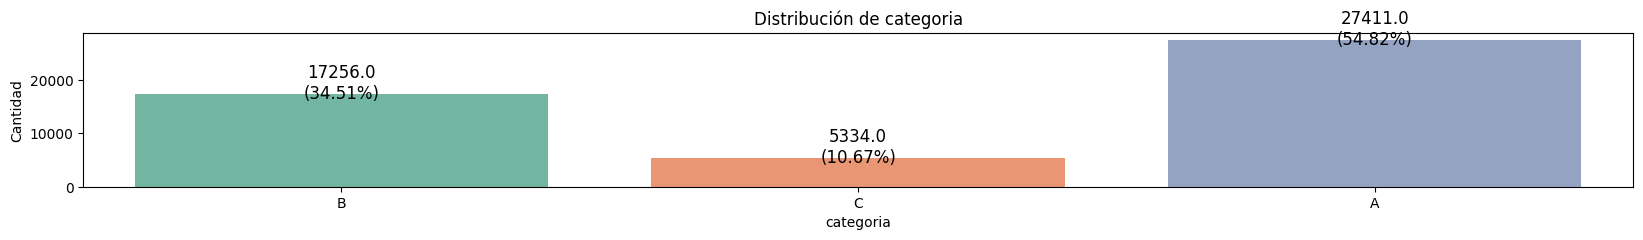

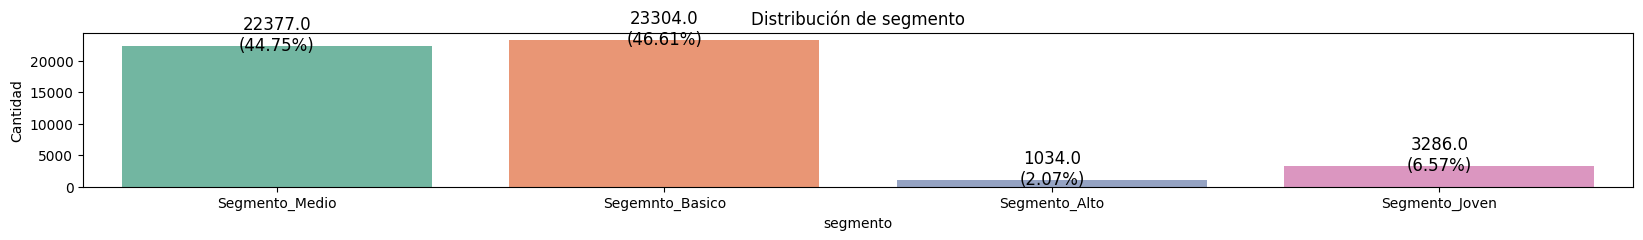

In [40]:
# Gráfico de barras para las variables categóricas con los valores y su participación
categorical_cols = ['nivel_educativo', 'estado_civil', 'Genero', 'categoria', 'segmento']  # Asegúrate de que esta lista esté bien definida

# Crear los gráficos
for col in categorical_cols:
    plt.figure(figsize=(20, 2))
    ax = sns.countplot(data=df_train, x=col, hue=col, palette='Set2', legend=False)
    
    # Calcular la participación (porcentaje)
    total = len(df_train)
    
    # Añadir los valores y su participación sobre las barras
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{height}\n({percentage:.2f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.show()

In [41]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Separa las características (X) y la variable objetivo (y)
X = df_train_numeric_categoric.drop(columns=['Target'])
y = df_train_numeric_categoric['Target']

# Aplica SMOTEENN para balancear las clases
smote_enn = SMOTEENN(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


# Verifica la distribución final de las clases balanceadas
print("Distribución final:", Counter(y_resampled))

# Crea un nuevo DataFrame con las instancias balanceadas
df_resampled = X_resampled.copy()
df_resampled['Target'] = y_resampled

# Muestra una parte del nuevo DataFrame balanceado
print(df_resampled.head())


Distribución final: Counter({0.0: 42535, 1.0: 35103})
   Saldos.Mes.Ant  Pago.Minimo  Vr.Cuota.Manejo  Total.Intereses  Edad.Mora  \
0             0.0          0.0              0.0              0.0        0.0   
1             0.0          0.0              0.0              0.0        0.0   
2             0.0          0.0              0.0              0.0        0.0   
3             0.0          0.0              0.0              0.0        0.0   
4             0.0          0.0              0.0              0.0        0.0   

   Vr.Mora  Pagos.Mes.Ant  Pago.del.Mes  Disponible.Avances categoria  \
0      0.0            0.0           0.0            0.063636       1.0   
1      0.0            0.0           0.0            0.071515       2.0   
2      0.0            0.0           0.0            0.009091       0.0   
3      0.0            0.0           0.0            0.041212       1.0   
4      0.0            0.0           0.0            0.200455       2.0   

  segmento nivel_educativo  esta

Distribución final: Counter({0.0: 48589, 1.0: 48589})


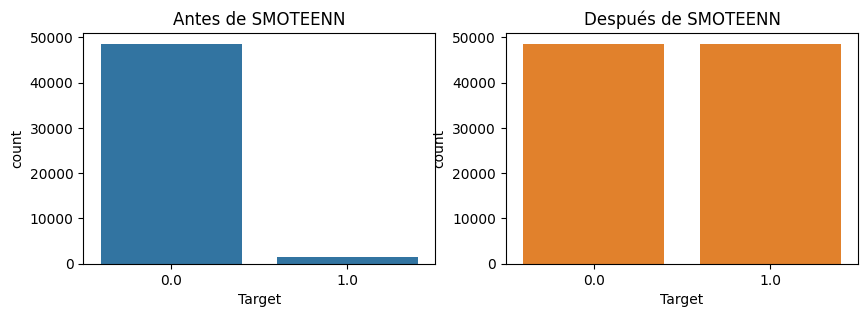

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN



fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Antes de SMOTEENN")

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("Después de SMOTEENN")
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Balance 1:1
X_resampled, y_resampled = smote.fit_resample(X, y)

sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("Después de SMOTEENN")
from imblearn.over_sampling import SMOTE

print("Distribución final:", Counter(y_resampled))

plt.show()


Distribución de Target:
Target
0.0    0.547863
1.0    0.452137
Name: proportion, dtype: float64


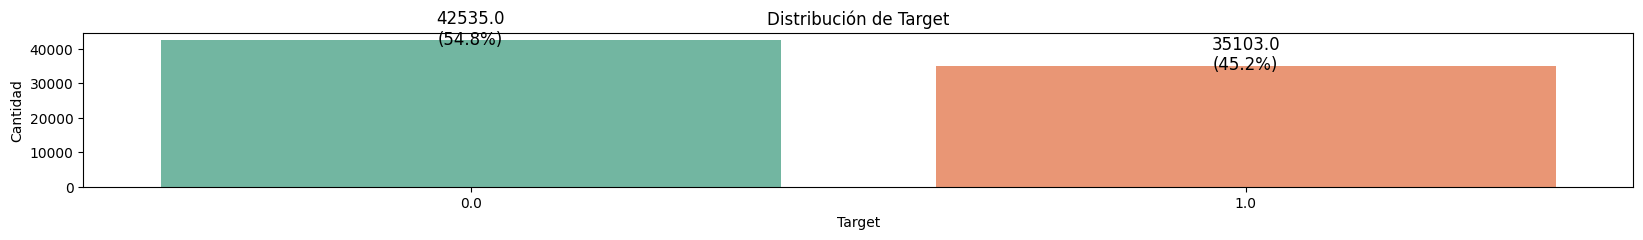

In [43]:
# 1. Analizar la distribución del Target
print("Distribución de Target:")
print(df_resampled['Target'].value_counts(normalize=True))

# Gráfico de barras para las variables categóricas con los valores y su participación
categorical_cols = ['Target']  # Asegúrate de que esta lista esté bien definida

# Crear los gráficos
for col in categorical_cols:
    plt.figure(figsize=(20, 2))
    ax = sns.countplot(data=df_resampled, x=col, hue=col, palette='Set2', legend=False)
    
    # Calcular la participación (porcentaje)
    total = len(df_resampled)
    
    # Añadir los valores y su participación sobre las barras
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.show()

Diferencias porcentuales en estadísticas:
       Saldos.Mes.Ant  Pago.Minimo  Vr.Cuota.Manejo  Total.Intereses  \
count       94.352113    94.352113        94.352113        94.352113   
mean       -32.721867   -41.986183       -33.466951       -45.284026   
std        -21.069965   -26.720690       -25.089301       -27.360864   
min               NaN          NaN              NaN              NaN   
25%               NaN          NaN              NaN              NaN   
50%     803992.573132          NaN              NaN              NaN   
75%        -57.618221   -53.592287        -0.953615       -78.559242   
max          0.000000     0.000000         0.000000         0.000000   

       Edad.Mora    Vr.Mora  Pagos.Mes.Ant  Pago.del.Mes  Disponible.Avances  \
count  94.352113  94.352113      94.352113     94.352113           94.352113   
mean  -47.634913 -47.442449      17.723737     34.780670            6.326799   
std   -27.455022 -27.645879      -6.925459     -2.400964            0

<Figure size 200x1000 with 0 Axes>

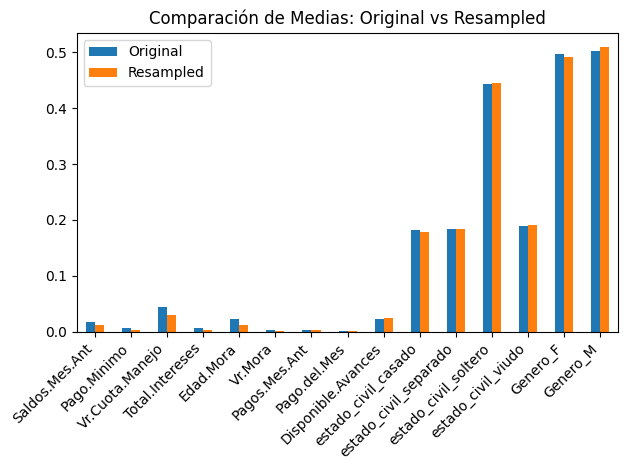

<Figure size 500x1000 with 0 Axes>

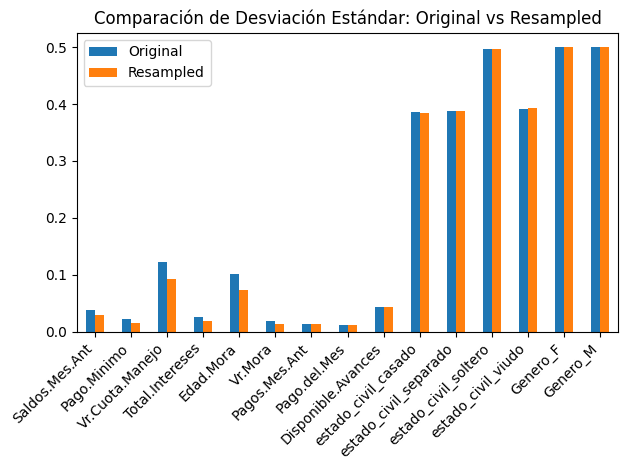

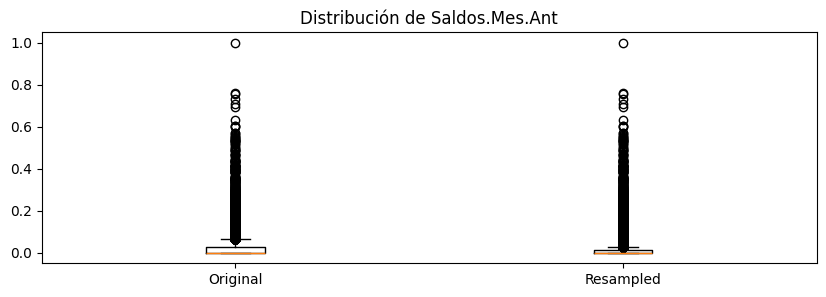

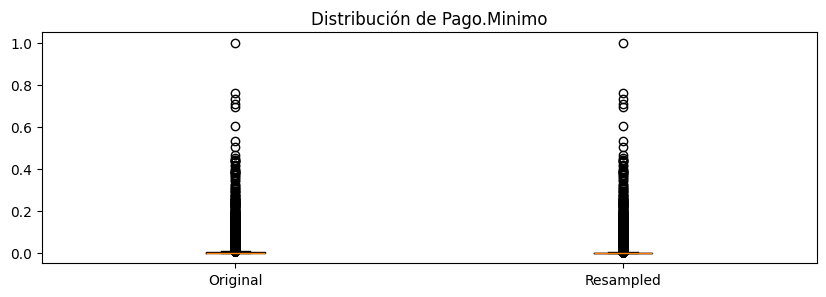

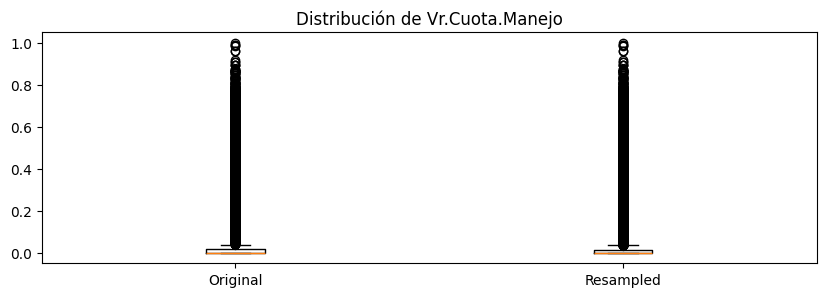

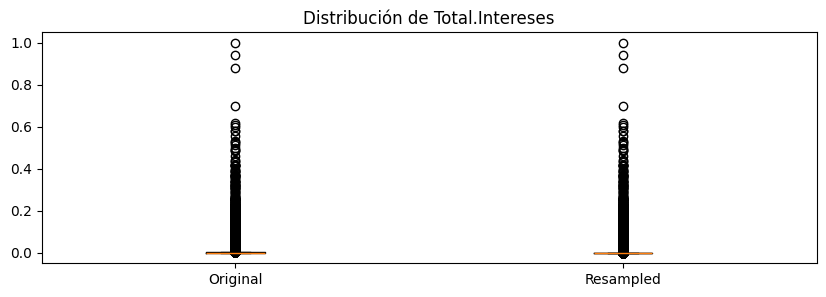

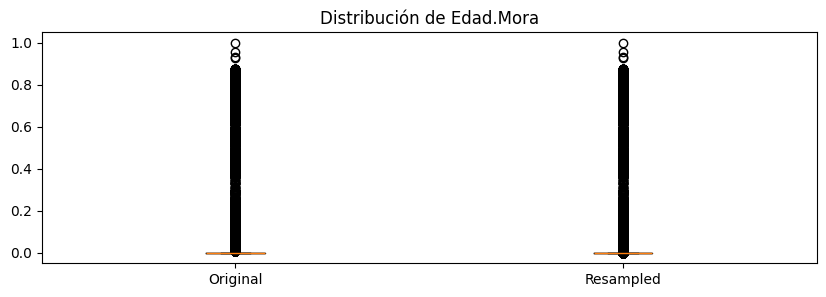

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir X_resampled a DataFrame con los mismos nombres de columnas
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Obtener estadísticas descriptivas
stats_original = X.describe()
stats_resampled = X_resampled_df.describe()

# Calcular diferencias porcentuales
diff_pct = ((stats_resampled - stats_original) / stats_original * 100)

print("Diferencias porcentuales en estadísticas:")
print(diff_pct)

# Visualización de las diferencias en medias
plt.figure(figsize=(2, 10))
means_comparison = pd.DataFrame({
    'Original': stats_original.loc['mean'],
    'Resampled': stats_resampled.loc['mean']
})
means_comparison.plot(kind='bar')
plt.title('Comparación de Medias: Original vs Resampled')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización de las diferencias en desviación estándar
plt.figure(figsize=(5, 10))
std_comparison = pd.DataFrame({
    'Original': stats_original.loc['std'],
    'Resampled': stats_resampled.loc['std']
})
std_comparison.plot(kind='bar')
plt.title('Comparación de Desviación Estándar: Original vs Resampled')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Para variables numéricas específicas que quieras examinar en detalle
# Puedes usar boxplots para comparar la distribución
for column in X.columns[:5]:  # Primeras 5 columnas como ejemplo
    plt.figure(figsize=(10, 3))
    plt.boxplot([X[column], X_resampled_df[column]], tick_labels=['Original', 'Resampled'])
    plt.title(f'Distribución de {column}')
    plt.show()

In [45]:
from sklearn.model_selection import train_test_split

# Separar en train (80%) y test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Separar el conjunto de entrenamiento en train (80%) y validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


Train size: (62193, 18)
Validation size: (15549, 18)
Test size: (19436, 18)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir el modelo base
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar con train
clf.fit(X_train, y_train)

# Evaluar en validation
y_val_pred = clf.predict(X_val)
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

Accuracy en validación: 0.9537590841854782
Reporte de clasificación en validación:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7775
         1.0       0.94      0.97      0.95      7774

    accuracy                           0.95     15549
   macro avg       0.95      0.95      0.95     15549
weighted avg       0.95      0.95      0.95     15549



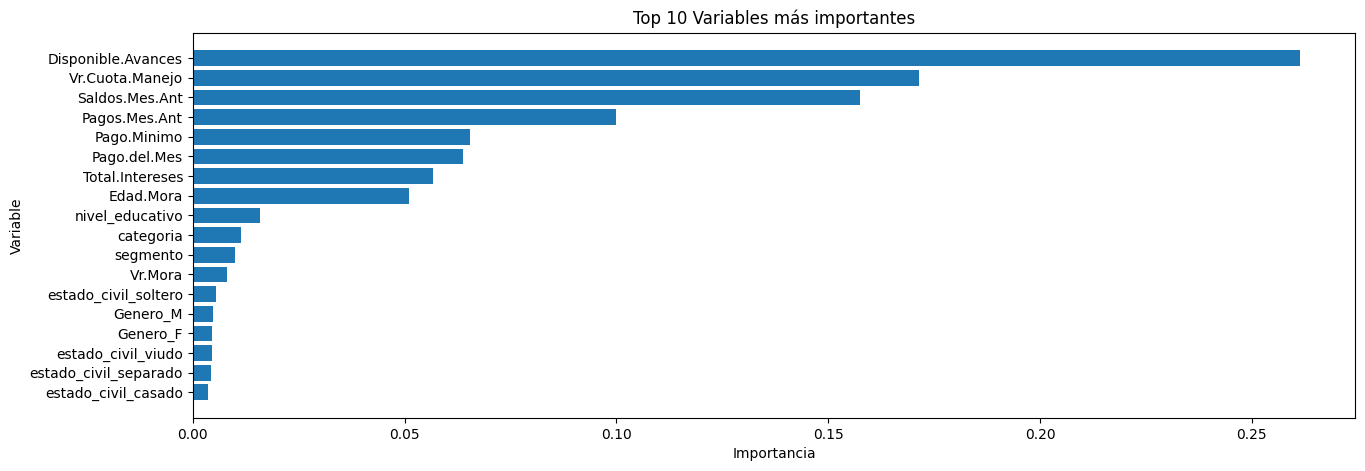

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15,5))
plt.barh(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Top 10 Variables más importantes")
plt.gca().invert_yaxis()
plt.show()


Accuracy en entrenamiento: 0.978
Accuracy en train: 0.978454166867654
Reporte de clasificación en train:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     31096
         1.0       0.97      0.98      0.98     31097

    accuracy                           0.98     62193
   macro avg       0.98      0.98      0.98     62193
weighted avg       0.98      0.98      0.98     62193



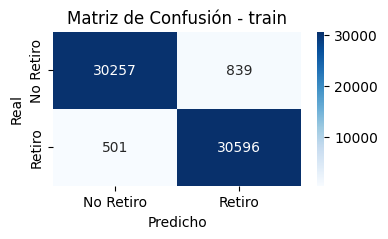

Accuracy en validación: 0.954
Accuracy en validación: 0.9537590841854782
Reporte de clasificación en validación:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      7775
         1.0       0.94      0.97      0.95      7774

    accuracy                           0.95     15549
   macro avg       0.95      0.95      0.95     15549
weighted avg       0.95      0.95      0.95     15549



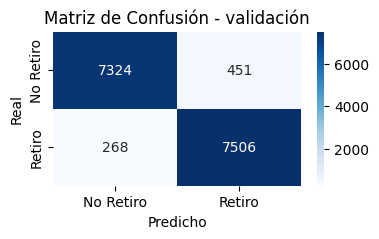

Accuracy en test: 0.953
Accuracy en test: 0.9533854702613707
Reporte de clasificación en test:
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      9718
         1.0       0.94      0.96      0.95      9718

    accuracy                           0.95     19436
   macro avg       0.95      0.95      0.95     19436
weighted avg       0.95      0.95      0.95     19436



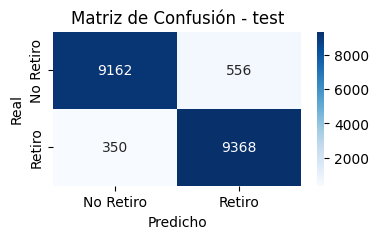

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_train_pred = clf.predict(X_train)
print(f"Accuracy en entrenamiento: {accuracy_score(y_train, y_train_pred):.3f}")

y_train_pred = clf.predict(X_train)
print("Accuracy en train:", accuracy_score(y_train, y_train_pred))
print("Reporte de clasificación en train:\n", classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Retiro", "Retiro"], yticklabels=["No Retiro", "Retiro"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - train")
plt.show()

y_val_pred = clf.predict(X_val)
print(f"Accuracy en validación: {accuracy_score(y_val, y_val_pred):.3f}")

y_val_pred = clf.predict(X_val)
print("Accuracy en validación:", accuracy_score(y_val, y_val_pred))
print("Reporte de clasificación en validación:\n", classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Retiro", "Retiro"], yticklabels=["No Retiro", "Retiro"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - validación")
plt.show()

y_test_pred = clf.predict(X_test)
print(f"Accuracy en test: {accuracy_score(y_test, y_test_pred):.3f}")


y_test_pred = clf.predict(X_test)
print("Accuracy en test:", accuracy_score(y_test, y_test_pred))
print("Reporte de clasificación en test:\n", classification_report(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Retiro", "Retiro"], yticklabels=["No Retiro", "Retiro"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - test")
plt.show()

In [49]:
import joblib

# Guardar el modelo entrenado
joblib.dump(clf, "modelo_fuga_COL_random_forest.pkl")

print("✅ Modelo guardado como 'modelo_random_forest.pkl'")


✅ Modelo guardado como 'modelo_random_forest.pkl'


In [50]:
# Cargar el modelo entrenado
modelo_cargado = joblib.load("modelo_fuga_COL_random_forest.pkl")

# Usarlo para predecir
y_test_pred = modelo_cargado.predict(X_test)

🔹 Accuracy en test: 0.9534

📊 Reporte de clasificación en test:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      9718
         1.0       0.94      0.96      0.95      9718

    accuracy                           0.95     19436
   macro avg       0.95      0.95      0.95     19436
weighted avg       0.95      0.95      0.95     19436



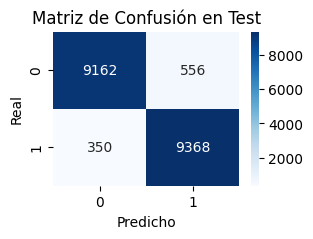

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en test
y_pred_test = modelo_cargado.predict(X_test)

# Evaluación de métricas
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"🔹 Accuracy en test: {accuracy_test:.4f}")

print("\n📊 Reporte de clasificación en test:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión en Test")
plt.show()


# Prueba Modelo con datos Nuevos

In [52]:
df_test = pd.read_csv("test.csv", encoding="ISO-8859-1", delimiter=";")
df_demograficas_prueba = pd.read_excel("train_test_demograficas.xlsx")
df_demograficas_prueba = pd.read_excel("train_test_subsidios.xlsx")


# Primero unir train con datos demográficos
df_test = pd.merge(df_test, df_demograficas, on='id', how='left')
df_test = pd.merge(df_test, df_subsidios, on='id', how='left')

# 1. Primero limpiemos las variables monetarias
def clean_monetary(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', '').replace(' ', ''))
    return x

# Variables monetarias
monetary_cols = [
'Disponible.Avances', 'Limite.Avances','Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant','Limite.Cupo', 
'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora','Vr.Cuota.Manejo', 'Saldo'
]

# Convertir variables monetarias
for col in monetary_cols:
    df_test[col] = df_test[col].apply(clean_monetary)

df_test[['cuota_monetaria', 'sub_vivenda', 'bono_lonchera','contrato']] = df_test[['cuota_monetaria', 'sub_vivenda', 'bono_lonchera','contrato']].astype(str)


# Lista de columnas a eliminar
columns_to_drop = ["Retencion", "Cancelacion", "Gestionable", "TIPO", "ANO_MES", "estrato"]

# Filtrar las columnas que existen en el DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df_test.columns]

# Eliminar las columnas filtradas
df_test = df_test.drop(columns=columns_to_drop)

# Lista de columnas a conservar (excluyendo 'id')
columns_to_keep = ['id',
    'Saldos.Mes.Ant', 'Pago.Minimo',
    'Vr.Cuota.Manejo', 'Total.Intereses', 'Edad.Mora', 'Vr.Mora',
    'Pagos.Mes.Ant', 'Pago.del.Mes', 'Disponible.Avances'
]

# Filtrar el DataFrame
df_test_selected = df_test[columns_to_keep]

from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del scaler
scaler = MinMaxScaler()

# Seleccionar solo las columnas numéricas
numerical_columns = [ 'Saldos.Mes.Ant', 'Pago.Minimo', 
                     'Vr.Cuota.Manejo', 'Total.Intereses', 'Edad.Mora', 'Vr.Mora', 
                     'Pagos.Mes.Ant', 'Pago.del.Mes', 'Disponible.Avances']

# Aplicar el scaler a las columnas numéricas
df_test_selected[numerical_columns] = scaler.fit_transform(df_test_selected[numerical_columns])

df_test_categoric = df_test[['id','categoria', 'segmento', 'nivel_educativo', 'estado_civil', 'Genero']]

categorical_columns = df_test_categoric.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OrdinalEncoder

# Define el orden de las categorías para cada columna
categoria_order = ['A', 'B', 'C']
segmento_order = ['Segmento_Joven', 'Segemnto_Basico', 'Segmento_Medio', 'Segmento_Alto']
nivel_educativo_order = ['primaria', 'secundaria', 'tecnico_tecnologico', 'posgrado']

# Crea un diccionario con los ordenes de las variables
orders = {
    'categoria': categoria_order,
    'segmento': segmento_order,
    'nivel_educativo': nivel_educativo_order
}

# Aplica OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[categoria_order, segmento_order, nivel_educativo_order])

# Usa .loc para evitar el SettingWithCopyWarning
df_test_categoric.loc[:, ['categoria', 'segmento', 'nivel_educativo']] = ordinal_encoder.fit_transform(df_test_categoric[['categoria', 'segmento', 'nivel_educativo']])

# Para las variables sin orden
df_test_categoric = pd.get_dummies(df_test_categoric, columns=['estado_civil', 'Genero'])

columns_to_convert = ['estado_civil_casado','estado_civil_separado','estado_civil_soltero','estado_civil_viudo','Genero_F','Genero_M']  # Especifica las columnas booleanas
df_test_categoric[columns_to_convert] = df_test_categoric[columns_to_convert].astype(int)

df_test_numeric_categoric = pd.merge(df_test_selected,df_test_categoric,how='left',on=['id'])

# Convertir la columna 'ID' en el índice
df_test_numeric_categoric = df_test_numeric_categoric.set_index('id')

df_test_numeric_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 50002 to 55002
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Saldos.Mes.Ant         5001 non-null   float64
 1   Pago.Minimo            5001 non-null   float64
 2   Vr.Cuota.Manejo        5001 non-null   float64
 3   Total.Intereses        5001 non-null   float64
 4   Edad.Mora              5001 non-null   float64
 5   Vr.Mora                5001 non-null   float64
 6   Pagos.Mes.Ant          5001 non-null   float64
 7   Pago.del.Mes           5001 non-null   float64
 8   Disponible.Avances     5001 non-null   float64
 9   categoria              5001 non-null   object 
 10  segmento               5001 non-null   object 
 11  nivel_educativo        5001 non-null   object 
 12  estado_civil_casado    5001 non-null   int64  
 13  estado_civil_separado  5001 non-null   int64  
 14  estado_civil_soltero   5001 non-null   int64  
 15  esta

C:\Users\wvanegas\AppData\Local\Temp\ipykernel_22672\2998511053.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_selected[numerical_columns] = scaler.fit_transform(df_test_selected[numerical_columns])


In [53]:
probabilidades = modelo_cargado.predict_proba(df_test_numeric_categoric)  # No es necesario eliminar 'Target' si no está presente.
# Obtener la probabilidad para la clase 1 (retiro)
probabilidad_retiro = probabilidades[:, 1]

# Agregar la columna con las probabilidades al DataFrame
df_test_numeric_categoric['probabilidad_retiro'] = probabilidad_retiro*100


In [54]:
df_test_numeric_categoric.probabilidad_retiro.sort_values(ascending = False).reset_index()

,id,probabilidad_retiro
0,54955,100.0
1,54948,100.0
2,54946,100.0
3,54953,100.0
4,54945,100.0
...,...,...
4996,50094,0.0
4997,53009,0.0
4998,50096,0.0
4999,50097,0.0


# MODELO DE CALSIFICACIÖN

In [55]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

df_train_numeric_categoric_Clasificacion.drop(columns=['Target'], inplace=True)
df_train_numeric_categoric_Clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50001 non-null  float64
 1   Saldos.Mes.Ant         50001 non-null  float64
 2   Pago.Minimo            50001 non-null  float64
 3   Vr.Cuota.Manejo        50001 non-null  float64
 4   Total.Intereses        50001 non-null  float64
 5   Edad.Mora              50001 non-null  float64
 6   Vr.Mora                50001 non-null  float64
 7   Pagos.Mes.Ant          50001 non-null  float64
 8   Pago.del.Mes           50001 non-null  float64
 9   Disponible.Avances     50001 non-null  float64
 10  categoria              50001 non-null  object 
 11  segmento               50001 non-null  object 
 12  nivel_educativo        50001 non-null  object 
 13  estado_civil_casado    50001 non-null  int64  
 14  estado_civil_separado  50001 non-null  int64  
 15  es

In [56]:
df_train_numeric_categoric_Clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50001 non-null  float64
 1   Saldos.Mes.Ant         50001 non-null  float64
 2   Pago.Minimo            50001 non-null  float64
 3   Vr.Cuota.Manejo        50001 non-null  float64
 4   Total.Intereses        50001 non-null  float64
 5   Edad.Mora              50001 non-null  float64
 6   Vr.Mora                50001 non-null  float64
 7   Pagos.Mes.Ant          50001 non-null  float64
 8   Pago.del.Mes           50001 non-null  float64
 9   Disponible.Avances     50001 non-null  float64
 10  categoria              50001 non-null  object 
 11  segmento               50001 non-null  object 
 12  nivel_educativo        50001 non-null  object 
 13  estado_civil_casado    50001 non-null  int64  
 14  estado_civil_separado  50001 non-null  int64  
 15  es

In [57]:
df_train_numeric_categoric_Clasificacion.head()
# Convertir las variables categóricas ordinales a tipo int
df_train_numeric_categoric_Clasificacion['categoria'] = df_train_numeric_categoric_Clasificacion['categoria'].astype(int)
df_train_numeric_categoric_Clasificacion['segmento'] = df_train_numeric_categoric_Clasificacion['segmento'].astype(int)
df_train_numeric_categoric_Clasificacion['nivel_educativo'] = df_train_numeric_categoric_Clasificacion['nivel_educativo'].astype(int)


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supón que df_test_numeric_categoric es tu DataFrame preprocesado

# Seleccionamos las columnas numéricas para el clustering
features = df_train_numeric_categoric_Clasificacion.drop(columns=['categoria', 'segmento', 'nivel_educativo', 'estado_civil_casado', 
                            'estado_civil_separado', 'estado_civil_soltero', 'estado_civil_viudo',
                            'Genero_F', 'Genero_M'])  # Excluimos las categóricas

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-Means (puedes ajustar el número de clusters según lo que necesites)
kmeans = KMeans(n_clusters=4, random_state=42)  # Por ejemplo, 4 clusters
df_train_numeric_categoric_Clasificacion['Segmento'] = kmeans.fit_predict(features_scaled)


# Si deseas ver cómo quedaron distribuidos los clientes en los segmentos
print(df_train_numeric_categoric_Clasificacion['Segmento'].value_counts())



Segmento
0    44898
1     3701
2     1251
3      151
Name: count, dtype: int64


In [60]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculamos las métricas de evaluación
silhouette_avg = silhouette_score(features_scaled, df_train_numeric_categoric_Clasificacion['Segmento'])
calinski_harabasz = calinski_harabasz_score(features_scaled, df_train_numeric_categoric_Clasificacion['Segmento'])
davies_bouldin = davies_bouldin_score(features_scaled, df_train_numeric_categoric_Clasificacion['Segmento'])


In [61]:
# 2. Inercia (Within-cluster sum of squares)
inercia = kmeans.inertia_

print("Métricas de evaluación del clustering:")
print(f"Coeficiente de Silueta: {silhouette_avg:.3f}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz:.3f}")
print(f"Índice Davies-Bouldin: {davies_bouldin:.3f}")
print(f"Inercia: {inercia:.3f}")



Métricas de evaluación del clustering:
Coeficiente de Silueta: 0.588
Índice Calinski-Harabasz: 9561.553
Índice Davies-Bouldin: 1.056
Inercia: 317723.357


In [62]:
# 3. Análisis de centroides
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features.columns
)

print("\nCentroides de cada cluster:")
print(centroids)




Centroides de cada cluster:
             id  Saldos.Mes.Ant  Pago.Minimo  Vr.Cuota.Manejo  \
0  25647.101902        0.011803     0.001890         0.010719   
1  22173.972995        0.066989     0.036587         0.383967   
2  11002.823341        0.061527     0.061291         0.188189   
3  18198.410596        0.314501     0.251003         0.334853   

   Total.Intereses  Edad.Mora   Vr.Mora  Pagos.Mes.Ant  Pago.del.Mes  \
0         0.001450   0.002046  0.000448       0.003013      0.001326   
1         0.050528   0.068109  0.016901       0.002233      0.000606   
2         0.007245   0.591959  0.043921       0.000389      0.000423   
3         0.217094   0.202158  0.193173       0.000343      0.000083   

   Disponible.Avances  
0            0.025123  
1            0.006161  
2            0.001848  
3            0.009742  


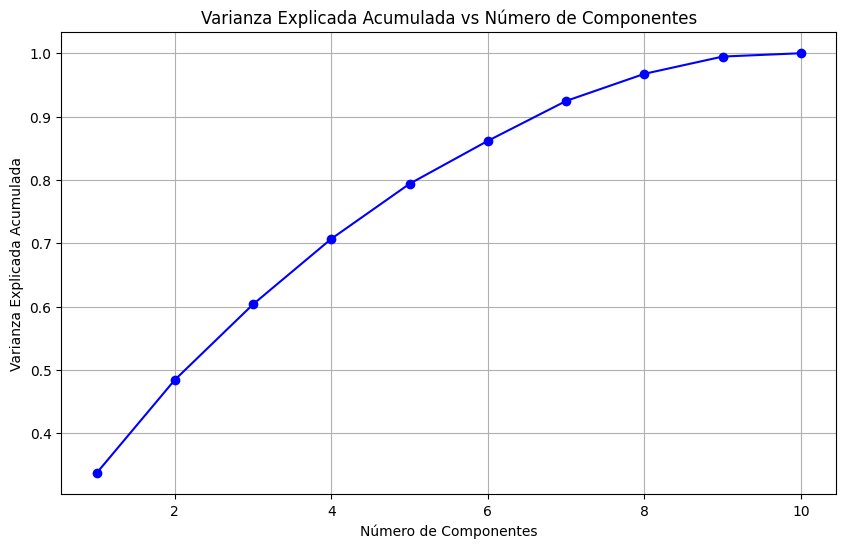

Número de componentes necesarios para explicar el 95% de la varianza: 8


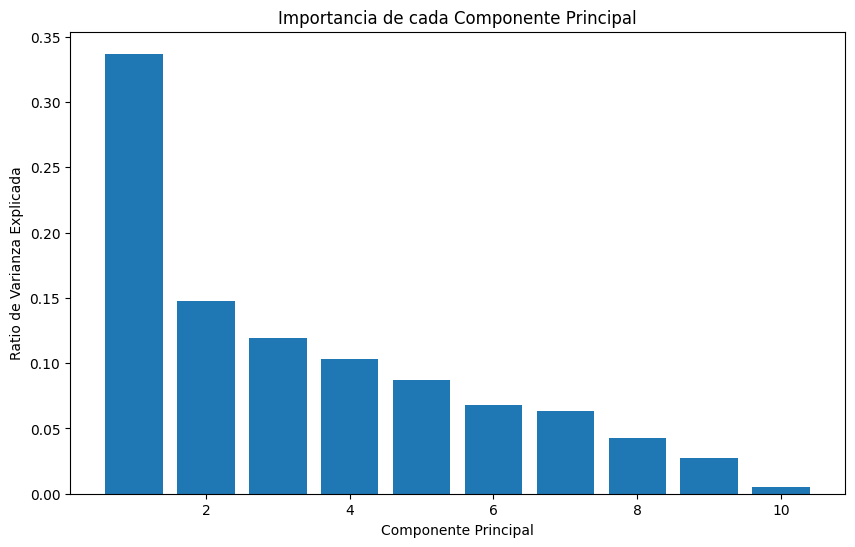

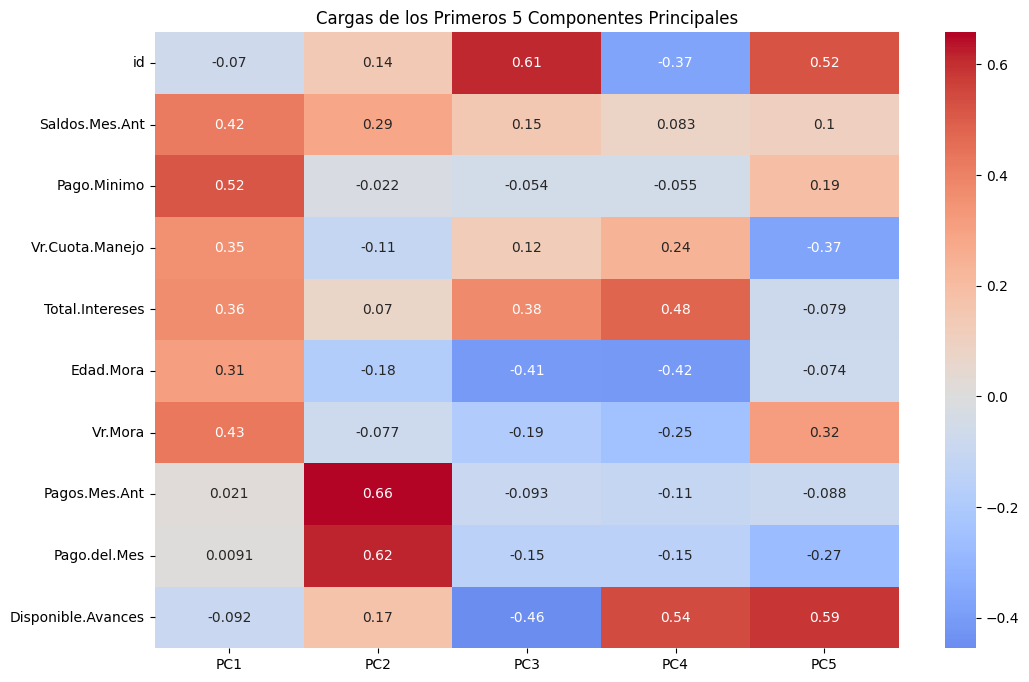


Correlaciones entre los primeros componentes principales:
categoria    1.000000
PC4          0.393333
PC5          0.323575
PC2          0.251536
PC8          0.111352
PC1          0.028908
PC7         -0.006658
PC6         -0.042059
PC3         -0.309024
Name: categoria, dtype: float64


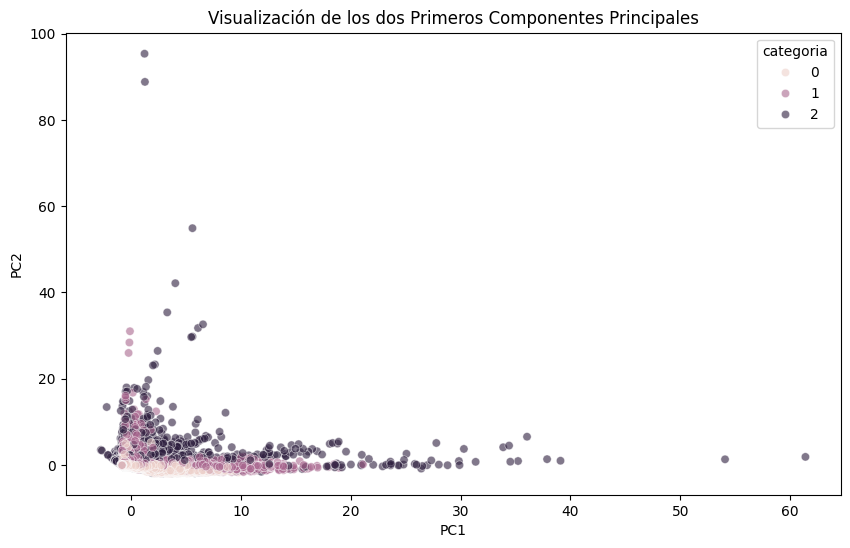

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Aplicar PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# 2. Calcular varianza explicada acumulada
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

# 3. Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs Número de Componentes')
plt.grid(True)
plt.show()

# 4. Encontrar número óptimo de componentes para explicar el 95% de la varianza
n_components = np.argmax(cum_var_ratio >= 0.95) + 1
print(f"Número de componentes necesarios para explicar el 95% de la varianza: {n_components}")

# 5. Visualizar la importancia de cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_ratio) + 1), var_ratio)
plt.xlabel('Componente Principal')
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Importancia de cada Componente Principal')
plt.show()

# 6. Crear DataFrame con los componentes principales
df_pca = pd.DataFrame(
    features_pca,
    columns=[f'PC{i+1}' for i in range(features_pca.shape[1])]
)

# 7. Análisis de las cargas (loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(features_pca.shape[1])],
    index=features.columns
)

# 8. Visualizar el heatmap de las cargas para los primeros componentes
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], annot=True, cmap='coolwarm', center=0)
plt.title('Cargas de los Primeros 5 Componentes Principales')
plt.show()

# 9. Crear nuevo DataFrame con los componentes principales seleccionados
pca_selected = PCA(n_components=n_components)
features_pca_selected = pca_selected.fit_transform(features_scaled)
df_pca_selected = pd.DataFrame(
    features_pca_selected,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# 10. Agregar la variable objetivo al DataFrame de PCA
df_pca_selected['categoria'] = df_train_numeric_categoric_Clasificacion['categoria']

print("\nCorrelaciones entre los primeros componentes principales:")
print(df_pca_selected.corr()['categoria'].sort_values(ascending=False))

# 11. Visualización 2D de los primeros dos componentes por categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca_selected,
    x='PC1',
    y='PC2',
    hue='categoria',
    alpha=0.6
)
plt.title('Visualización de los dos Primeros Componentes Principales')
plt.show()

In [64]:
# Usar los componentes principales seleccionados para el modelo
X = df_pca_selected.drop('categoria', axis=1)
y = df_pca_selected['categoria']

# Ahora puedes usar X e y para tu modelo de clasificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Preparar los datos
X = df_pca_selected.drop('categoria', axis=1)
y = df_pca_selected['categoria']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear diccionario de modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier()
}

# Evaluar cada modelo con cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} - CV Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Random Forest - CV Accuracy: 0.907 (+/- 0.004)
Gradient Boosting - CV Accuracy: 0.883 (+/- 0.007)
SVM - CV Accuracy: 0.899 (+/- 0.005)
Logistic Regression - CV Accuracy: 0.862 (+/- 0.006)
KNN - CV Accuracy: 0.903 (+/- 0.004)


In [66]:
from sklearn.model_selection import GridSearchCV

# Ejemplo con Random Forest (ajusta según el mejor modelo)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)


Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mejor score: 0.9129750000000001



Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5485
           1       0.91      0.90      0.91      3476
           2       0.94      0.70      0.81      1040

    accuracy                           0.92     10001
   macro avg       0.92      0.86      0.88     10001
weighted avg       0.92      0.92      0.91     10001



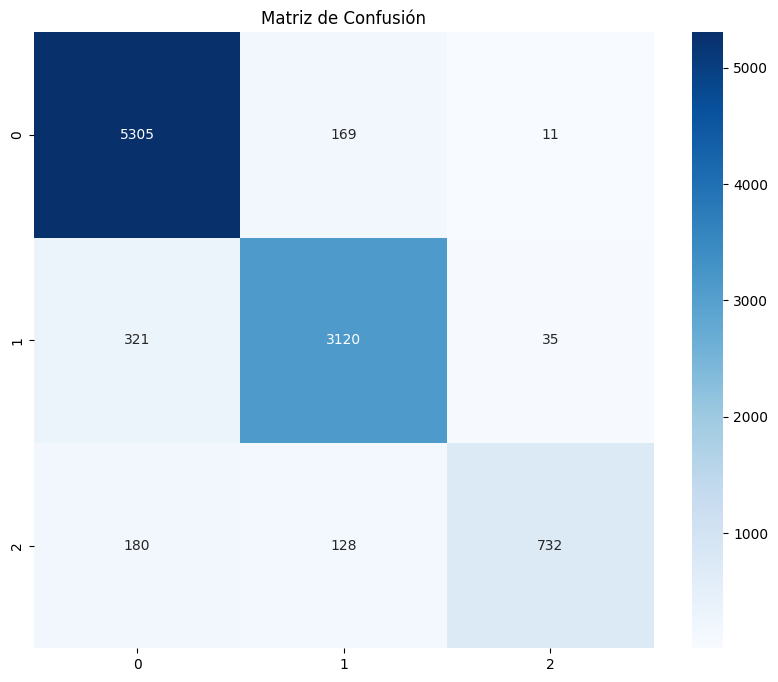

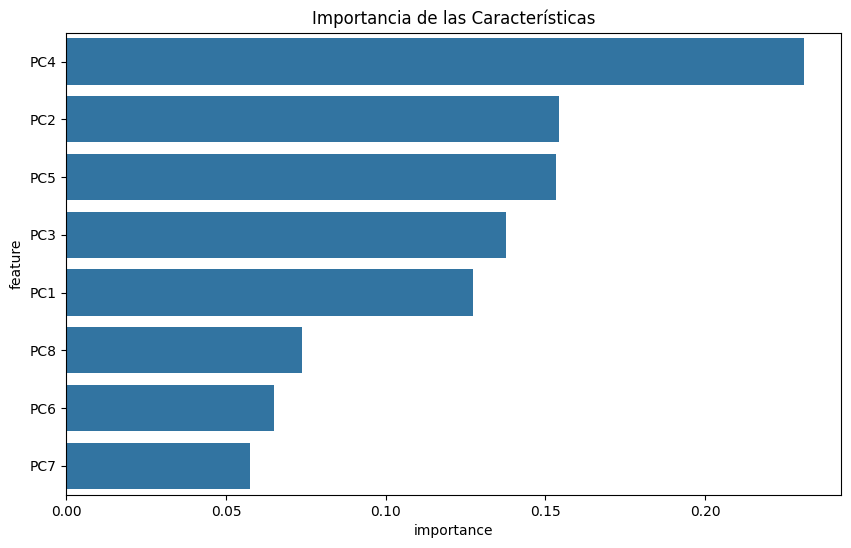

In [69]:
# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluación detallada
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Feature importance (si usas Random Forest)
if hasattr(best_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title('Importancia de las Características')
    plt.show()

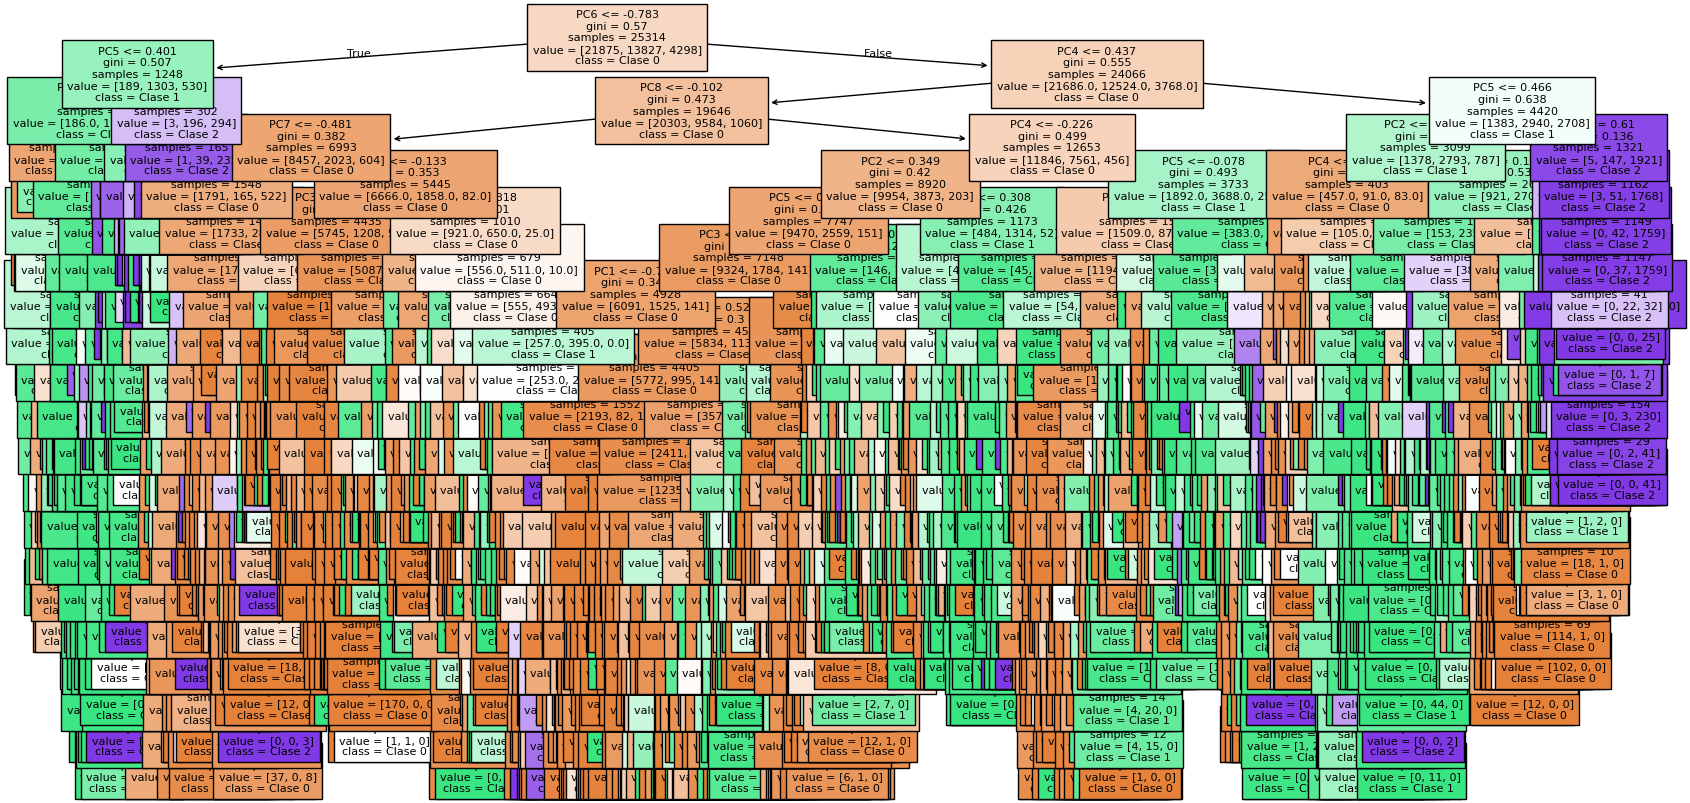

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionar un árbol del bosque aleatorio
tree_to_plot = best_model.estimators_[0]  

# Graficar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_to_plot, feature_names=X_train.columns, class_names=['Clase 0', 'Clase 1', 'Clase 2'], filled=True, fontsize=8)
plt.show()

Estadísticas descriptivas por cluster:
                    id                               Saldos.Mes.Ant            \
                  mean           std    min      max           mean       std   
Segmento                                                                        
0         25646.333801  14542.012186    1.0  50001.0       0.011803  0.023601   
1         22181.414212  11138.635129   99.0  47457.0       0.067011  0.064544   
2         11002.823341  10768.250291   49.0  47153.0       0.061527  0.036273   
3         18198.410596  11158.502716  190.0  45094.0       0.314501  0.150815   

                             Pago.Minimo            ... estado_civil_viudo  \
               min       max        mean       std  ...                min   
Segmento                                            ...                      
0         0.000000  0.416105    0.001890  0.004942  ...                  0   
1         0.006394  0.631869    0.036601  0.020108  ...                  0   
2  

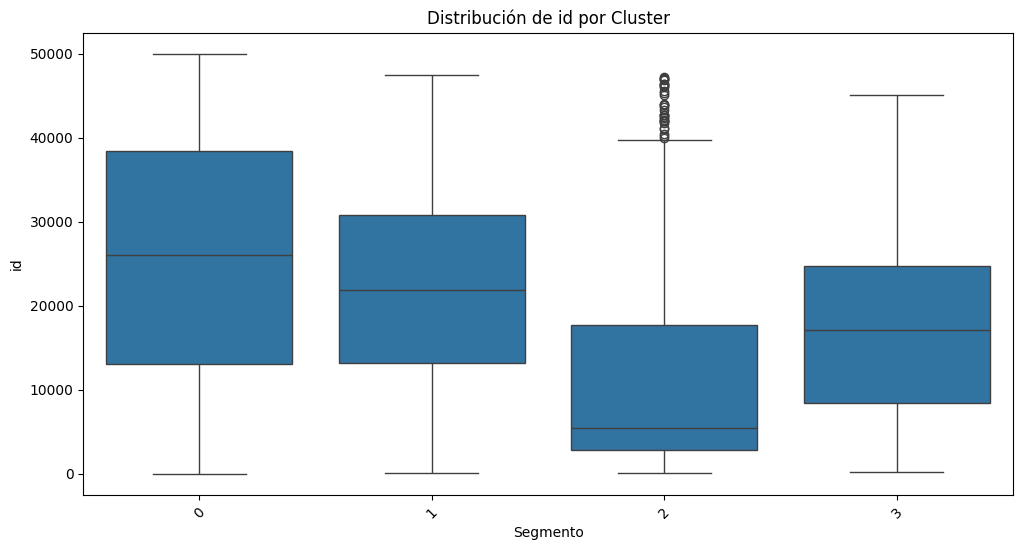

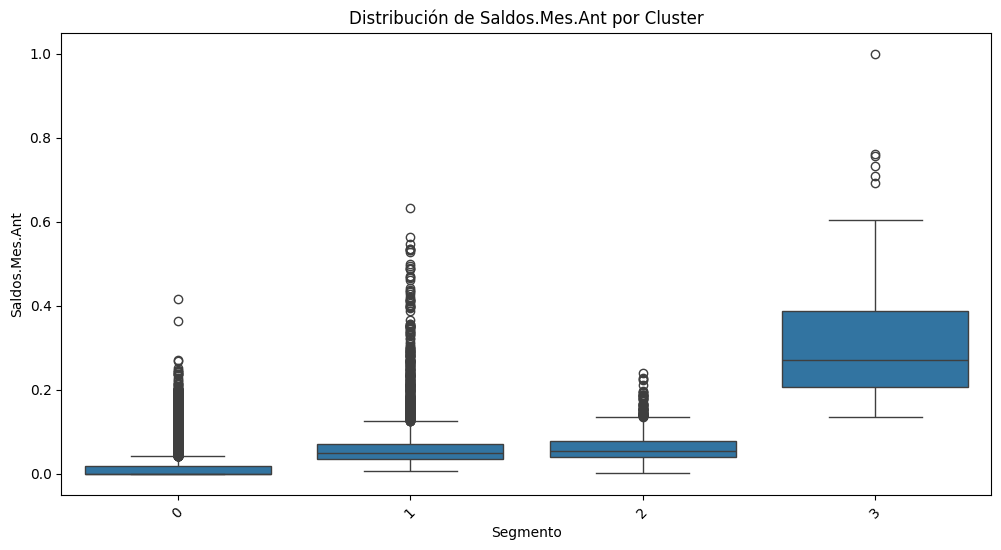

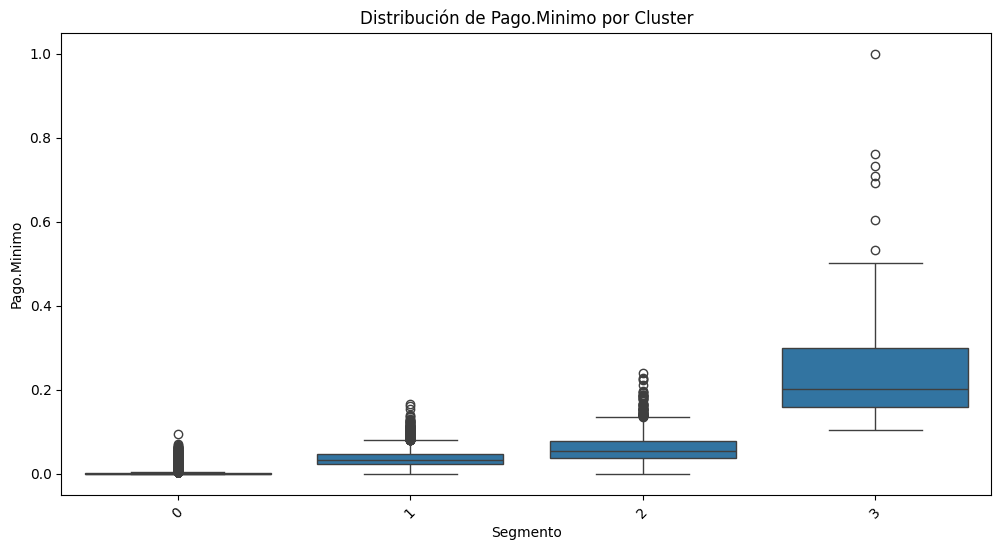

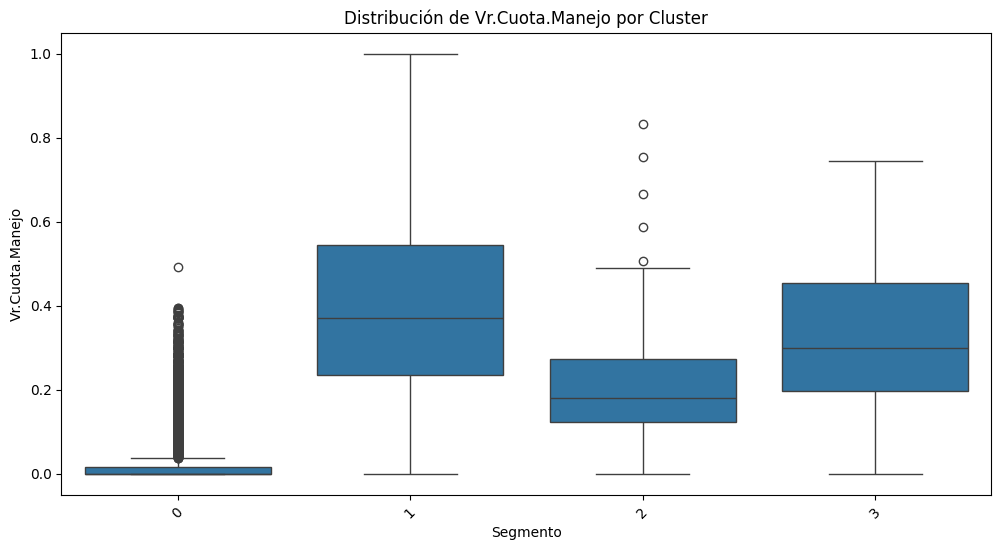

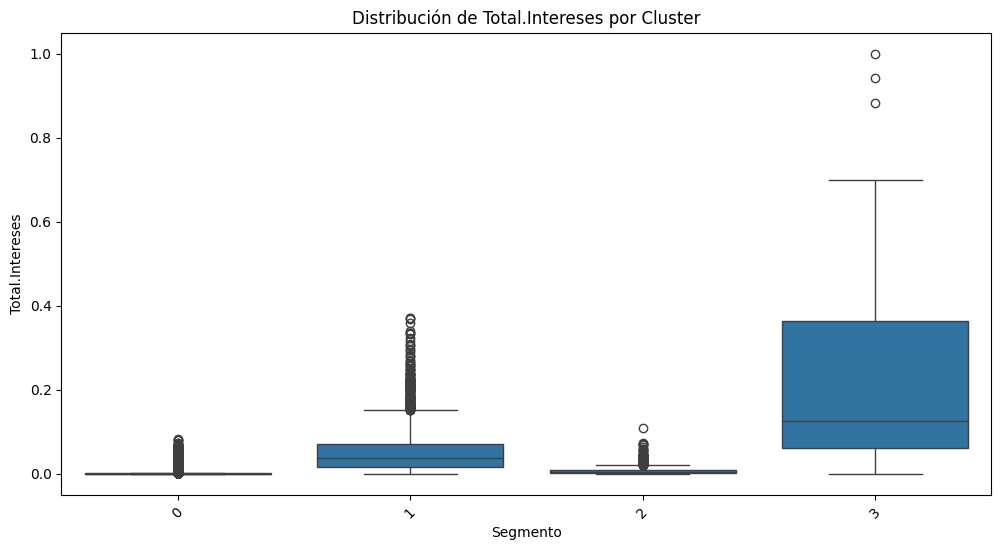

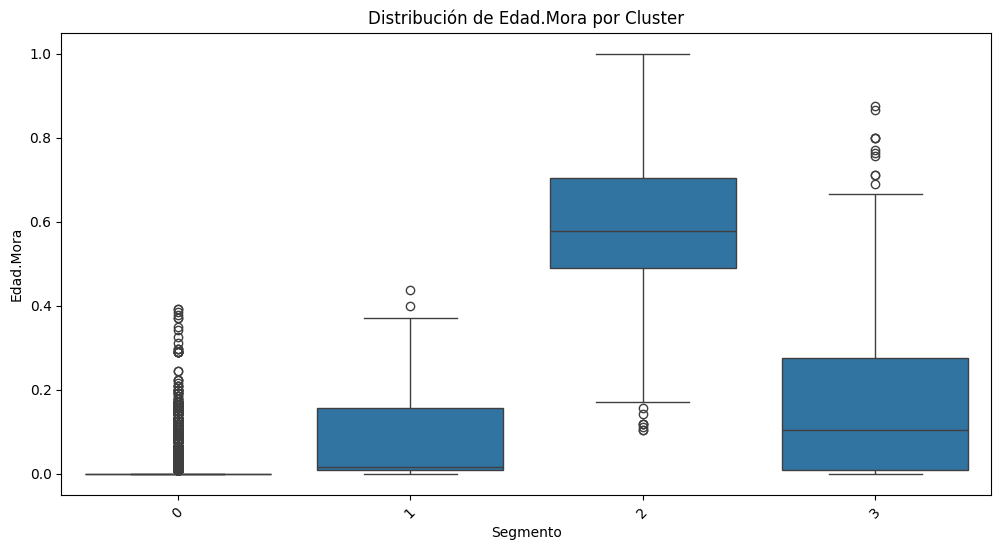

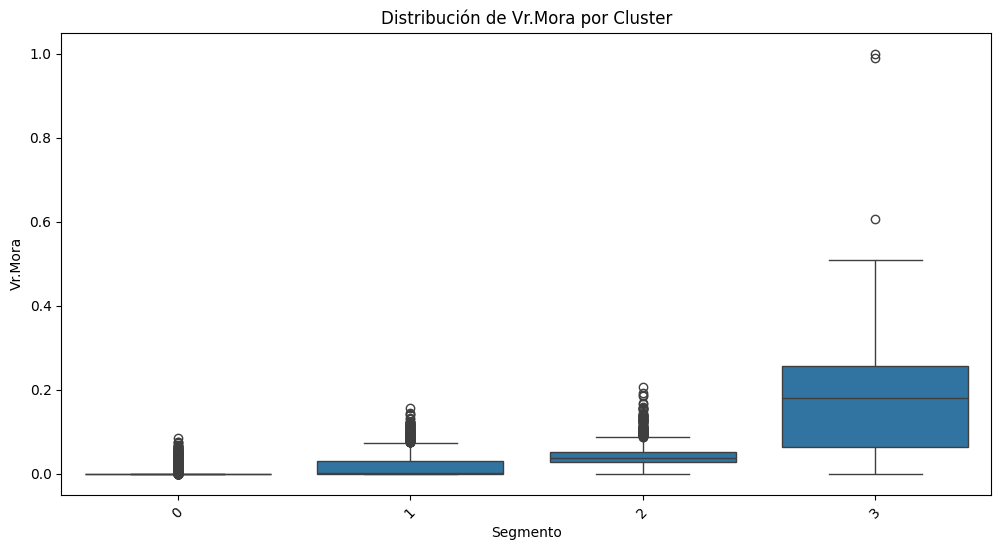

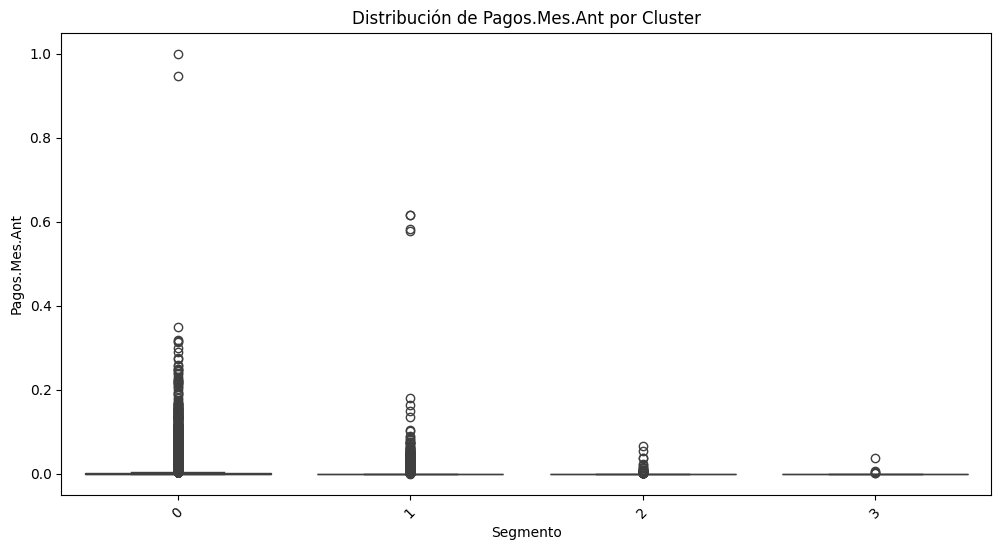

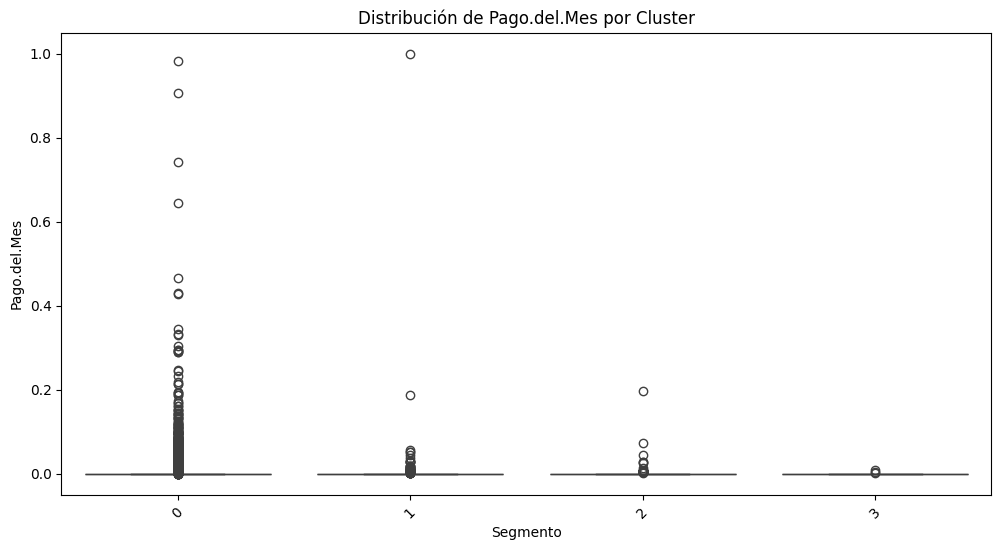

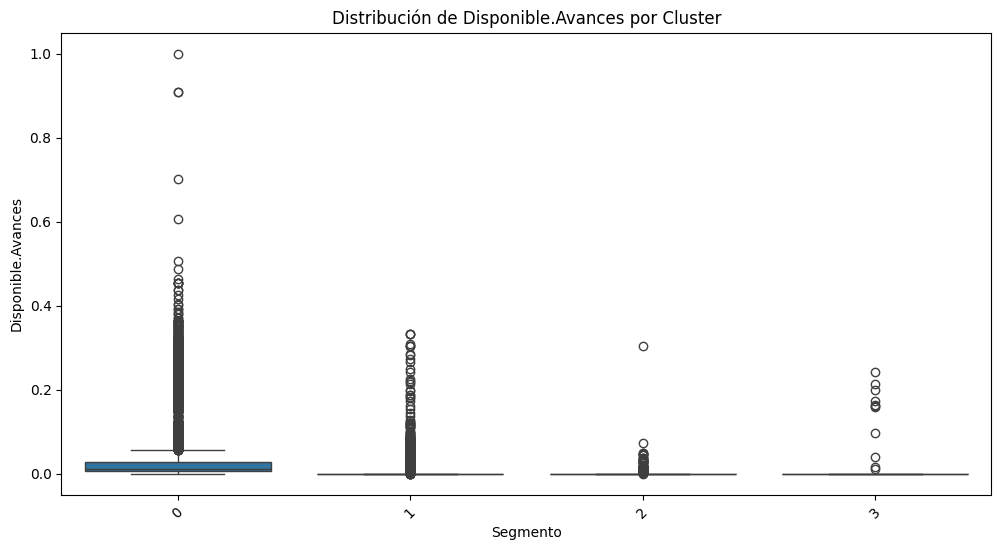

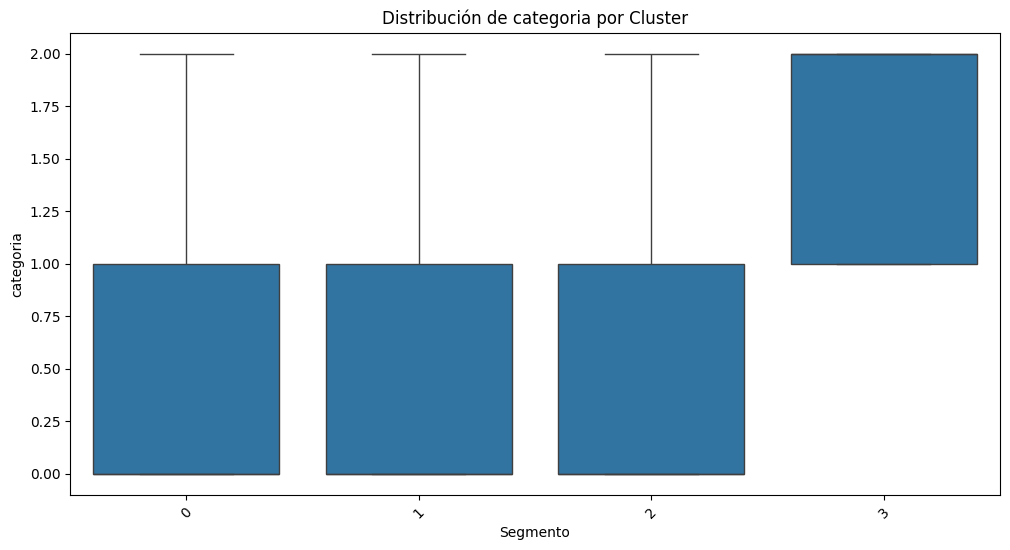

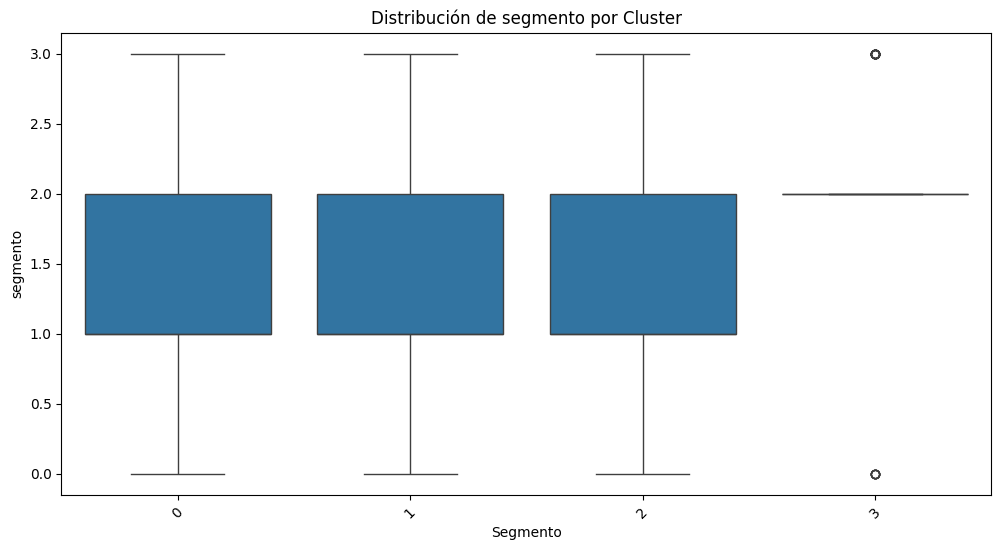

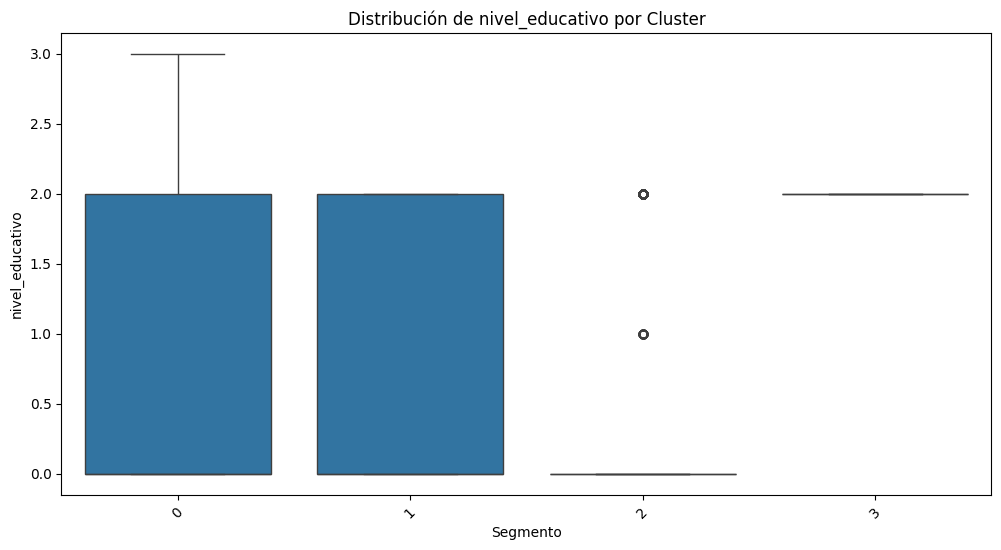

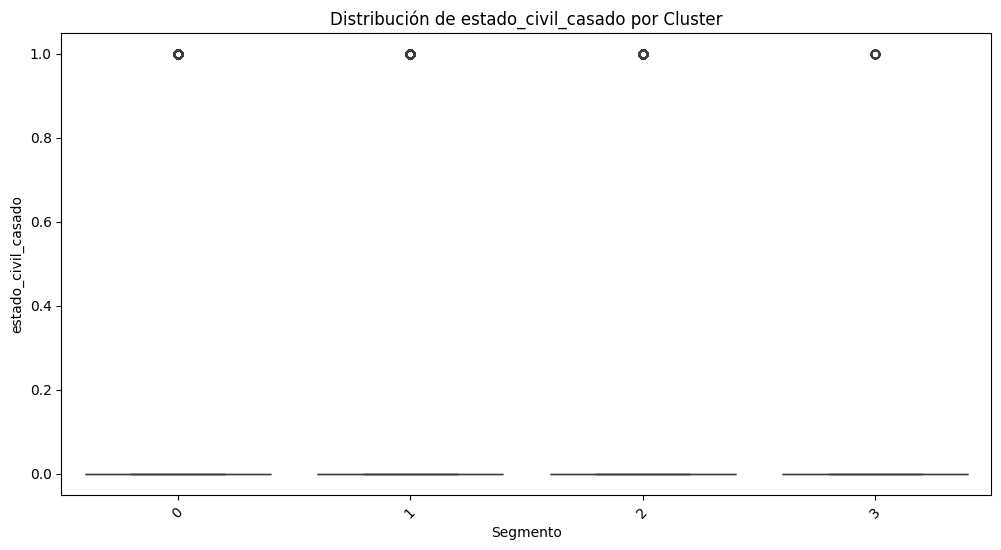

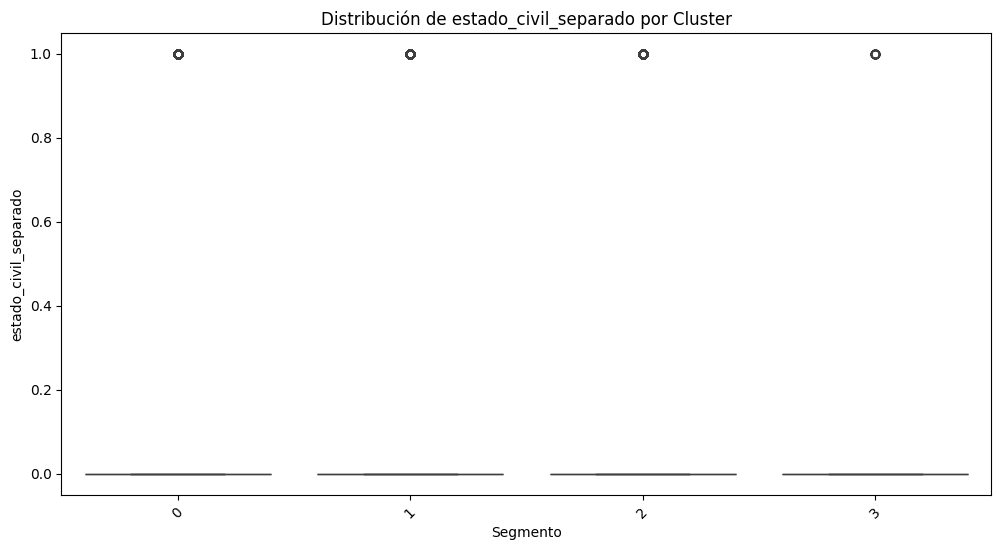

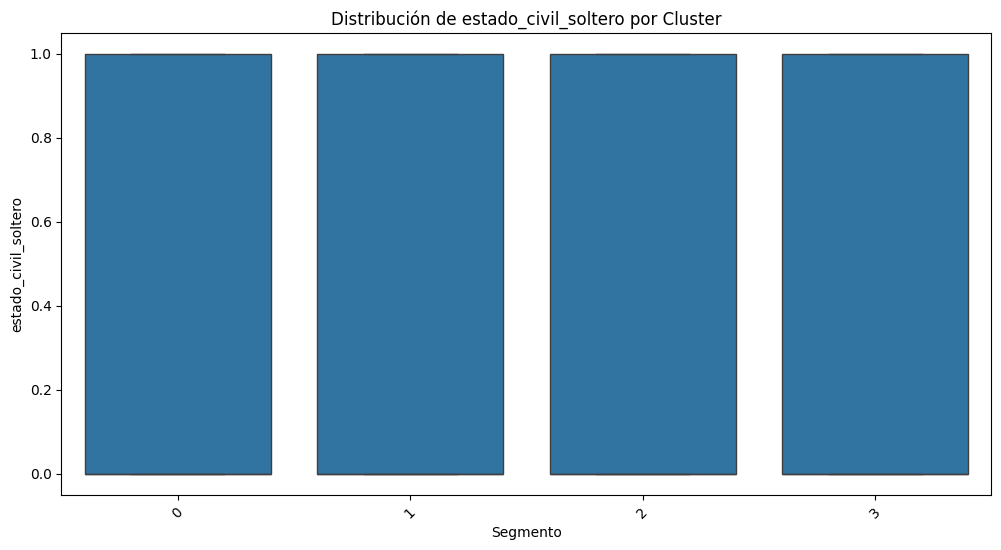

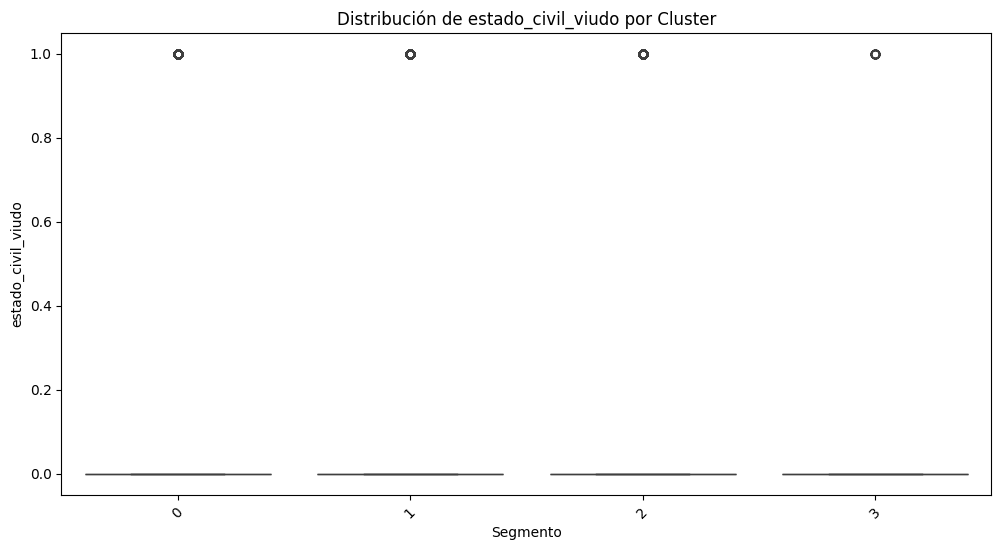

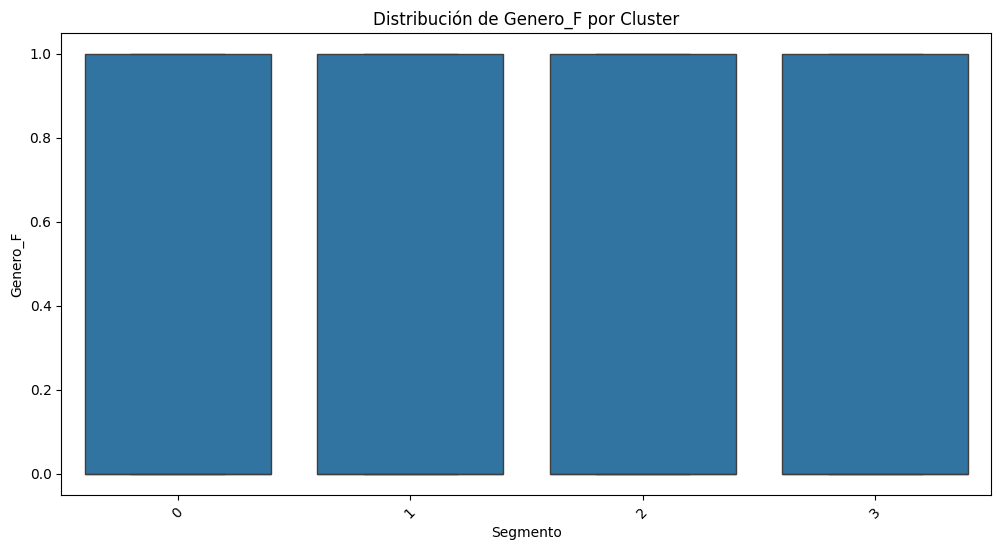

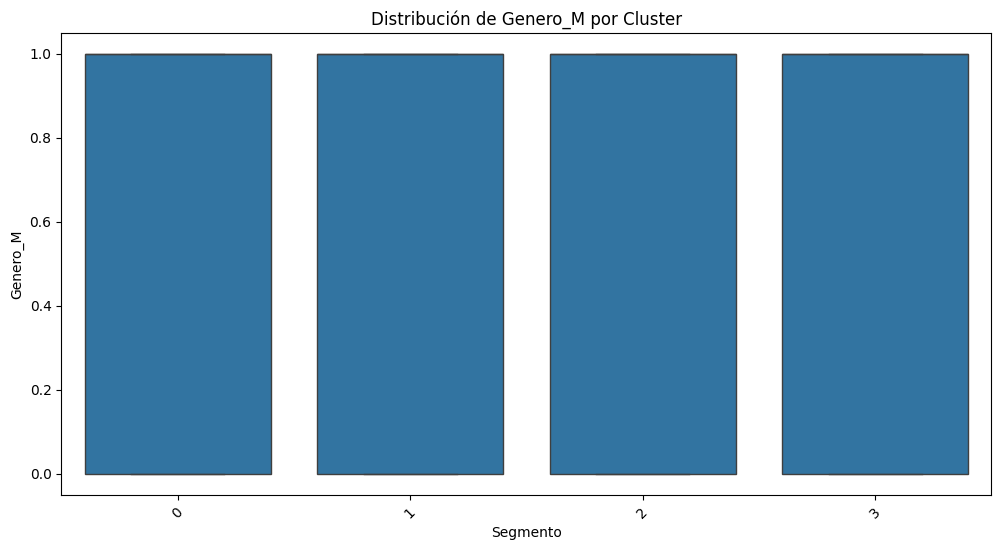

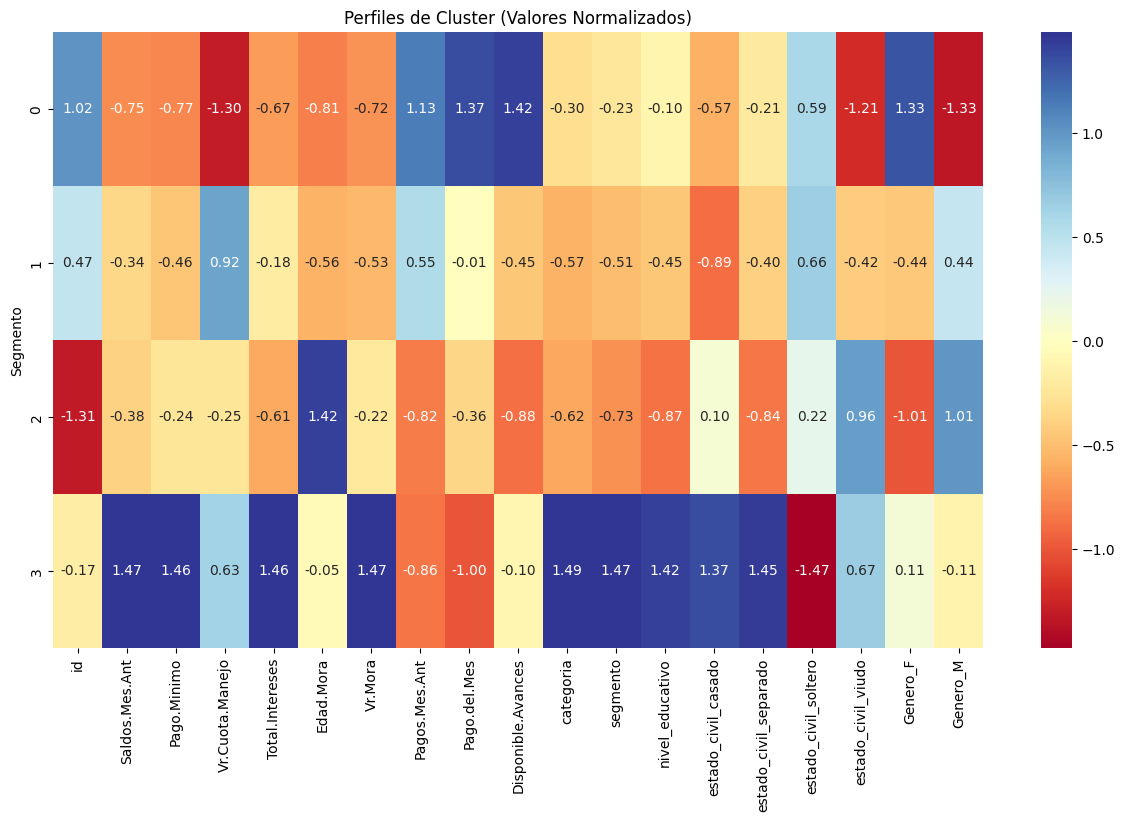


Cluster 0 se caracteriza por:

Características más bajas:
Genero_M             -1.335
Vr.Cuota.Manejo      -1.303
estado_civil_viudo   -1.209
Edad.Mora            -0.811
Pago.Minimo          -0.769
Name: 0, dtype: float64

Características más altas:
id                    1.016
Pagos.Mes.Ant         1.132
Genero_F              1.335
Pago.del.Mes          1.366
Disponible.Avances    1.422
Name: 0, dtype: float64

Cluster 1 se caracteriza por:

Características más bajas:
estado_civil_casado   -0.892
categoria             -0.567
Edad.Mora             -0.560
Vr.Mora               -0.529
segmento              -0.507
Name: 1, dtype: float64

Características más altas:
Genero_M                0.441
id                      0.465
Pagos.Mes.Ant           0.551
estado_civil_soltero    0.662
Vr.Cuota.Manejo         0.921
Name: 1, dtype: float64

Cluster 2 se caracteriza por:

Características más bajas:
id                      -1.313
Genero_F                -1.006
Disponible.Avances      -0.876
niv

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Análisis descriptivo por cluster
def analizar_clusters(df, cluster_column='Segmento'):
    # Estadísticas descriptivas por cluster
    cluster_stats = df.groupby(cluster_column).agg(['mean', 'std', 'min', 'max'])
    print("Estadísticas descriptivas por cluster:")
    print(cluster_stats)
    
    # Variables numéricas
    numeric_cols = df_train_numeric_categoric_Clasificacion.select_dtypes(include=[np.number]).columns.drop(cluster_column)
    
    # Visualización de distribuciones
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cluster_column, y=col, data=df_train_numeric_categoric_Clasificacion)
        plt.title(f'Distribución de {col} por Cluster')
        plt.xticks(rotation=45)
        plt.show()

# 2. Análisis de perfiles
def perfiles_cluster(df, cluster_column='Segmento'):
    # Calcular medias por cluster
    cluster_means = df_train_numeric_categoric_Clasificacion.groupby(cluster_column).mean()
    
    # Normalizar medias para comparación
    cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()
    
    # Visualizar perfiles
    plt.figure(figsize=(15, 8))
    sns.heatmap(cluster_means_normalized, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Perfiles de Cluster (Valores Normalizados)')
    plt.show()
    
    return cluster_means_normalized

# 3. Análisis de variables categóricas
def analisis_categoricas(df, cluster_column='Segmento'):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        # Tabla de contingencia
        contingency = pd.crosstab(df_train_numeric_categoric_Clasificacion[cluster_column], df_train_numeric_categoric_Clasificacion[col], normalize='index') * 100
        print(f"\nDistribución de {col} por cluster (%):")
        print(contingency)
        
        # Visualización
        plt.figure(figsize=(12, 6))
        contingency.plot(kind='bar', stacked=True)
        plt.title(f'Distribución de {col} por Cluster')
        plt.legend(title=col, bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()

# 4. Caracterización principal de cada cluster
def caracterizar_clusters(df, cluster_means_normalized):
    for cluster in cluster_means_normalized.index:
        print(f"\nCluster {cluster} se caracteriza por:")
        
        # Características más distintivas (positivas y negativas)
        top_features = cluster_means_normalized.loc[cluster].sort_values()
        print("\nCaracterísticas más bajas:")
        print(top_features.head().round(3))
        print("\nCaracterísticas más altas:")
        print(top_features.tail().round(3))

# Ejecutar todos los análisis
analizar_clusters(df_train_numeric_categoric_Clasificacion)
cluster_means_norm = perfiles_cluster(df_train_numeric_categoric_Clasificacion)
analisis_categoricas(df_train_numeric_categoric_Clasificacion)
caracterizar_clusters(df_train_numeric_categoric_Clasificacion, cluster_means_norm)

# 5. Resumen ejecutivo de los clusters
def resumen_ejecutivo_clusters(df, cluster_column='Segmento'):
    n_clusters = df[cluster_column].nunique()
    
    print("RESUMEN EJECUTIVO DE CLUSTERS")
    print("="*50)
    
    for i in range(n_clusters):
        cluster_data = df_train_numeric_categoric_Clasificacion[df_train_numeric_categoric_Clasificacion[cluster_column] == i]
        size = len(cluster_data)
        percentage = (size / len(df_train_numeric_categoric_Clasificacion)) * 100
        
        print(f"\nCluster {i}:")
        print(f"Tamaño: {size} ({percentage:.1f}% del total)")
        print("Características principales:")
        
        # Calcular y mostrar las características más distintivas
        for col in df_train_numeric_categoric_Clasificacion.select_dtypes(include=[np.number]).columns:
            if col != cluster_column:
                mean_cluster = cluster_data[col].mean()
                mean_total = df_train_numeric_categoric_Clasificacion[col].mean()
                diff_percentage = ((mean_cluster - mean_total) / mean_total) * 100
                
                if abs(diff_percentage) > 10:  # Mostrar solo diferencias significativas
                    print(f"- {col}: {'alto' if diff_percentage > 0 else 'bajo'} " +
                          f"({diff_percentage:+.1f}% vs media general)")

resumen_ejecutivo_clusters(df_train_numeric_categoric_Clasificacion)

In [72]:
import joblib

# Guardar el modelo
joblib.dump(best_model, 'modelo_clasificacion_COL.pkl')

# Guardar el PCA también si lo necesitas para futuras predicciones
joblib.dump(pca_selected, 'pca_transform.pkl')

['pca_transform.pkl']

# **Cluster 0: "Clientes Estables y Responsables"**

Este grupo tiene valores bajos en mora, intereses y pagos mínimos, lo que sugiere que son clientes con un buen comportamiento crediticio. Además, tienen un alto nivel educativo y disponibilidad de avances, lo que indica responsabilidad financiera.

# **Cluster 1: "Clientes con Alto Endeudamiento"**
Razón: Este grupo muestra valores altos en saldos, pagos mínimos, intereses y mora, lo que indica un alto nivel de endeudamiento y riesgo crediticio. Además, tienen un bajo nivel educativo y disponibilidad de avances.


# **Cluster 2: "Clientes en Situación Crítica"**
Razón: Este grupo tiene valores extremadamente altos en mora, intereses y saldos, junto con pagos muy bajos. Además, tienen un bajo nivel educativo y disponibilidad de avances, lo que sugiere una situación financiera crítica.


# **Cluster 3: "Clientes Activos y Cumplidos"**
Razón: Este grupo tiene valores altos en pagos y bajos en mora e intereses, lo que indica un buen comportamiento de pago. Sin embargo, tienen una disponibilidad de avances más baja y un perfil de categoría más bajo.


In [73]:
df_train_numeric_categoric_Clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50001 non-null  float64
 1   Saldos.Mes.Ant         50001 non-null  float64
 2   Pago.Minimo            50001 non-null  float64
 3   Vr.Cuota.Manejo        50001 non-null  float64
 4   Total.Intereses        50001 non-null  float64
 5   Edad.Mora              50001 non-null  float64
 6   Vr.Mora                50001 non-null  float64
 7   Pagos.Mes.Ant          50001 non-null  float64
 8   Pago.del.Mes           50001 non-null  float64
 9   Disponible.Avances     50001 non-null  float64
 10  categoria              50001 non-null  int64  
 11  segmento               50001 non-null  int64  
 12  nivel_educativo        50001 non-null  int64  
 13  estado_civil_casado    50001 non-null  int64  
 14  estado_civil_separado  50001 non-null  int64  
 15  es

In [74]:
df_datos_reales = pd.merge(df_train_preprocessed[['id', 'Fecha.Expedicion',
       'Disponible.Avances', 'Limite.Avances', 'Total.Intereses',
       'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora',
       'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora',
       'Vr.Cuota.Manejo', 'Saldo', 'categoria', 'segmento', 'edad',
       'nivel_educativo', 'estado_civil', 'Genero', 'PAC', 'contrato',
       'cuota_monetaria', 'sub_vivenda', 'bono_lonchera']],df_train_numeric_categoric_Clasificacion[['id','Segmento']], how = 'left', on = 'id')
df_datos_reales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50001 non-null  int64         
 1   Fecha.Expedicion    50001 non-null  datetime64[ns]
 2   Disponible.Avances  50001 non-null  float64       
 3   Limite.Avances      50001 non-null  float64       
 4   Total.Intereses     50001 non-null  float64       
 5   Saldos.Mes.Ant      50001 non-null  float64       
 6   Pagos.Mes.Ant       50001 non-null  float64       
 7   Vtas.Mes.Ant        50001 non-null  float64       
 8   Edad.Mora           50001 non-null  int64         
 9   Limite.Cupo         50001 non-null  float64       
 10  Pago.del.Mes        50001 non-null  float64       
 11  Pago.Minimo         50001 non-null  float64       
 12  Vr.Mora             50001 non-null  float64       
 13  Vr.Cuota.Manejo     50001 non-null  float64   

In [75]:
df_train_preprocessed[['id', 'Fecha.Expedicion',
       'Disponible.Avances', 'Limite.Avances', 'Total.Intereses',
       'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Edad.Mora',
       'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora',
       'Vr.Cuota.Manejo', 'Saldo', 'categoria', 'segmento', 'edad',
       'nivel_educativo', 'estado_civil', 'Genero', 'PAC', 'contrato',
       'cuota_monetaria', 'sub_vivenda', 'bono_lonchera']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  50001 non-null  int64         
 1   Fecha.Expedicion    50001 non-null  datetime64[ns]
 2   Disponible.Avances  50001 non-null  float64       
 3   Limite.Avances      50001 non-null  float64       
 4   Total.Intereses     50001 non-null  float64       
 5   Saldos.Mes.Ant      50001 non-null  float64       
 6   Pagos.Mes.Ant       50001 non-null  float64       
 7   Vtas.Mes.Ant        50001 non-null  float64       
 8   Edad.Mora           50001 non-null  int64         
 9   Limite.Cupo         50001 non-null  float64       
 10  Pago.del.Mes        50001 non-null  float64       
 11  Pago.Minimo         50001 non-null  float64       
 12  Vr.Mora             50001 non-null  float64       
 13  Vr.Cuota.Manejo     50001 non-null  float64   

Estadísticas descriptivas por cluster:
                    id                           Fecha.Expedicion  \
                  mean           std  min    max             mean   
Segmento                                                            
0         25646.333801  14542.012186    1  50001     1.366117e+18   
1         22181.414212  11138.635129   99  47457     1.356054e+18   
2         11002.823341  10768.250291   49  47153     1.259801e+18   
3         18198.410596  11158.502716  190  45094     1.321174e+18   

                                                                  \
                   std                  min                  max   
Segmento                                                           
0         1.059673e+17  1162252800000000000  1522540800000000000   
1         7.077577e+16  1162512000000000000  1521158400000000000   
2         5.875539e+16  1164499200000000000  1468108800000000000   
3         9.082036e+16  1164585600000000000  1496793600000000000   



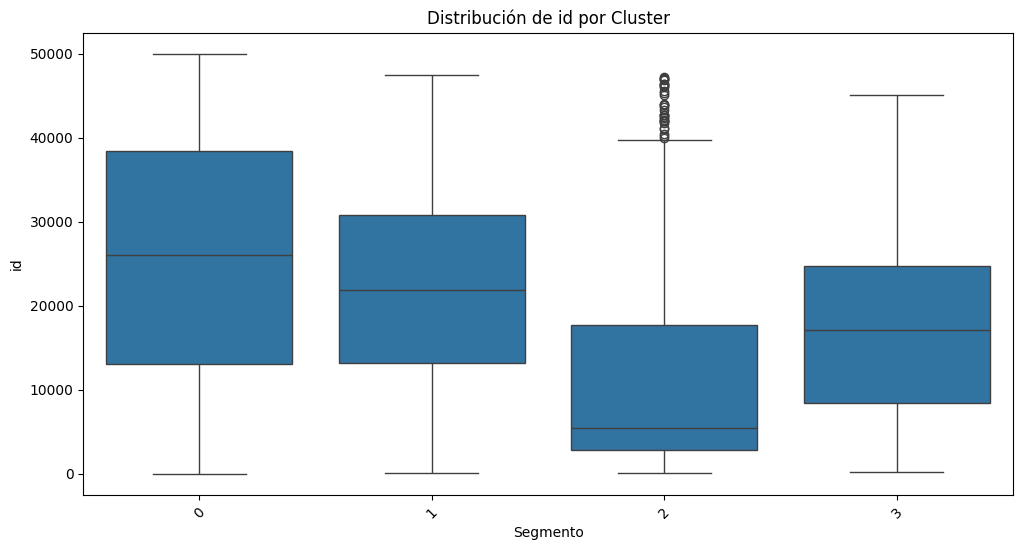

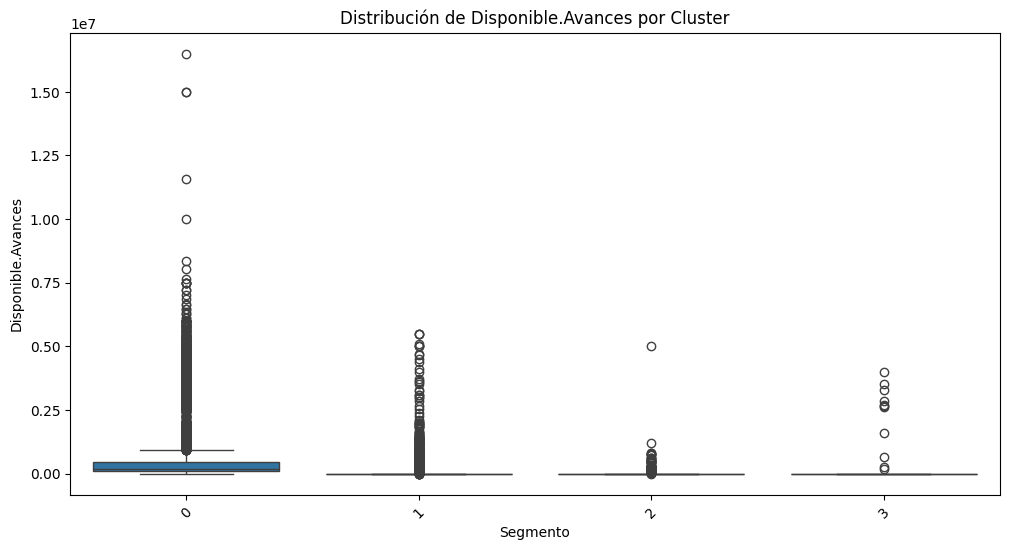

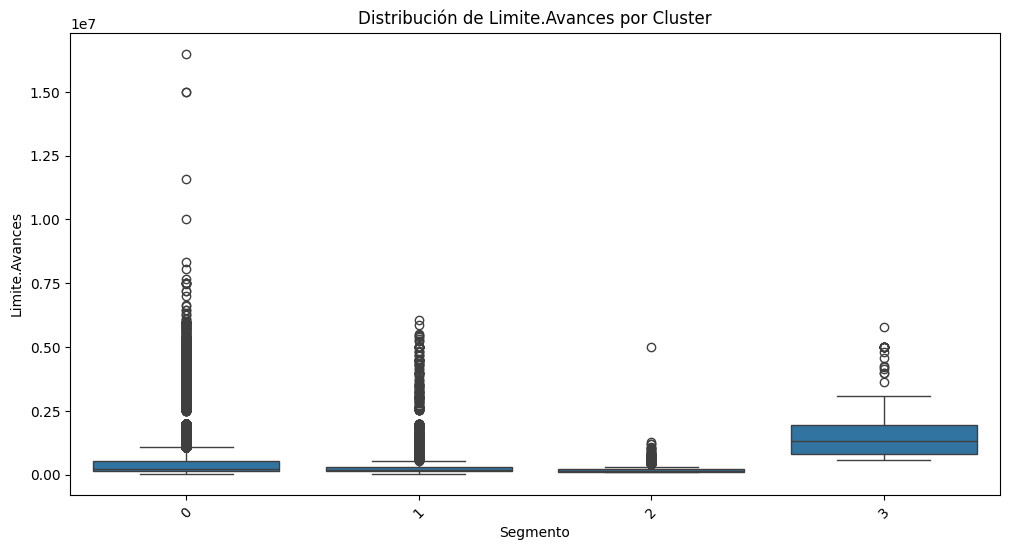

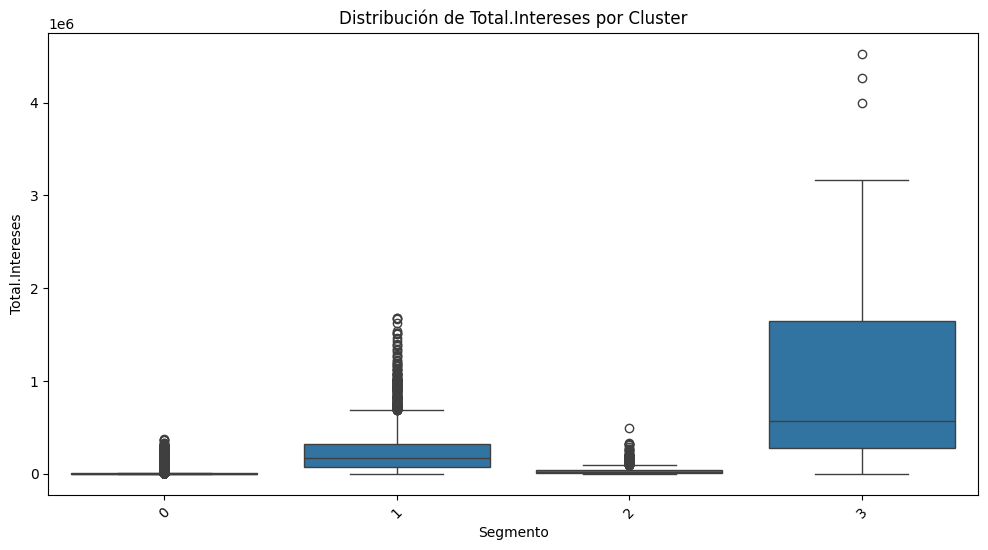

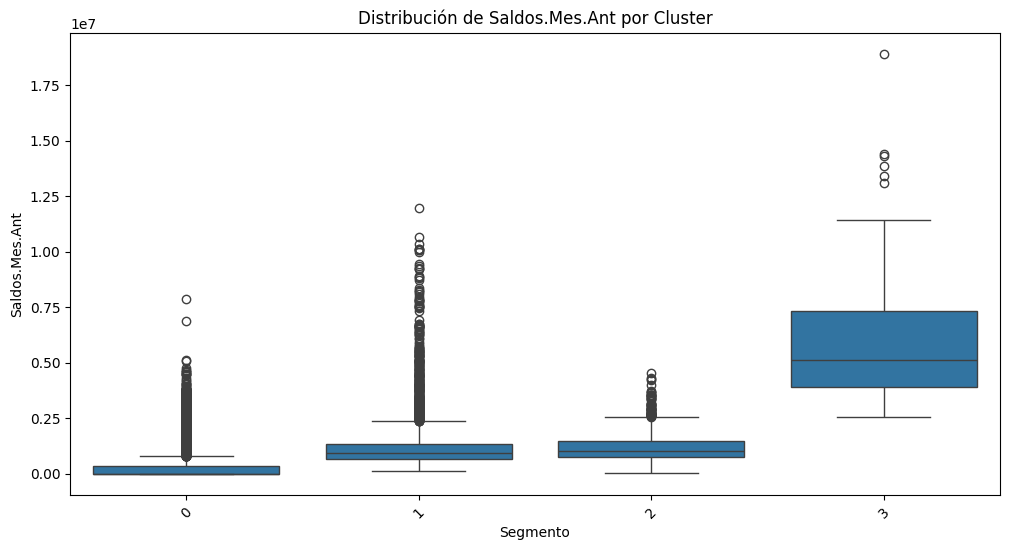

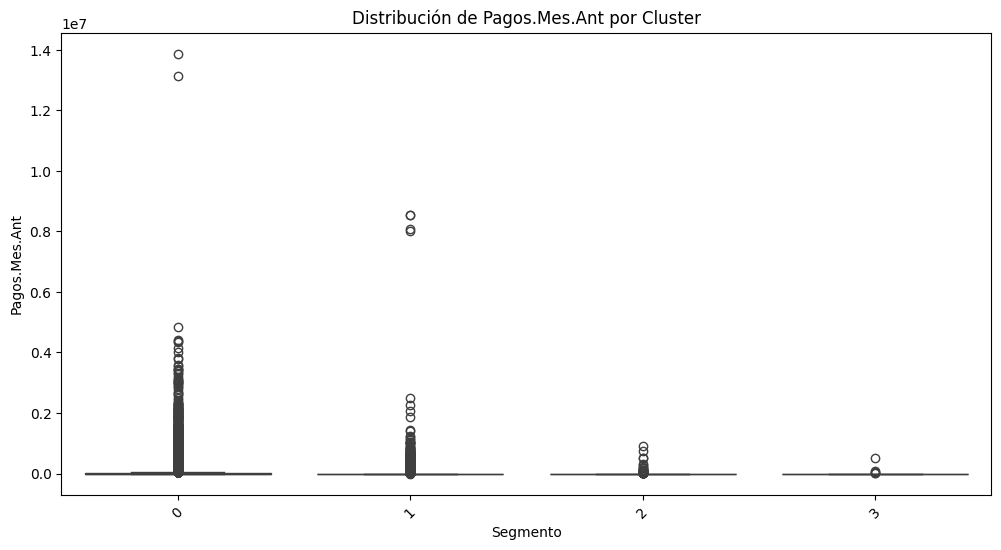

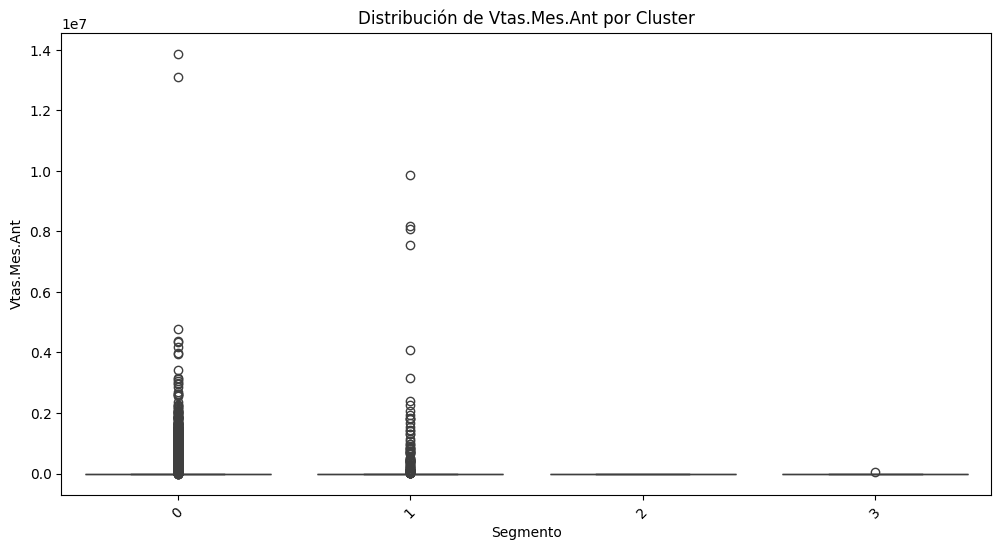

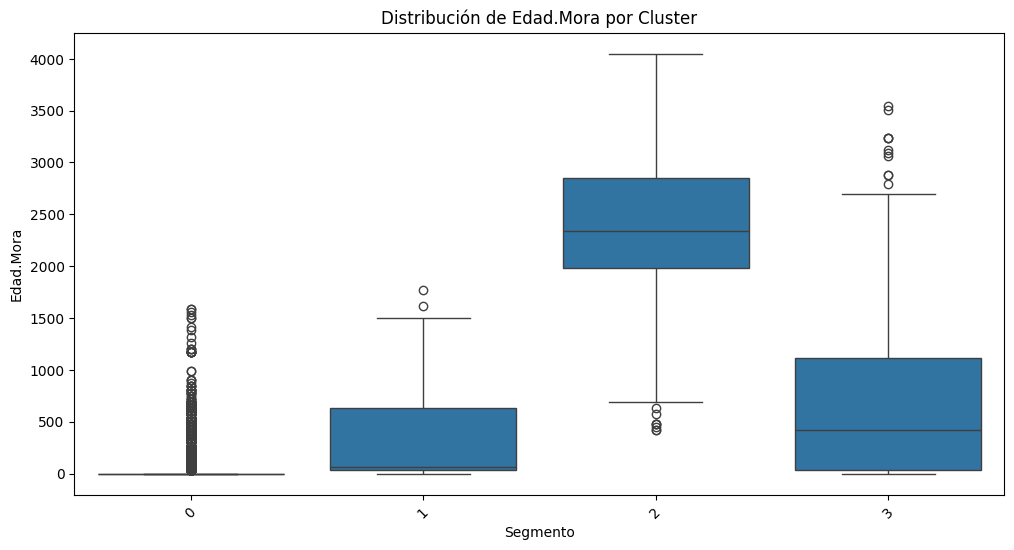

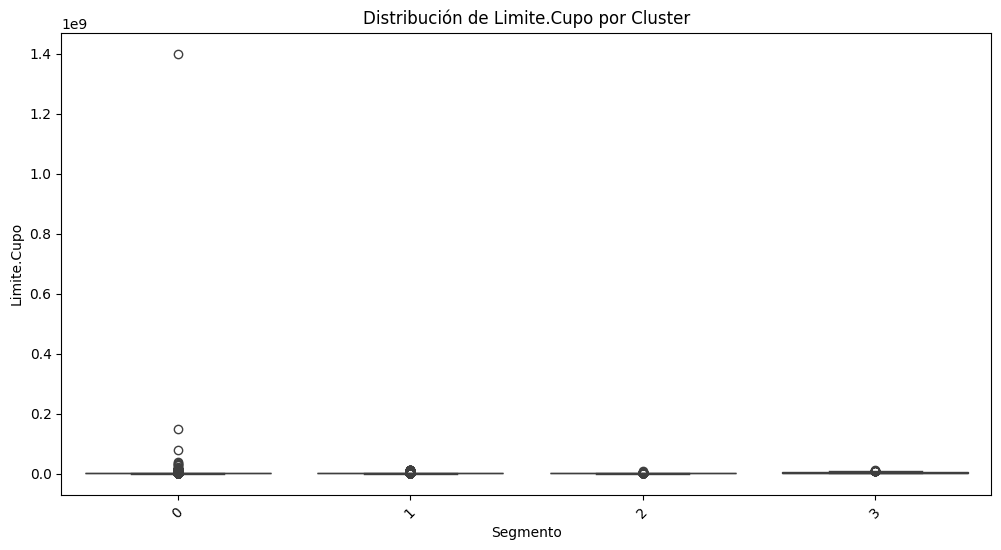

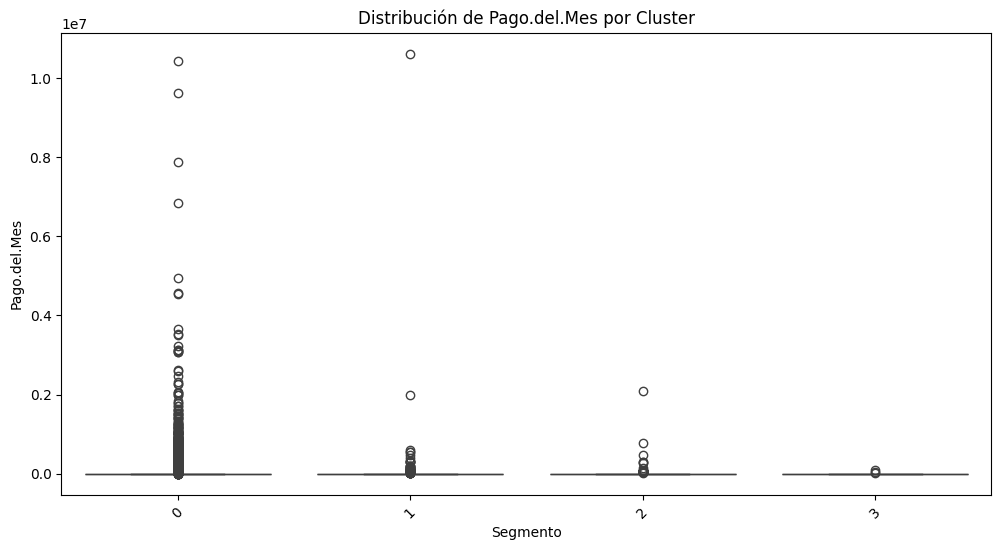

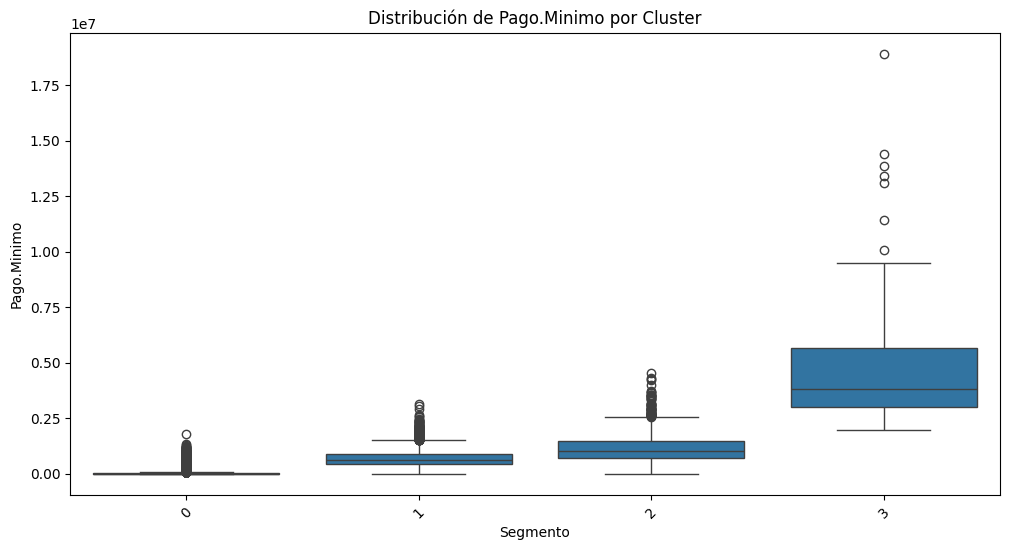

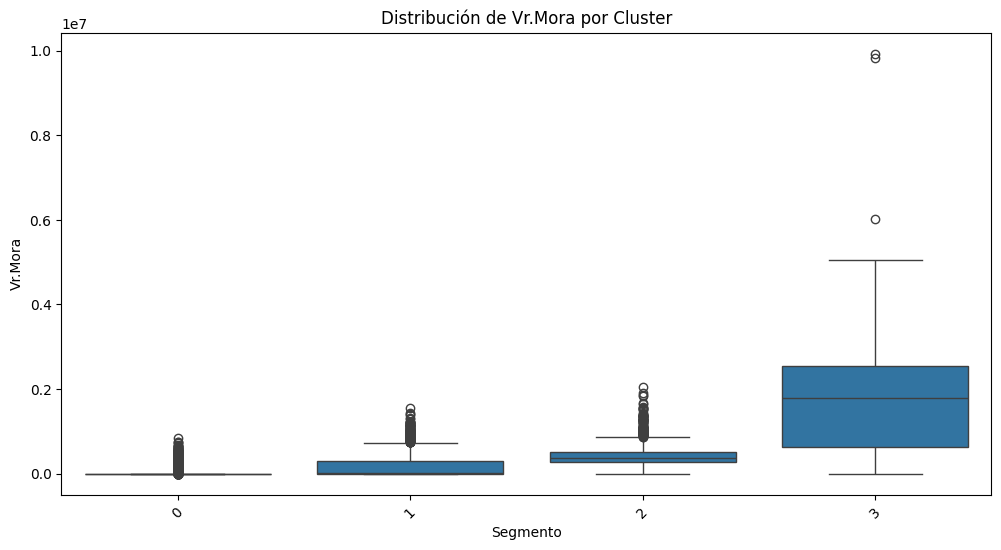

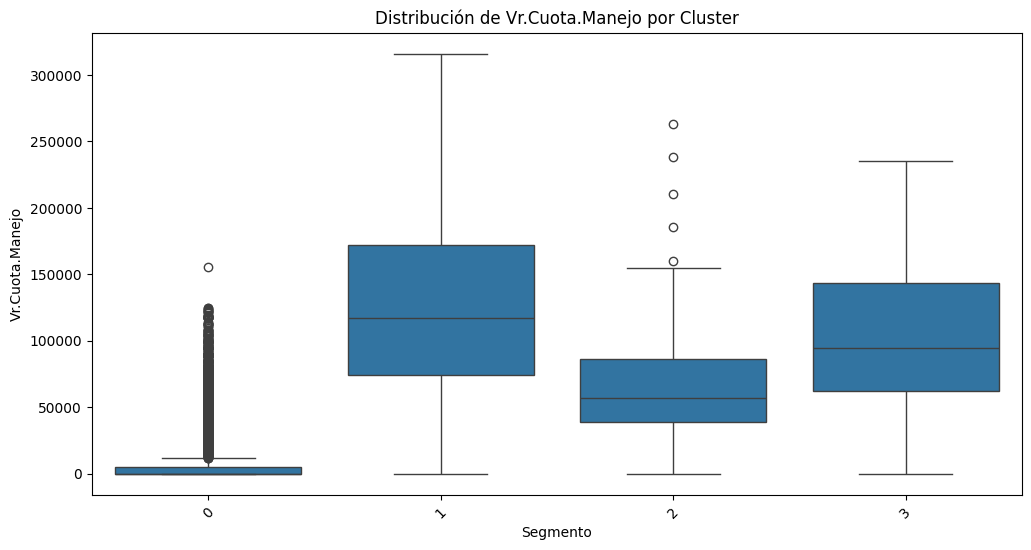

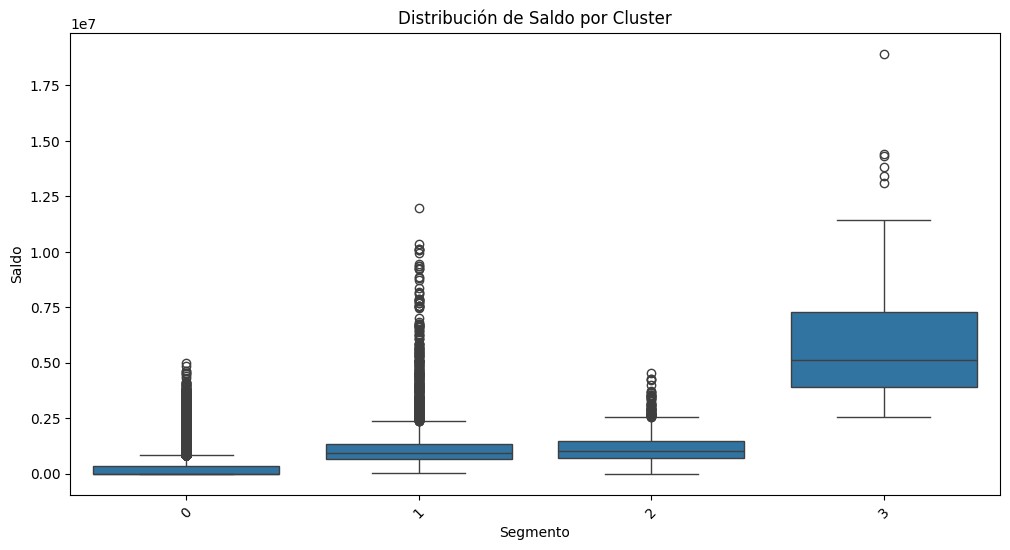

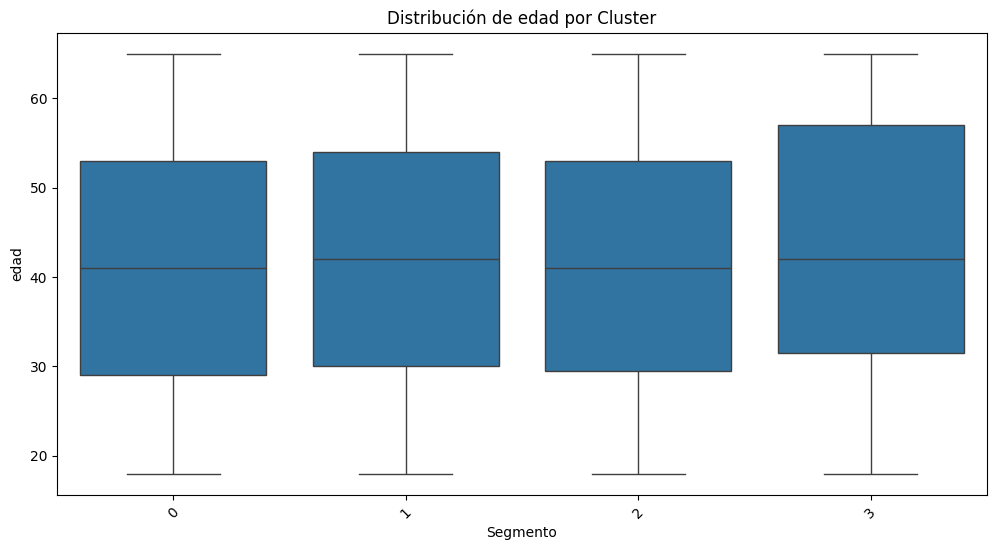

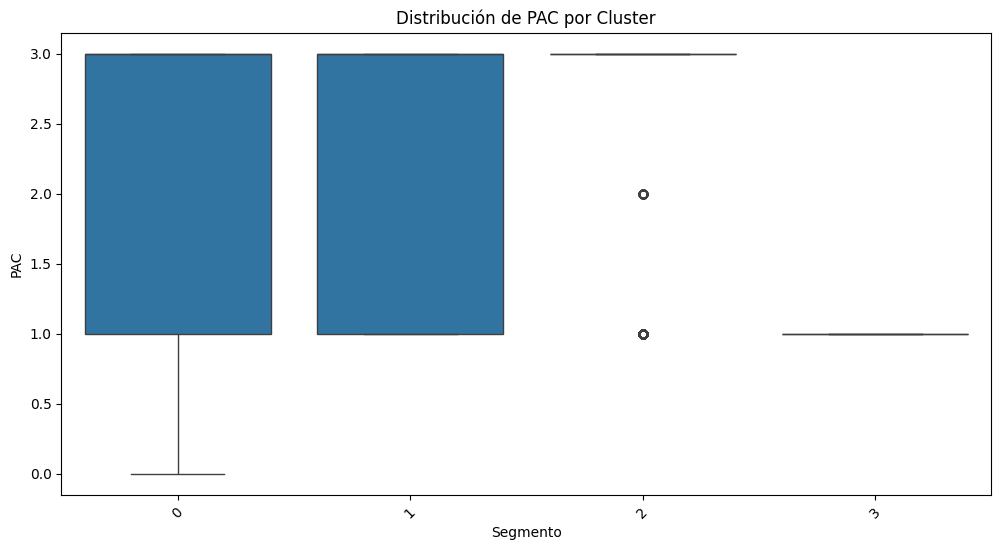

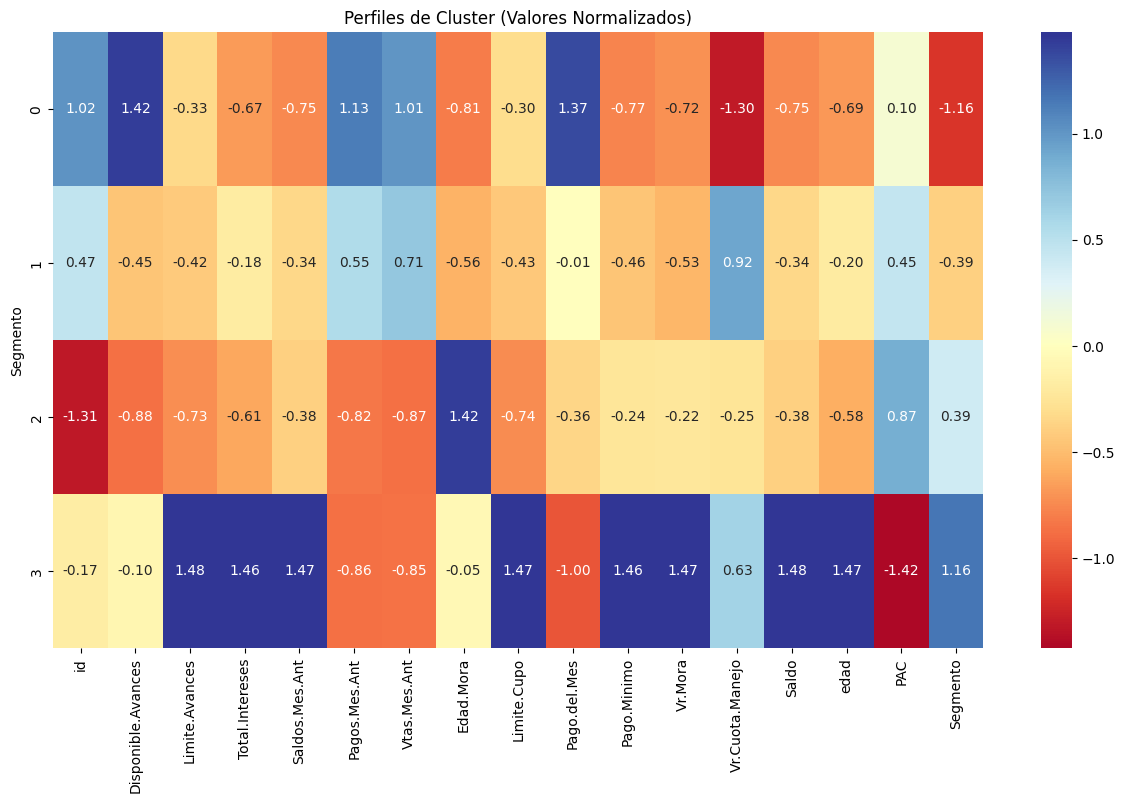


Distribución de categoria por cluster (%):
categoria          A          B          C
Segmento                                  
0          53.505724  35.856831  10.637445
1          66.684680  24.858146   8.457174
2          73.541167  14.068745  12.390088
3           0.000000  40.397351  59.602649


<Figure size 1200x600 with 0 Axes>

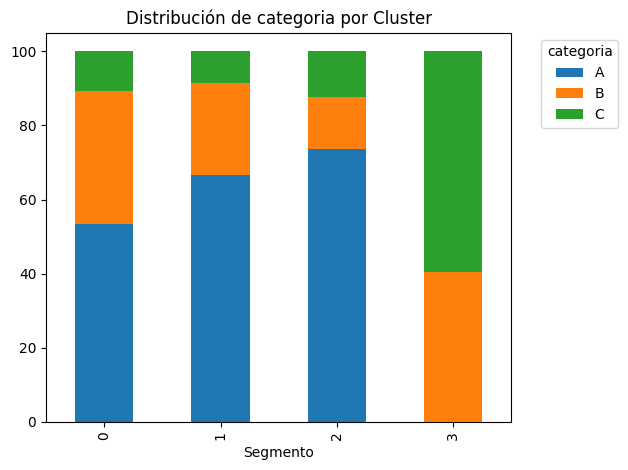


Distribución de segmento por cluster (%):
segmento  Segemnto_Basico  Segmento_Alto  Segmento_Joven  Segmento_Medio
Segmento                                                                
0               45.480868       2.051316        6.619449       45.848367
1               56.849500       2.485815        6.187517       34.477168
2               62.350120       0.079936        6.314948       31.254996
3                0.000000      13.245033        3.973510       82.781457


<Figure size 1200x600 with 0 Axes>

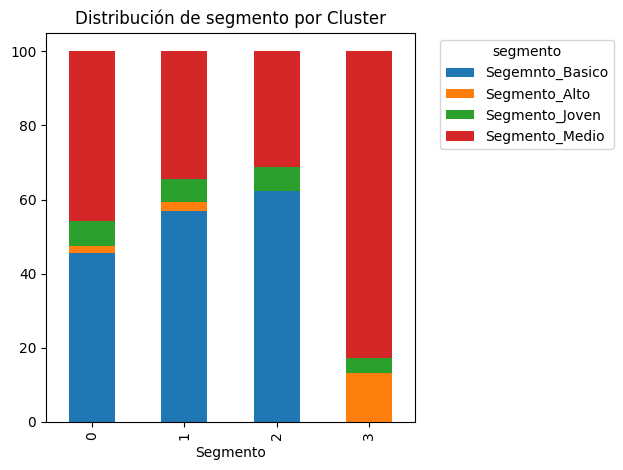


Distribución de nivel_educativo por cluster (%):
nivel_educativo  posgrado   primaria  secundaria  tecnico_tecnologico
Segmento                                                             
0                0.022273  51.124772   10.646354            38.206602
1                0.000000  64.333964   10.051337            25.614699
2                0.000000  82.174261    5.515588            12.310152
3                0.000000   0.000000    0.000000           100.000000


<Figure size 1200x600 with 0 Axes>

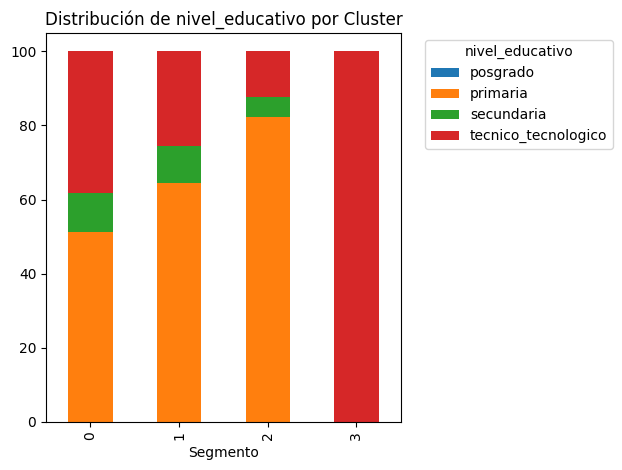


Distribución de estado_civil por cluster (%):
estado_civil     casado   separado    soltero      viudo
Segmento                                                
0             18.263620  18.472983  44.402869  18.860528
1             17.670900  18.022156  44.744664  19.562280
2             19.504396  16.946443  42.765787  20.783373
3             21.854305  22.516556  35.099338  20.529801


<Figure size 1200x600 with 0 Axes>

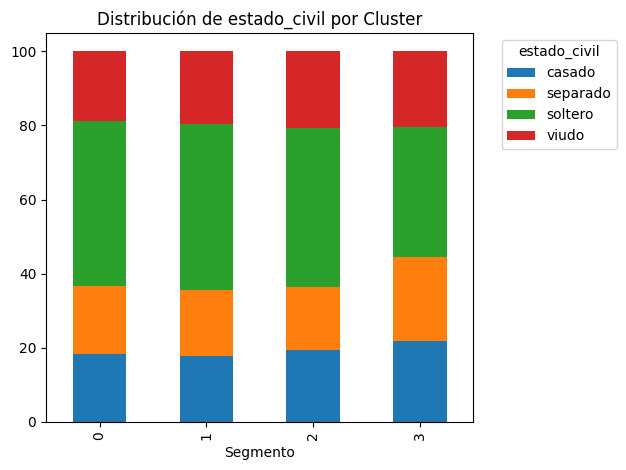


Distribución de Genero por cluster (%):
Genero            F          M
Segmento                      
0         49.888636  50.111364
1         48.608484  51.391516
2         48.201439  51.798561
3         49.006623  50.993377


<Figure size 1200x600 with 0 Axes>

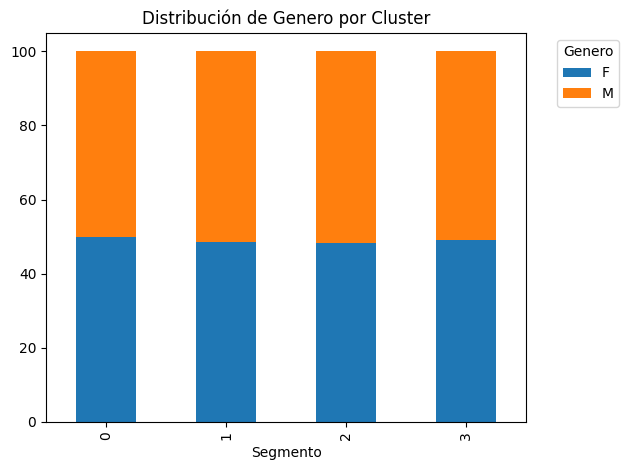


Distribución de contrato por cluster (%):
contrato          1          2          3          4
Segmento                                            
0         24.894205  25.658158  24.860796  24.586841
1         25.344501  25.236423  24.128614  25.290462
2         25.259792  24.540368  23.661071  26.538769
3         25.827815  25.827815  26.490066  21.854305


<Figure size 1200x600 with 0 Axes>

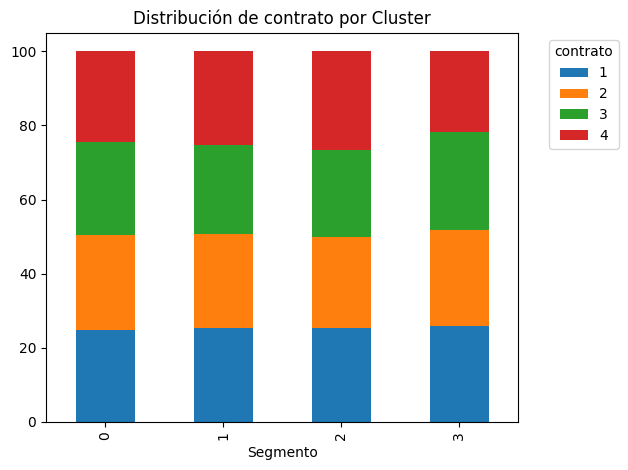


Distribución de cuota_monetaria por cluster (%):
cuota_monetaria           0          1
Segmento                              
0                 25.785113  74.214887
1                 17.670900  82.329100
2                  6.314948  93.685052
3                100.000000   0.000000


<Figure size 1200x600 with 0 Axes>

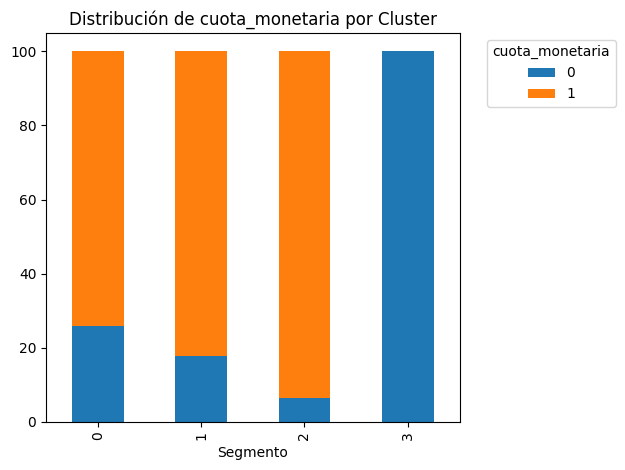


Distribución de sub_vivenda por cluster (%):
sub_vivenda           0         1
Segmento                         
0             99.859682  0.140318
1             99.756822  0.243178
2             99.760192  0.239808
3            100.000000  0.000000


<Figure size 1200x600 with 0 Axes>

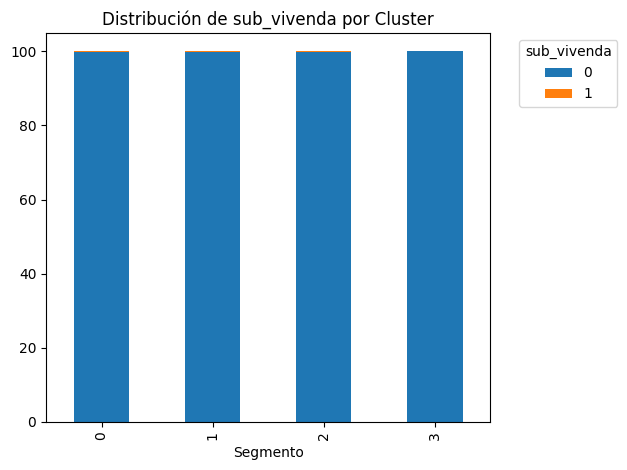


Distribución de bono_lonchera por cluster (%):
bono_lonchera           0          1
Segmento                            
0               38.228874  61.771126
1               25.614699  74.385301
2               12.310152  87.689848
3              100.000000   0.000000


<Figure size 1200x600 with 0 Axes>

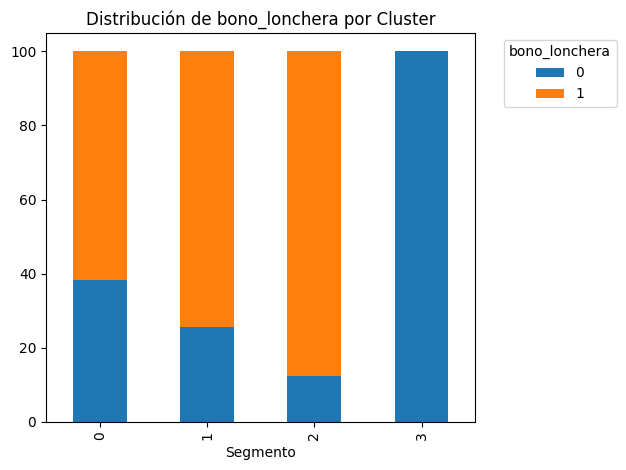


Cluster 0 se caracteriza por:

Características más bajas:
Vr.Cuota.Manejo   -1.303
Segmento          -1.162
Edad.Mora         -0.811
Pago.Minimo       -0.769
Saldos.Mes.Ant    -0.749
Name: 0, dtype: float64

Características más altas:
Vtas.Mes.Ant          1.009
id                    1.016
Pagos.Mes.Ant         1.132
Pago.del.Mes          1.366
Disponible.Avances    1.422
Name: 0, dtype: float64

Cluster 1 se caracteriza por:

Características más bajas:
Edad.Mora            -0.560
Vr.Mora              -0.529
Pago.Minimo          -0.458
Disponible.Avances   -0.450
Limite.Cupo          -0.427
Name: 1, dtype: float64

Características más altas:
PAC                0.451
id                 0.465
Pagos.Mes.Ant      0.551
Vtas.Mes.Ant       0.710
Vr.Cuota.Manejo    0.921
Name: 1, dtype: float64

Cluster 2 se caracteriza por:

Características más bajas:
id                   -1.313
Disponible.Avances   -0.876
Vtas.Mes.Ant         -0.871
Pagos.Mes.Ant        -0.824
Limite.Cupo          -0.743
N

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Análisis descriptivo por cluster
def analizar_clusters(df, cluster_column='Segmento'):
    # Convertir columnas no numéricas a NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Eliminar columnas que no son numéricas
    df_numeric = df_numeric.dropna(axis=1, how='all')
    
    # Estadísticas descriptivas por cluster
    cluster_stats = df_numeric.groupby(df[cluster_column]).agg(['mean', 'std', 'min', 'max'])
    print("Estadísticas descriptivas por cluster:")
    print(cluster_stats)
    
    # Variables numéricas
    numeric_cols = df_datos_reales.select_dtypes(include=[np.number]).columns.drop(cluster_column)
    
    # Visualización de distribuciones
    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cluster_column, y=col, data=df_datos_reales)
        plt.title(f'Distribución de {col} por Cluster')
        plt.xticks(rotation=45)
        plt.show()

# 2. Análisis de perfiles
def perfiles_cluster(df, cluster_column='Segmento'):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Calcular medias por cluster solo para columnas numéricas
    cluster_means = df.groupby(cluster_column)[numeric_columns].mean()
    
    # Normalizar medias para comparación
    cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()
    
    # Visualizar perfiles
    plt.figure(figsize=(15, 8))
    sns.heatmap(cluster_means_normalized, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Perfiles de Cluster (Valores Normalizados)')
    plt.show()
    
    return cluster_means_normalized

# 3. Análisis de variables categóricas
def analisis_categoricas(df, cluster_column='Segmento'):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        # Tabla de contingencia
        contingency = pd.crosstab(df_datos_reales[cluster_column], df_datos_reales[col], normalize='index') * 100
        print(f"\nDistribución de {col} por cluster (%):")
        print(contingency)
        
        # Visualización
        plt.figure(figsize=(12, 6))
        contingency.plot(kind='bar', stacked=True)
        plt.title(f'Distribución de {col} por Cluster')
        plt.legend(title=col, bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()

# 4. Caracterización principal de cada cluster
def caracterizar_clusters(df, cluster_means_normalized):
    for cluster in cluster_means_normalized.index:
        print(f"\nCluster {cluster} se caracteriza por:")
        
        # Características más distintivas (positivas y negativas)
        top_features = cluster_means_normalized.loc[cluster].sort_values()
        print("\nCaracterísticas más bajas:")
        print(top_features.head().round(3))
        print("\nCaracterísticas más altas:")
        print(top_features.tail().round(3))

# Ejecutar todos los análisis
analizar_clusters(df_datos_reales)
cluster_means_norm = perfiles_cluster(df_datos_reales)
analisis_categoricas(df_datos_reales)
caracterizar_clusters(df_datos_reales, cluster_means_norm)

# 5. Resumen ejecutivo de los clusters
def resumen_ejecutivo_clusters(df, cluster_column='Segmento'):
    n_clusters = df[cluster_column].nunique()
    
    print("RESUMEN EJECUTIVO DE CLUSTERS")
    print("="*50)
    
    for i in range(n_clusters):
        cluster_data = df_datos_reales[df_datos_reales[cluster_column] == i]
        size = len(cluster_data)
        percentage = (size / len(df_datos_reales)) * 100
        
        print(f"\nCluster {i}:")
        print(f"Tamaño: {size} ({percentage:.1f}% del total)")
        print("Características principales:")
        
        # Calcular y mostrar las características más distintivas
        for col in df_datos_reales.select_dtypes(include=[np.number]).columns:
            if col != cluster_column:
                mean_cluster = cluster_data[col].mean()
                mean_total = df_datos_reales[col].mean()
                diff_percentage = ((mean_cluster - mean_total) / mean_total) * 100
                
                if abs(diff_percentage) > 10:  # Mostrar solo diferencias significativas
                    print(f"- {col}: {'alto' if diff_percentage > 0 else 'bajo'} " +
                          f"({diff_percentage:+.1f}% vs media general)")

resumen_ejecutivo_clusters(df_datos_reales)

In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, pearsonr, spearmanr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configuración de visualización
sns.set(style="darkgrid", font_scale=1.2)
sns.set(font_scale=1.2)

# A. ANÁLISIS DE DIFERENCIA DE GRUPOS
# Definir los datos
grupo1 = np.array([66.180,41.420,81.880,67.205,58.626,64.678,74.439,98.250,39.465,75.064,
                   59.585,66.086,66.616,41.374,66.9,39,55.405,46.824,64.529,64.517,65.166,
                   70.703,77.391,47.910,66.116,63.797,53.051,69.012,60.368,49.748,39.8,34,
                   37.602,66.948,68.314,85.354,69.872,85.009,58.953,41.744,91.509,61.548,
                   37.981,86.317,59.479,57.588,53.0,59,46.234,87.828,66.038,65.175,60.214,74.662])

grupo2 = np.array([0.621,0.867,0.550,0.658,0.794,0.738,0.855,0.708,0.774,0.700,0.776,0.904,
                   0.751,0.921,0.724,0.754,0.568,0.867,0.601,0.725,0.798,0.776,0.835,0.816,
                   0.842,0.824,0.706,0.802,0.738,0.975,0.859,0.644,0.638,0.809,0.658,0.824,
                   0.603,0.855,0.728,0.838,0.932,0.782,0.727,0.829,0.809,0.907,0.871,0.686,
                   0.750,0.745,0.662])

def analisis_grupos(grupo1, grupo2, nombre1="Grupo 1", nombre2="Grupo 2"):
    """Realiza un análisis completo de dos grupos."""
    print("="*50)
    print("ANÁLISIS DE DOS GRUPOS INDEPENDIENTES")
    print("="*50)
    
    # Estadísticos descriptivos
    print("\nEstadísticos Descriptivos:")
    print(f"\n{nombre1}:")
    print(f"Media: {np.mean(grupo1):.3f}")
    print(f"Mediana: {np.median(grupo1):.3f}")
    print(f"Asimetría: {stats.skew(grupo1):.3f}")
    
    print(f"\n{nombre2}:")
    print(f"Media: {np.mean(grupo2):.3f}")
    print(f"Mediana: {np.median(grupo2):.3f}")
    print(f"Asimetría: {stats.skew(grupo2):.3f}")
    
    # Pruebas de normalidad
    print("\nPruebas de Normalidad (Shapiro-Wilk):")
    stat1, p1 = shapiro(grupo1)
    stat2, p2 = shapiro(grupo2)
    
    print(f"\n{nombre1}:")
    print(f"Estadístico W: {stat1:.3f}")
    print(f"Valor p: {p1:.3f}")
    print(f"¿Normal? {'Sí' if p1 > 0.05 else 'No'}")
    
    print(f"\n{nombre2}:")
    print(f"Estadístico W: {stat2:.3f}")
    print(f"Valor p: {p2:.3f}")
    print(f"¿Normal? {'Sí' if p2 > 0.05 else 'No'}")
    
    # Pruebas de diferencia
    print("\nPruebas de Diferencia:")
    
    # T-test
    t_stat, t_p = ttest_ind(grupo1, grupo2)
    print("\nPrueba t de Student:")
    print(f"Estadístico t: {t_stat:.3f}")
    print(f"Valor p: {t_p:.3f}")
    
    # Mann-Whitney U
    u_stat, u_p = mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    print("\nPrueba U de Mann-Whitney:")
    print(f"Estadístico U: {u_stat:.3f}")
    print(f"Valor p: {u_p:.3f}")
    
    # Visualización
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.boxplot(data=[grupo1, grupo2])
    plt.xticks([0, 1], [nombre1, nombre2])
    plt.title('Boxplot de los grupos')
    
    plt.subplot(122)
    sns.histplot(data=[grupo1, grupo2], common_norm=False, stat='density', alpha=0.5)
    plt.legend([nombre1, nombre2])
    plt.title('Distribución de los datos')
    
    plt.tight_layout()
    plt.show()

# B. ANÁLISIS DE CORRELACIÓN Y REGRESIÓN
x = np.array([2,1,20,21,33,35,37,36,39,38,32,28,27,36,35,34,37,38,39,37,38,39,55,52,35])
y = np.array([0,0,25000,26000,30000,18000,18000,18000,15000,15000,29000,28000,26000,
              17000,16000,18000,19000,16000,14000,19000,14000,13000,55000,48000,15000])

def analisis_correlacion_regresion(x, y):
    """Realiza un análisis completo de correlación y regresión."""
    print("="*50)
    print("ANÁLISIS DE CORRELACIÓN Y REGRESIÓN")
    print("="*50)
    
    # Estadísticos descriptivos
    print("\nEstadísticos Descriptivos:")
    
    print("\nVariable X:")
    print(f"Media: {np.mean(x):.3f}")
    print(f"Mediana: {np.median(x):.3f}")
    print(f"Asimetría: {stats.skew(x):.3f}")
    
    print("\nVariable Y:")
    print(f"Media: {np.mean(y):.3f}")
    print(f"Mediana: {np.median(y):.3f}")
    print(f"Asimetría: {stats.skew(y):.3f}")
    
    # Pruebas de normalidad
    print("\nPruebas de Normalidad (Shapiro-Wilk):")
    
    stat_x, p_x = shapiro(x)
    print("\nVariable X:")
    print(f"Estadístico W: {stat_x:.3f}")
    print(f"Valor p: {p_x:.3f}")
    print(f"¿Normal? {'Sí' if p_x > 0.05 else 'No'}")
    
    stat_y, p_y = shapiro(y)
    print("\nVariable Y:")
    print(f"Estadístico W: {stat_y:.3f}")
    print(f"Valor p: {p_y:.3f}")
    print(f"¿Normal? {'Sí' if p_y > 0.05 else 'No'}")
    
    # Correlaciones
    print("\nAnálisis de Correlación:")
    
    r_pearson, p_pearson = pearsonr(x, y)
    print("\nCorrelación de Pearson:")
    print(f"r: {r_pearson:.3f}")
    print(f"Valor p: {p_pearson:.3f}")
    
    r_spearman, p_spearman = spearmanr(x, y)
    print("\nCorrelación de Spearman:")
    print(f"rho: {r_spearman:.3f}")
    print(f"Valor p: {p_spearman:.3f}")
    
    # Regresión lineal
    modelo = np.polyfit(x, y, 1)
    print("\nRegresión Lineal:")
    print(f"Pendiente: {modelo[0]:.3f}")
    print(f"Intercepto: {modelo[1]:.3f}")
    
    # Visualización
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, np.polyval(modelo, x), 'r-', label='Regresión')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Diagrama de dispersión y línea de regresión')
    plt.legend()
    
    plt.subplot(122)
    sns.residplot(x=x, y=y, scatter_kws={'alpha':0.5})
    plt.title('Gráfico de residuos')
    
    plt.tight_layout()
    plt.show()

# C. ANOVA DE UNA VÍA
grupo_a = np.array([5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8])
grupo_b = np.array([7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6])
grupo_c = np.array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8])

def analisis_anova(grupos, nombres):
    """Realiza un análisis ANOVA de una vía."""
    print("="*50)
    print("ANÁLISIS ANOVA DE UNA VÍA")
    print("="*50)
    
    # Estadísticos descriptivos
    print("\nEstadísticos Descriptivos:")
    for grupo, nombre in zip(grupos, nombres):
        print(f"\n{nombre}:")
        print(f"Media: {np.mean(grupo):.3f}")
        print(f"Mediana: {np.median(grupo):.3f}")
        print(f"Asimetría: {stats.skew(grupo):.3f}")
    
    # Pruebas de normalidad
    print("\nPruebas de Normalidad (Shapiro-Wilk):")
    for grupo, nombre in zip(grupos, nombres):
        stat, p = shapiro(grupo)
        print(f"\n{nombre}:")
        print(f"Estadístico W: {stat:.3f}")
        print(f"Valor p: {p:.3f}")
        print(f"¿Normal? {'Sí' if p > 0.05 else 'No'}")
    
    # ANOVA
    f_stat, p_value = f_oneway(*grupos)
    print("\nResultados ANOVA:")
    print(f"Estadístico F: {f_stat:.3f}")
    print(f"Valor p: {p_value:.3f}")
    
    # Test de Tukey para comparaciones múltiples
    datos_combinados = np.concatenate(grupos)
    grupos_etiquetas = np.repeat(nombres, [len(g) for g in grupos])
    tukey = pairwise_tukeyhsd(datos_combinados, grupos_etiquetas)
    print("\nComparaciones múltiples (Tukey):")
    print(tukey)
    
    # Visualización
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    sns.boxplot(data=grupos)
    plt.xticks(range(len(nombres)), nombres)
    plt.title('Boxplot de los grupos')
    
    plt.subplot(122)
    for i, (grupo, nombre) in enumerate(zip(grupos, nombres)):
        sns.kdeplot(data=grupo, label=nombre)
    plt.title('Distribución de los datos')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# D. ANOVA FACTORIAL
medidas = np.array([2.1, 2.2, 1.8, 2, 1.9, 2.2, 2.6, 2.7, 2.5, 2.8, 1.8, 1.9, 1.6, 2, 1.9, 2.1, 2, 2.2, 2.4, 2.1])
factor_a = np.repeat(range(1, 5), 5)  # gl(4, 5)
factor_b = np.tile(range(1, 6), 4)    # factor(rep(1:5, 4))

def analisis_anova_factorial(medidas, factor_a, factor_b):
    """Realiza un análisis ANOVA factorial."""
    print("="*50)
    print("ANÁLISIS ANOVA FACTORIAL")
    print("="*50)
    
    # Crear DataFrame
    df = pd.DataFrame({
        'Medida': medidas,
        'FactorA': factor_a,
        'FactorB': factor_b
    })
    
    # Estadísticos descriptivos
    print("\nEstadísticos Descriptivos:")
    print(df.groupby(['FactorA', 'FactorB'])['Medida'].describe())
    
    # Prueba de normalidad
    stat, p = shapiro(medidas)
    print("\nPrueba de Normalidad (Shapiro-Wilk):")
    print(f"Estadístico W: {stat:.3f}")
    print(f"Valor p: {p:.3f}")
    print(f"¿Normal? {'Sí' if p > 0.05 else 'No'}")
    
    # ANOVA factorial (usando statsmodels)
    from statsmodels.stats.anova import AnovaRM
    modelo = AnovaRM(data=df, depvar='Medida', subject='FactorA', within=['FactorB']).fit()
    
    print("\nResultados ANOVA factorial:")
    print(modelo.summary())
    
    # Visualización
    plt.figure()

ANÁLISIS DE DOS GRUPOS INDEPENDIENTES

Estadísticos Descriptivos:

Grupo 1:
Media: 62.138
Mediana: 64.523
Asimetría: 0.116

Grupo 2:
Media: 0.767
Mediana: 0.776
Asimetría: -0.215

Pruebas de Normalidad (Shapiro-Wilk):

Grupo 1:
Estadístico W: 0.969
Valor p: 0.171
¿Normal? Sí

Grupo 2:
Estadístico W: 0.987
Valor p: 0.860
¿Normal? Sí

Pruebas de Diferencia:

Prueba t de Student:
Estadístico t: 29.224
Valor p: 0.000

Prueba U de Mann-Whitney:
Estadístico U: 2754.000
Valor p: 0.000


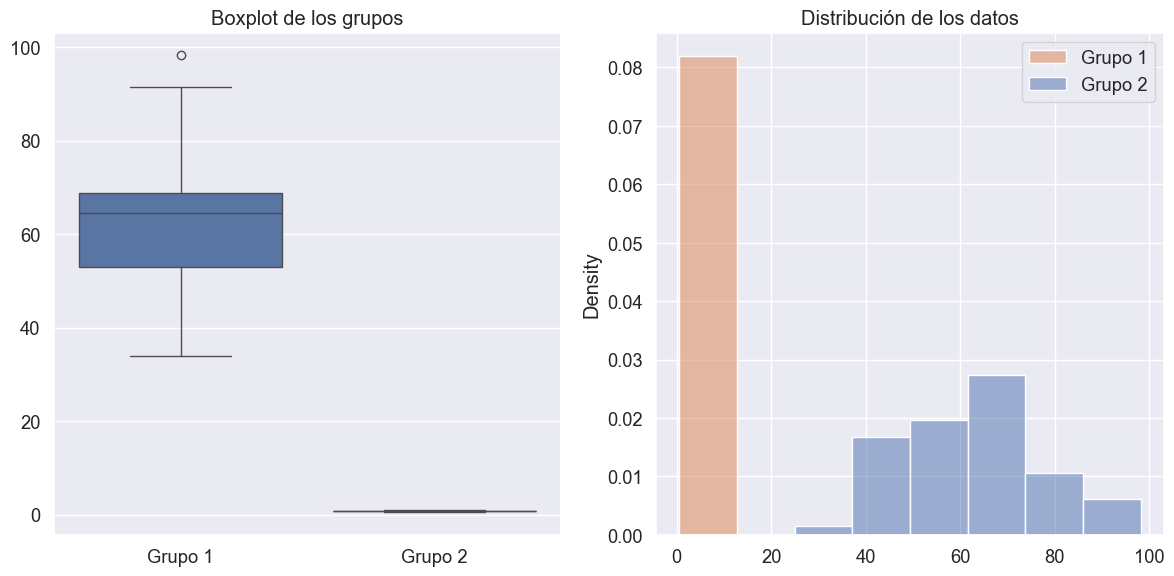

ANÁLISIS DE CORRELACIÓN Y REGRESIÓN

Estadísticos Descriptivos:

Variable X:
Media: 32.960
Mediana: 36.000
Asimetría: -1.166

Variable Y:
Media: 20480.000
Mediana: 18000.000
Asimetría: 1.145

Pruebas de Normalidad (Shapiro-Wilk):

Variable X:
Estadístico W: 0.829
Valor p: 0.001
¿Normal? No

Variable Y:
Estadístico W: 0.856
Valor p: 0.002
¿Normal? No

Análisis de Correlación:

Correlación de Pearson:
r: 0.612
Valor p: 0.001

Correlación de Spearman:
rho: -0.063
Valor p: 0.764

Regresión Lineal:
Pendiente: 606.433
Intercepto: 491.958


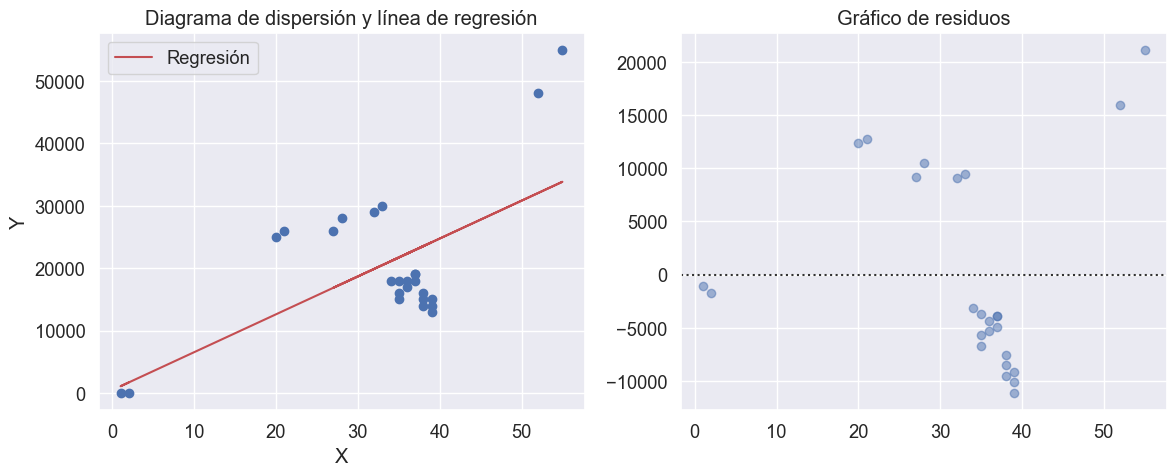

In [78]:
analisis_grupos(grupo1, grupo2)
analisis_correlacion_regresion(x, y)
